In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression

def R2adj(R:float, np: int, nfeatures:int ):
       return 1 - (1-R)*(0.3*np-1)/(0.3*np-nfeatures-1)

def fitError(X,y):
    #http://laboratoriodefisicaufla.blogspot.com/2013/10/metodo-dos-minimos-quadrados_12.html
    x=X.reshape(-1)
    nlok=len(y)
    sumx = np.sum(x)
    sumy = np.sum(y)
    sumxy = np.dot(x,y)
    sumx2 = np.dot(x,x)


    #print('Fiiting coef error: ', sumx, sumy, sumxy, sumx2)

    if np.abs(sumx*sumx-nlok*sumx2) < 0.001:
        return -1,-1
    coefa0x = (sumx*sumy-nlok*sumxy)/(sumx*sumx -nlok*sumx2)
    coefa1 = (sumxy*sumx- sumx2*sumy)/(sumx*sumx-nlok*sumx2)


    #print('coefa0x:', coefa0x, 'coefa1:', coefa1, 'n', nlok)

    deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
    deltaa0x = deltay/ np.sqrt( np.dot( x-sumx/nlok,x-sumx/nlok)   )
    deltaa1 = np.sqrt(sumx2/nlok)*deltaa0x


    #print('delta y:', deltay, ' deltaa0x:', deltaa0x, ' deltaa1:', deltaa1, 'delakh:',np.abs(np.power(10, coefa1)*np.log(10))*deltaa1)
    return deltaa0x, np.abs(np.power(10, coefa1)*np.log(10))*deltaa1

In [4]:
# This configures the plots
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import matplotlib.ticker
# Adjusting tick label size
#plt.tick_params(axis='both', labelsize=25)  # 20 is an example size; adjust as needed.


# Set maximum number of ticks to 5
mpl.ticker.MaxNLocator.default_params['nbins'] = 5  # Globally set maximum ticks
## Set maximum number of ticks to 5
#axii.xaxis.set_major_locator(MaxNLocator(5))  # For x-axis
#axii.yaxis.set_major_locator(MaxNLocator(5))  # For y-axis
#

#second try to ajust sizes of parameters
fontScaling= 1

# Desired font sizes and tick size
label_fontsize = fontScaling*12  # pt
title_fontsize = fontScaling*14  # pt
tick_fontsize = fontScaling*10   # pt (you can adjust this as needed)
legend_fontsize = fontScaling*10
desired_width = 4.2#8.4#4.2 #6    # inches (adjust as needed)  , 1 inch = 72 points (pt)
border_thickness = 1.5 #t
tick_thickness = 1.5 # pt
scatter_size = 50
plot_linewidth = 1.0

# Use mpl.update to apply rcParams globally
mpl.rcParams.update({
    'text.usetex': False,  # Use LaTeX for text rendering
    'font.size': label_fontsize,  # Base font size for labels
    'axes.titlesize': title_fontsize,  # Title font size
    'axes.labelsize': label_fontsize,  # Label font size
    'xtick.labelsize': tick_fontsize,  # x-axis tick label size
    'ytick.labelsize': tick_fontsize,  # y-axis tick label size
    'xtick.major.width': tick_thickness,
    'ytick.major.width': tick_thickness,
    'xtick.direction': 'in',  # Move x-axis ticks inside
    'ytick.direction': 'in',  # Move y-axis ticks inside 
    'legend.fontsize': legend_fontsize,     # Legend font size
    'axes.linewidth': border_thickness,  # Border thickness for the entire plot
    'figure.figsize': [desired_width, desired_width * 0.75]  # Aspect ratio
})

print('reference font value:', label_fontsize/fontScaling,' font scaling:', fontScaling,' effective font size:',label_fontsize )
#xtick.minor.widthscatter_size

reference font value: 12.0  font scaling: 1  effective font size: 12


In [5]:

df_1 = pd.read_csv("csvData/articledataDBmerged4.csv", skiprows=0,skip_blank_lines=True, index_col=0 )

df_1 = df_1.drop(201) #for deepika
#df_1[['ExtractantName','Cextractant (M)','SolventName','AcidName','Cacid (M)','IonName','Cion (M)','D(ion)',
#'Rg', 'has water?', 'has acid?', 'CacidOrg (M)', 'D(acid)', 'has ions?', 'CionOrg (M)', 'has PM?', 'PmName', 'Cpm (M)',
#      'Temp (K)', 'Shaking time (m)', 'ref citation', 'ref DOI', 'Published']]
# 'Wiener', 'Branching Index','Polarity Index']]
df_1

cid  cid_PM  cid_solvent  cid_acid  CextratantEq (M)  \
0     70700400.0     NaN       8182.0     944.0               NaN   
1     70700400.0     NaN       8182.0     944.0               NaN   
2     70700400.0     NaN       8182.0     944.0               NaN   
3     70700400.0     NaN       8182.0     944.0               NaN   
4     70700400.0     NaN       8182.0     944.0               NaN   
...          ...     ...          ...       ...               ...   
8161  70700400.0     NaN       8900.0    1118.0               NaN   
8162  70700400.0     NaN       8900.0    1118.0               NaN   
8163  70700400.0     NaN       8900.0    1118.0               NaN   
8164  70700400.0     NaN       8900.0    1118.0               NaN   
8165  70700400.0     NaN       8900.0    1118.0               NaN   

     ExtractantName  Cextractant (M)  AverageAggregateSize (A)  \
0             TODGA             0.10                       NaN   
1             TODGA             0.10                       NaN   
2             TODGA             0.10                       NaN   
3             TODGA             0.10                       NaN   
4             TODGA             0.10                       NaN   
...             ...              ...                       ...   
8161          TODGA             0.02                       NaN   
8162          TODGA             0.08                       NaN   
8163          TODGA             0.06                       NaN   
8164          TODGA             0.04                       NaN   
8165          TODGA             0.06                       NaN   

      Nextractantmol  ExtractantMonomer (%)  ...  Rotatable bond count_acid  \
0                NaN                    NaN  ...                        0.0   
1                NaN                    NaN  ...                        0.0   
2                NaN                    NaN  ...                        0.0   
3                NaN                    NaN  ...                        0.0   
4                NaN                    NaN  ...                        0.0   
...              ...                    ...  ...                        ...   
8161             NaN                    NaN  ...                        0.0   
8162             NaN                    NaN  ...                        0.0   
8163             NaN                    NaN  ...                        0.0   
8164             NaN                    NaN  ...                        0.0   
8165             NaN                    NaN  ...                        0.0   

      H bond donor count_acid  H bond acceptor count_acid  Charge_acid  \
0                         1.0                         3.0          0.0   
1                         1.0                         3.0          0.0   
2                         1.0                         3.0          0.0   
3                         1.0                         3.0          0.0   
4                         1.0                         3.0          0.0   
...                       ...                         ...          ...   
8161                      2.0                         4.0          0.0   
8162                      2.0                         4.0          0.0   
8163                      2.0                         4.0          0.0   
8164                      2.0                         4.0          0.0   
8165                      2.0                         4.0          0.0   

     Covalent Unit count_acid  TPSA_acid Wiener_acid  Branching Index_acid  \
0                         1.0       66.1         9.0                   0.0   
1                         1.0       66.1         9.0                   0.0   
2                         1.0       66.1         9.0                   0.0   
3                         1.0       66.1         9.0                   0.0   
4                         1.0       66.1         9.0                   0.0   
...                       ...        ...         ...                   ...   
8161   

In [6]:
#df = pd.read_csv("csvData/monoa.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
df_ideal_todga = pd.read_csv("csvData/scrappedTODGA.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
df_ideal_todga

IonName  D(ion) ExtractantName  Cextractant (M) Unit Extractant  \
0         Ce    0.01          TODGA              0.2               M   
1         Cs    0.01          TODGA              0.2               M   
2         Rh    0.01          TODGA              0.2               M   
3         Te    0.01          TODGA              0.2               M   
4         Al    0.01          TODGA              0.2               M   
...      ...     ...            ...              ...             ...   
1082      Ho  144.43          TODGA              0.1               M   
1083      Er  155.30          TODGA              0.1               M   
1084      Tm  179.56          TODGA              0.1               M   
1085      Yb  183.95          TODGA              0.1               M   
1086      Lu  207.60          TODGA              0.1               M   

     Add. ligand PmName  Cpm (M) Unit PM AcidName  ...  Contact time  \
0                   NaN      NaN     NaN     HNO3  ...        15 min   
1                   NaN      NaN     NaN     HNO3  ...        15 min   
2                   NaN      NaN     NaN     HNO3  ...        15 min   
3                   NaN      NaN     NaN     HNO3  ...        15 min   
4                   NaN      NaN     NaN     HNO3  ...        15 min   
...          ...    ...      ...     ...      ...  ...           ...   
1082                NaN      NaN     NaN     HNO3  ...        30 min   
1083                NaN      NaN     NaN     HNO3  ...        30 min   
1084                NaN      NaN     NaN     HNO3  ...        30 min   
1085                NaN      NaN     NaN     HNO3  ...        30 min   
1086                NaN      NaN     NaN     HNO3  ...        30 min   

           Additional Ref.  CacidOrg (M) Cion (M) CionOrg (M)  has ions?  \
0     HAR; 0.05M CDTA    7           NaN      NaN         NaN          1   
1     HAR; 0.05M CDTA    7           NaN      NaN         NaN          1   
2     HAR; 0.05M CDTA    7           NaN      NaN         NaN          1   
3     HAR; 0.05M CDTA    7           NaN      NaN         NaN          1   
4     HAR; 0.05M CDTA    7           NaN      NaN         NaN          1   
...               ...  ...           ...      ...         ...        ...   
1082              NaN   16           NaN      NaN         NaN          1   
1083              NaN   16           NaN      NaN         NaN          1   
1084              NaN   16           NaN      NaN         NaN          1   
1085              NaN   16           NaN      NaN         NaN          1   
1086              NaN   16           NaN      NaN         NaN          1   

      has PM?  Third phase                      ref citation  
0           0            0      10.1080/07366299.2012.700591  
1           0            0      10.1080/07366299.2012.700591  
2           0            0      10.1080/07366299.2012.700591  
3           0            0      10.1080/07366299.2012.700591  
4           0            0      10.1080/07366299.2012.700591  
...       ...          ...                               ...  
1082        0            0  doi:10.1080/07366299.2013.836422  
1083        0            0  doi:10.1080/07366299.2013.836422  
1084        0            0  doi:10.1080/07366299.2013.836422  
1085        0            0  doi:10.1080/07366299.2013.836422  
1086        0            0  doi:10.1080/07366299.2013.836422  

[1087 rows x 24 columns]

In [7]:
#df = pd.read_csv("csvData/monoa.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
df_ideal_tbp = pd.read_csv("csvData/scrappedTBP.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
df_ideal_tbp

IonName  D(ion) ExtractantName  Cextractant (M) Unit Extractant  \
0        La   0.043            TBP              2.0               M   
1        Pr   0.082            TBP              2.0               M   
2        Nd   0.082            TBP              2.0               M   
3        Sm   0.142            TBP              2.0               M   
4         Y   0.072            TBP              2.0               M   
..      ...     ...            ...              ...             ...   
350  Pu(IV)   0.030            TBP              1.1               M   
351  Pu(IV)   0.040            TBP              1.1               M   
352  Pu(IV)   0.070            TBP              1.1               M   
353  Pu(IV)   0.110            TBP              1.1               M   
354  Pu(IV)   0.170            TBP              1.1               M   

    Add. ligand PmName  Cpm (M) Unit PM AcidName  ...  Contact time  \
0                  NaN      NaN     NaN     HNO3  ...           NaN   
1                  NaN      NaN     NaN     HNO3  ...           NaN   
2                  NaN      NaN     NaN     HNO3  ...           NaN   
3                  NaN      NaN     NaN     HNO3  ...           NaN   
4                  NaN      NaN     NaN     HNO3  ...           NaN   
..          ...    ...      ...     ...      ...  ...           ...   
350                NaN      NaN     NaN     HNO3  ...        30 min   
351                NaN      NaN     NaN     HNO3  ...        30 min   
352                NaN      NaN     NaN     HNO3  ...        30 min   
353                NaN      NaN     NaN     HNO3  ...        30 min   
354                NaN      NaN     NaN     HNO3  ...        30 min   

                Additional Ref.  CacidOrg (M) Cion (M) CionOrg (M)  has ions?  \
0            0.5M Ln(NO3)3   10           NaN      NaN         NaN          1   
1            0.5M Ln(NO3)3   10           NaN      NaN         NaN          1   
2            0.5M Ln(NO3)3   10           NaN      NaN         NaN          1   
3            0.5M Ln(NO3)3   10           NaN      NaN         NaN          1   
4            0.5M Ln(NO3)3   10           NaN      NaN         NaN          1   
..                     ...  ...           ...      ...         ...        ...   
350  300 g/L U; org/aq=3.5   21           NaN      NaN         NaN          1   
351  300 g/L U; org/aq=3.5   21           NaN      NaN         NaN          1   
352  300 g/L U; org/aq=3.5   21           NaN      NaN         NaN          1   
353  300 g/L U; org/aq=3.5   21           NaN      NaN         NaN          1   
354  300 g/L U; org/aq=3.5   21           NaN      NaN         NaN          1   

     has PM?  Third phase                      ref citation  
0          0            0  doi:10.1016/0022-1902(59)80232-3  
1          0            0  doi:10.1016/0022-1902(59)80232-3  
2          0            0  doi:10.1016/0022-1902(59)80232-3  
3          0            0  doi:10.1016/0022-1902(59)80232-3  
4          0            0  doi:10.1016/0022-1902(59)80232-3  
..       ...          ...                               ...  
350        0            0     doi:10.1080/01496399708003197  
351        0            0     doi:10.1080/01496399708003197  
352        0            0     doi:10.1080/01496399708003197  
353        0            0     doi:10.1080/01496399708003197  
354        0            0     doi:10.1080/01496399708003197  

[355 rows x 24 columns]

In [8]:
df_lanl_dga = pd.read_csv("csvData/thomasDGA.csv", skiprows=0,skip_blank_lines=False, index_col=0 )
df_lanl_dga

cid  cid_PM  cid_solvent  cid_acid ExtractantName  Cextractant (M)  \
0     NaN     NaN          NaN       NaN     tMe2-TODGA              0.1   
1     NaN     NaN          NaN       NaN     tMe2-TODGA              0.1   
2     NaN     NaN          NaN       NaN     tMe2-TODGA              0.1   
3     NaN     NaN          NaN       NaN     tMe2-TODGA              0.1   
4     NaN     NaN          NaN       NaN     tMe2-TODGA              0.1   
...   ...     ...          ...       ...            ...              ...   
2378  NaN     NaN          NaN       NaN        T2EHDGA              0.1   
2379  NaN     NaN          NaN       NaN        T2EHDGA              0.1   
2380  NaN     NaN          NaN       NaN        T2EHDGA              0.1   
2381  NaN     NaN          NaN       NaN        T2EHDGA              0.1   
2382  NaN     NaN          NaN       NaN        T2EHDGA              0.1   

      AverageAggregateSize (A)  Nextractantmol  ExtractantMonomer (%)  \
0                          NaN             NaN                    NaN   
1                          NaN             NaN                    NaN   
2                          NaN             NaN                    NaN   
3                          NaN             NaN                    NaN   
4                          NaN             NaN                    NaN   
...                        ...             ...                    ...   
2378                       NaN             NaN                    NaN   
2379                       NaN             NaN                    NaN   
2380                       NaN             NaN                    NaN   
2381                       NaN             NaN                    NaN   
2382                       NaN             NaN                    NaN   

      intensity  ...  after CMC?  Third phase  Temp (K) Shaking time (m)  \
0           NaN  ...         NaN          NaN    295.15              NaN   
1           NaN  ...         NaN          NaN    295.15              NaN   
2           NaN  ...         NaN          NaN    295.15              NaN   
3           NaN  ...         NaN          NaN    295.15              NaN   
4           NaN  ...         NaN          NaN    295.15              NaN   
...         ...  ...         ...          ...       ...              ...   
2378        NaN  ...         NaN          NaN    298.15              NaN   
2379        NaN  ...         NaN          NaN    298.15              NaN   
2380        NaN  ...         NaN          NaN    298.15              NaN   
2381        NaN  ...         NaN          NaN    298.15              NaN   
2382        NaN  ...         NaN          NaN    298.15              NaN   

                ref citation                                     ref DOI  \
0     Dr. Andreas Wilden2019      https://doi.org/10.1002/chem.201806161   
1     Dr. Andreas Wilden2019      https://doi.org/10.1002/chem.201806161   
2     Dr. Andreas Wilden2019      https://doi.org/10.1002/chem.201806161   
3     Dr. Andreas Wilden2019      https://doi.org/10.1002/chem.201806161   
4     Dr. Andreas Wilden2019      https://doi.org/10.1002/chem.201806161   
...                      ...                                         ...   
2378            RB Gujar2010  https://doi.org/10.1080/07366291003685383    
2379            RB Gujar2010  https://doi.org/10.1080/07366291003685383    
2380            RB Gujar2010  https://doi.org/10.1080/07366291003685383    
2381            RB Gujar2010  https://doi.org/10.1080/07366291003685383    
2382            RB Gujar2010  https://doi.org/10.1080/07366291003685383    

      E.S.T.  location of data  location2  Published  
0          0               NaN        NaN          1  
1          0               NaN        NaN          1  
2          0               NaN        NaN          1  
3          0               NaN        NaN          1  
4          0               NaN        NaN          1  
...      ...               ...        ...        ...  
2378 

In [9]:
df_lanl_malonamide1 = pd.read_csv("csvData/loganMalonamide1.csv", skiprows=0,skip_blank_lines=False, index_col=0 )
df_lanl_malonamide1

cid  cid_PM  cid_solvent  cid_acid ExtractantName  Cextractant (M)  \
0     NaN     NaN          NaN       NaN         DEHiBA         1.000000   
1     NaN     NaN          NaN       NaN         DEHiBA         1.000000   
2     NaN     NaN          NaN       NaN         DEHiBA         1.000000   
3     NaN     NaN          NaN       NaN         DEHiBA         1.000000   
4     NaN     NaN          NaN       NaN          DEHAA         0.050049   
...   ...     ...          ...       ...            ...              ...   
1160  NaN     NaN          NaN       NaN         DHEHHA         0.500000   
1161  NaN     NaN          NaN       NaN         DHEHHA         0.500000   
1162  NaN     NaN          NaN       NaN         DHEHHA         0.500000   
1163  NaN     NaN          NaN       NaN         DHEHHA         0.500000   
1164  NaN     NaN          NaN       NaN         DHEHHA         0.500000   

      AverageAggregateSize (A)  Nextractantmol  ExtractantMonomer (%)  \
0                          NaN             NaN                    NaN   
1                          NaN             NaN                    NaN   
2                          NaN             NaN                    NaN   
3                          NaN             NaN                    NaN   
4                          NaN             NaN                    NaN   
...                        ...             ...                    ...   
1160                       NaN             NaN                    NaN   
1161                       NaN             NaN                    NaN   
1162                       NaN             NaN                    NaN   
1163                       NaN             NaN                    NaN   
1164                       NaN             NaN                    NaN   

      intensity  ...  after CMC?  Third phase  Temp (K) Shaking time (m)  \
0           NaN  ...         NaN            0    288.15              NaN   
1           NaN  ...         NaN            0    293.15              NaN   
2           NaN  ...         NaN            0    298.15              NaN   
3           NaN  ...         NaN            0    318.15              NaN   
4           NaN  ...         NaN            0    298.15              NaN   
...         ...  ...         ...          ...       ...              ...   
1160        NaN  ...         NaN            0    298.15              NaN   
1161        NaN  ...         NaN            0    298.15              NaN   
1162        NaN  ...         NaN            0    298.15              NaN   
1163        NaN  ...         NaN            0    298.15              NaN   
1164        NaN  ...         NaN            0    298.15              NaN   

                  ref citation                                       ref DOI  \
0                Rodrigues2014  https://doi.org/10.1080/00268976.2014.902139   
1                Rodrigues2014  https://doi.org/10.1080/00268976.2014.902139   
2                Rodrigues2014  https://doi.org/10.1080/00268976.2014.902139   
3                Rodrigues2014  https://doi.org/10.1080/00268976.2014.902139   
4                   Pathak2001         https://doi.org/10.1081/SEI-100001377   
...                        ...                                           ...   
1160  ref citation unavailable                                           NaN   
1161  ref citation unavailable                                           NaN   
1162  ref citation unavailable                                           NaN   
1163  ref citation unavailable                                           NaN   
1164  ref citation unavailable                                           NaN   

      E.S.T.  location of data  location2  Published  
0          0               NaN        NaN          1  
1          0               NaN        NaN          1  
2          0               NaN        NaN          1  
3          0               NaN        NaN          1  
4          0               NaN        NaN          1  
...      ...

In [10]:
df_lanl_malonamide4000 = pd.read_csv("csvData/loganMalonamide4000.csv", skiprows=0,skip_blank_lines=False, index_col=0 )
df_lanl_malonamide4000

cid  cid_PM  cid_solvent  cid_acid ExtractantName  Cextractant (M)  \
0     NaN     NaN          NaN       NaN        D2EHiBA         1.000000   
1     NaN     NaN          NaN       NaN        D2EHiBA         1.000000   
2     NaN     NaN          NaN       NaN        D2EHiBA         1.000000   
3     NaN     NaN          NaN       NaN        D2EHiBA         1.000000   
4     NaN     NaN          NaN       NaN         D2EHAA         0.050049   
...   ...     ...          ...       ...            ...              ...   
4951  NaN     NaN          NaN       NaN           MBDA         0.398736   
4952  NaN     NaN          NaN       NaN           MBDA         0.492160   
4953  NaN     NaN          NaN       NaN           MBDA         0.579515   
4954  NaN     NaN          NaN       NaN           MBDA         0.627922   
4955  NaN     NaN          NaN       NaN           MBDA         0.667474   

      AverageAggregateSize (A)  Nextractantmol  ExtractantMonomer (%)  \
0                          NaN             NaN                    NaN   
1                          NaN             NaN                    NaN   
2                          NaN             NaN                    NaN   
3                          NaN             NaN                    NaN   
4                          NaN             NaN                    NaN   
...                        ...             ...                    ...   
4951                       NaN             NaN                    NaN   
4952                       NaN             NaN                    NaN   
4953                       NaN             NaN                    NaN   
4954                       NaN             NaN                    NaN   
4955                       NaN             NaN                    NaN   

      intensity  ...  after CMC?  Third phase  Temp (K) Shaking time (m)  \
0           NaN  ...         NaN          0.0    288.15              NaN   
1           NaN  ...         NaN          0.0    293.15              NaN   
2           NaN  ...         NaN          0.0    298.15              NaN   
3           NaN  ...         NaN          0.0    318.15              NaN   
4           NaN  ...         NaN          0.0    298.15              NaN   
...         ...  ...         ...          ...       ...              ...   
4951        NaN  ...         NaN          0.0    298.15              NaN   
4952        NaN  ...         NaN          0.0    298.15              NaN   
4953        NaN  ...         NaN          0.0    298.15              NaN   
4954        NaN  ...         NaN          0.0    298.15              NaN   
4955        NaN  ...         NaN          0.0    298.15              NaN   

       ref citation                                       ref DOI  E.S.T.  \
0     Rodrigues2014  https://doi.org/10.1080/00268976.2014.902139       0   
1     Rodrigues2014  https://doi.org/10.1080/00268976.2014.902139       0   
2     Rodrigues2014  https://doi.org/10.1080/00268976.2014.902139       0   
3     Rodrigues2014  https://doi.org/10.1080/00268976.2014.902139       0   
4        Pathak2001         https://doi.org/10.1081/SEI-100001377       0   
...             ...                                           ...     ...   
4951     Prabhu1993   https://doi.org/10.1524/ract.1993.60.23.109       0   
4952     Prabhu1993   https://doi.org/10.1524/ract.1993.60.23.109       0   
4953     Prabhu1993   https://doi.org/10.1524/ract.1993.60.23.109       0   
4954     Prabhu1993   https://doi.org/10.1524/ract.1993.60.23.109       0   
4955     Prabhu1993   https://doi.org/10.1524/ract.1993.60.23.109       0   

      location of data  location2  Published  
0                  NaN        NaN          1  
1                  NaN        NaN          1  
2                  NaN        NaN          1  
3                  NaN        NaN          1  
4                  NaN        NaN          1  
...                ...        ...        ...  
4951               NaN        NaN          1  
49

In [11]:
df_ACS_SEPT = pd.read_excel("csvData/ACS_SEPT_literature_Leostyle.xlsx", skiprows=1, index_col=0 )
df_ACS_SEPT

file                                     ExtractantName  \
0                                                                       
1     ./ST100.json  CCCCCCCCN(CCCCCCCC)C(=O)COCC(=O)N(CCCCCCCC)CCC...   
2     ./ST100.json  CCCCCCCCN(CCCCCCCC)C(=O)COCC(=O)N(CCCCCCCC)CCC...   
3     ./ST100.json  CCCCCCCCN(CCCCCCCC)C(=O)COCC(=O)N(CCCCCCCC)CCC...   
4     ./ST100.json  CCCCCCCCN(CCCCCCCC)C(=O)COCC(=O)N(CCCCCCCC)CCC...   
5     ./ST100.json  CCCCCCCCN(CCCCCCCC)C(=O)COCC(=O)N(CCCCCCCC)CCC...   
...            ...                                                ...   
1100    ./ST9.json  CC1(C)CCC(C)(C)c2nc(-c3cccc(-c4cccc(-c5cccc(-c...   
1101    ./ST9.json  CC1(C)CCC(C)(C)c2nc(-c3cccc(-c4cccc(-c5cccc(-c...   
1102    ./ST9.json  CC1(C)CCC(C)(C)c2nc(-c3cccc(-c4cccc(-c5cccc(-c...   
1103    ./ST9.json  CC1(C)CCC(C)(C)c2nc(-c3cccc(-c4cccc(-c5cccc(-c...   
1104    ./ST9.json  CC1(C)CCC(C)(C)c2nc(-c3cccc(-c4cccc(-c5cccc(-c...   

      Cextractant (M) PmName  Cpm (M)  \
0                                       
1                0.20    NaN      0.0   
2                0.20    NaN      0.0   
3                0.20    NaN      0.0   
4                0.20    NaN      0.0   
5                0.20    NaN      0.0   
...               ...    ...      ...   
1100             0.01    NaN      0.0   
1101             0.01    NaN      0.0   
1102             0.01    NaN      0.0   
1103             0.01    NaN      0.0   
1104             0.01    NaN      0.0   

                                       holdback  holdback conc. (M)  \
0                                                                     
1     O=C(N1CCOCC1)c2nc(P(O)([O-])=O)cnc2.[Na+]                 0.1   
2     O=C(N1CCOCC1)c2nc(P(O)([O-])=O)cnc2.[Na+]                 0.1   
3     O=C(N1CCOCC1)c2nc(P(O)([O-])=O)cnc2.[Na+]                 0.1   
4     O=C(N1CCOCC1)c2nc(P(O)([O-])=O)cnc2.[Na+]                 0.1   
5     O=C(N1CCOCC1)c2nc(P(O)([O-])=O)cnc2.[Na+]                 0.1   
...                                         ...                 ...   
1100                                        NaN                 0.0   
1101                                        NaN                 0.0   
1102                                        NaN                 0.0   
1103                                        NaN                 0.0   
1104                                        NaN                 0.0   

      Cacid (M)  nitrate conc. (M) SolventName  ...   solvent2  \
0                                               ...              
1      0.097724           0.597724         tph  ...  1-octanol   
2      0.097724           0.597724         tph  ...  1-octanol   
3      0.009772           0.509772         tph  ...  1-octanol   
4      0.009772           0.509772         tph  ...  1-octanol   
5      0.000977           0.500977         tph  ...  1-octanol   
...         ...                ...         ...  ...        ...   
1100   2.060000           2.060000   1-octanol  ...        NaN   
1101   3.130000           3.130000   1-octanol  ...        NaN   
1102   3.130000           3.130000   1-octanol  ...        NaN   
1103   4.140000           4.140000   1-octanol  ...        NaN   
1104   4.140000           4.140000   1-octanol  ...        NaN   

     solvent2 vol fraction  Temp (K)  time (min)  IonName log D(ion)  \
0                                                                      
1                     0.05      22.0        60.0       Am   1.033585   
2                     0.05      22.0        60.0       Eu   2.058418   
3                     0.05      22.0        60.0       Am  -0.201349   
4                     0.05      22.0        60.0       Eu   0.938019   
5                     0.05      22.0        60.0       Am  -0.826814   
...                    ...       ...         ...      ...        ...   
1100                  0.00      22.0        60.0       Eu  -2.522879   
1101                  0.00      22.0        60.0       Am  -1.468521   
1102                  0.00 

In [13]:
#df = pd.concat([df_1,df_ideal_todga,df_ideal_tbp,df_lanl_dga], ignore_index=True)
#df = pd.concat([df_ideal_todga,df_ideal_tbp], ignore_index=True)

#df = pd.concat([df_lanl_malonamide4000,df_lanl_malonamide1], ignore_index=True)

#df = df_lanl_dga 
df = pd.concat([df_1,df_ideal_todga,df_ideal_tbp,df_lanl_dga], ignore_index=True)
#df = df_1.copy()
#df = df_ACS_SEPT
df

cid  cid_PM  cid_solvent  cid_acid  CextratantEq (M)  \
0      70700400.0     NaN       8182.0     944.0               NaN   
1      70700400.0     NaN       8182.0     944.0               NaN   
2      70700400.0     NaN       8182.0     944.0               NaN   
3      70700400.0     NaN       8182.0     944.0               NaN   
4      70700400.0     NaN       8182.0     944.0               NaN   
...           ...     ...          ...       ...               ...   
11985         NaN     NaN          NaN       NaN               NaN   
11986         NaN     NaN          NaN       NaN               NaN   
11987         NaN     NaN          NaN       NaN               NaN   
11988         NaN     NaN          NaN       NaN               NaN   
11989         NaN     NaN          NaN       NaN               NaN   

      ExtractantName  Cextractant (M)  AverageAggregateSize (A)  \
0              TODGA              0.1                       NaN   
1              TODGA              0.1                       NaN   
2              TODGA              0.1                       NaN   
3              TODGA              0.1                       NaN   
4              TODGA              0.1                       NaN   
...              ...              ...                       ...   
11985        T2EHDGA              0.1                       NaN   
11986        T2EHDGA              0.1                       NaN   
11987        T2EHDGA              0.1                       NaN   
11988        T2EHDGA              0.1                       NaN   
11989        T2EHDGA              0.1                       NaN   

       Nextractantmol  ExtractantMonomer (%)  ...  Branching Index_acid  \
0                 NaN                    NaN  ...                   0.0   
1                 NaN                    NaN  ...                   0.0   
2                 NaN                    NaN  ...                   0.0   
3                 NaN                    NaN  ...                   0.0   
4                 NaN                    NaN  ...                   0.0   
...               ...                    ...  ...                   ...   
11985             NaN                    NaN  ...                   NaN   
11986             NaN                    NaN  ...                   NaN   
11987             NaN                    NaN  ...                   NaN   
11988             NaN                    NaN  ...                   NaN   
11989             NaN                    NaN  ...                   NaN   

       Polarity Index_acid  Heterogeneity Index_acid  Unit Extractant  \
0                 4.707928                     1.015              NaN   
1                 4.707928                     1.015              NaN   
2                 4.707928                     1.015              NaN   
3                 4.707928                     1.015              NaN   
4                 4.707928                     1.015              NaN   
...                    ...                       ...              ...   
11985                  NaN                       NaN              NaN   
11986                  NaN                       NaN              NaN   
11987                  NaN                       NaN              NaN   
11988                  NaN                       NaN              NaN   
11989                  NaN                       NaN              NaN   

      Add. ligand  Unit PM Unit Cacid  Contact time  Additional  Ref.  
0             NaN      NaN        NaN           NaN         NaN   NaN  
1             NaN      NaN        NaN           NaN         NaN   NaN  
2             NaN      NaN        NaN           NaN         NaN   NaN  
3             NaN      NaN        NaN           NaN         NaN   NaN  
4             NaN      NaN        NaN           NaN         NaN   NaN  
...           ...      ...        ...           ...         ...   ...  
11985         NaN      NaN        NaN           NaN         NaN   NaN  
11986         

In [ ]:
#for doi in df.loc[df['Rg'].isna()==False]['ref DOI'].unique():
#    print(doi)
#df.loc[(df['at CMC?'] == 1) ]['ref citation'].unique()
#df.loc[(df['ref citation'] == 'deepika2010') & (df['IonName'] == 'Am') & (df['has PM?'] ==0)]
#df = df.loc[df['ref citation'] == 'deepika2002']
#df

df.loc[ (df['D(ion)'] >0 ) & (df['CacidOrg (M)']) & (df['ExtractantName'] != 'TEHDGA') ]


#df.loc[ (df['D(ion)'] >0 ) & (df['D(acid)']>0)  ]['ref citation']

In [ ]:
df[df['has ions?']==1]['ExtractantName'].value_counts()

In [ ]:
##Calculates the D values if the Extraction is known...
def Dion(row):
    cionorg = row['CionOrg (M)']
    cion = row['Cion (M)']
    if ((float(cionorg)>0) and (float(cion)>0) and (np.abs(float(cion)-float(cionorg))>0.001)):
        return (cionorg)/(cion-cionorg)


df['Dion (calc)'] = df.apply(Dion, axis=1)


In [14]:
def activityCoefNO3(Cacid):
    CmetalIon = 0
    zMetal = -3
    
    #Debey Huckel equation for A=0.51 B=0.31, z=-1, ra = 3 Ang, I = 1/2 [HNO3](-1)^2
    logg = (-0.51*np.sqrt(0.5*Cacid + 0.5*(CmetalIon)*zMetal*zMetal) )/(1+0.32*3*3*np.sqrt(0.5*Cacid+ + 0.5*(CmetalIon)*zMetal*zMetal))
    
    # higher order interaction, see Geist,Berthon,Charbonnel, Mullich (2020)
    loggcorrection = 0.07*(0.995*Cacid+0.04*Cacid*Cacid) +0.0001*(0.995*Cacid+0.04*Cacid*Cacid)**1 +  -0.00012*(0.995*Cacid+0.04*Cacid*Cacid)**1
    return np.power(10, logg + loggcorrection)

def activityNO3(row):
    cacid = row['Cacid (M)']
    if cacid > 0:
        return activityCoefNO3(cacid)*cacid
    

df['(NO3)-'] = df.apply(activityNO3, axis=1)  

In [15]:
#calculate log of some fields..
def logDion(row):
    Dion = row['D(ion)']
    if (Dion>0) :
        return np.log10(Dion)

def logAcid(row):
    HNO3ini = row['Cacid (M)']
    if (HNO3ini>0) :
        return np.log10(HNO3ini)

def logAcidOrg(row):
    HNO3org = row['CacidOrg (M)']
    if (HNO3org>0) :
        return np.log10(HNO3org)

##Calculates the D values if the Extraction is known...
def logExtractant(row):
    Extractantini = row['Cextractant (M)']
    #print('DHNO3:', DHNO3)
    #print('At:',row.name)
    if (Extractantini > 0) :
        #print('DHNO3',DHNO3, 'HNO3org:', HNO3org, ' at row: ', row.name)
        return np.log10(Extractantini)


#def hb_sum(row):
#    return row['H bond donor count']+row['H bond acceptor count']

df['logAcid'] = df.apply(logAcid, axis=1)
df['logAcidOrg'] = df.apply(logAcidOrg, axis=1)
df['logDion'] = df.apply(logDion, axis=1)
df['logExtractant'] = df.apply(logExtractant, axis=1)
#df['HBsum'] = df.apply(hb_sum, axis=1)

In [16]:
# to calculate kh for fixed acidity
def logAcidOrg_aq(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']
    if ((cacidorg>0) & (cacid>0)):
        return np.log10(cacidorg)-2*np.log10(cacid-cacidorg)

def logExtractant_AcidOrg(row):
    cacidorg = row['CacidOrg (M)']
    cextrac = row['Cextractant (M)']
    if ((cacidorg -cextrac)):
        return np.log10(cextrac-cacidorg)

# to calculate kh for fixed [DGA]
def logAcidOrg_aqExtractant(row):
    cacidorg = row['CacidOrg (M)']
    cextrac = row['Cextractant (M)']
    if ((cacidorg -cextrac) and (cacidorg>0)):
        return np.log10(cacidorg)-np.log10(cextrac-cacidorg)

def logAcidOrgAcid(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']

    if ((cacidorg>0) & (cacid>0)):
        return np.log10(cacid-cacidorg)


df['logAcidOrg_aq'] = df.apply(logAcidOrg_aq, axis=1)
df['logExtractant_AcidOrg'] = df.apply(logExtractant_AcidOrg, axis=1)

df['logAcidOrg_aqExtractant'] = df.apply(logAcidOrg_aqExtractant, axis=1)
df['logAcidOrgAcid'] = df.apply(logAcidOrgAcid, axis=1)

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_78511/3604846201.py:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacidorg)-2*np.log10(cacid-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_78511/3604846201.py:12: RuntimeWarning: invalid value encountered in log10
  return np.log10(cextrac-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_78511/3604846201.py:19: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacidorg)-np.log10(cextrac-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_78511/3604846201.py:26: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacid-cacidorg)


In [ ]:
##Calculates some ratios that might be important
def R1(row):
    return row['H bond donor count']+row['H bond acceptor count_acid']

def R2(row):
    return row['H bond donor count_acid']+row['H bond acceptor count']

def R3(row):
    if(row['Cextractant (M)'] >0):
        return (row['Cacid (M)']/(row['Cextractant (M)']))
    else:
        return 0

def R4(row):
    return (row['XlogP']/row['XlogP_S'])

def R5(row):
    return (row['Polarity Index']/row['Polarity Index_acid'])

def R6(row):
    return (row['XlogP']/row['XlogP_acid'])

def R7(row):
        return (row['H bond donor count_acid']+row['H bond acceptor count']+row['H bond donor count']+row['H bond acceptor count_acid'])

def R8(row):
        return (row['Wiener']/row['Wiener_S'])

def R9(row):
        return (1+row['H bond donor count_acid']+row['H bond acceptor count'])/(1+row['H bond donor count']+row['H bond acceptor count_acid'])

df['R1'] = df.apply(R1, axis=1)
df['R2'] = df.apply(R2, axis=1)
df['R3'] = df.apply(R3, axis=1)
df['R4'] = df.apply(R4, axis=1)
df['R5'] = df.apply(R5, axis=1)
df['R6'] = df.apply(R6, axis=1)
df['R7'] = df.apply(R7, axis=1)
df['R8'] = df.apply(R8, axis=1)
#df['R9'] = df.apply(R9, axis=1)

In [ ]:
df.loc[(df['ExtractantName'] == 'TEHDGA') & (df['afterCMC calc'] == 0) & (df['has ions?'] == 0)][['ExtractantName','Cextractant (M)','AcidName','Cacid (M)','SolventName','Temp (K)','ref citation','CacidOrg (M)','logAcidOrg_aq','logExtractant_AcidOrg']]
#df.loc[(df['ExtractantName'] == 'TEHDGA') & (df['after CMC?'] == 0) & (df['at CMC?']==1) & (df['Third phase']==0)] .plot(x='Cacid (M)',y='Cextractant (M)', kind='scatter')

In [17]:
'''
This function will fit two lines through a set of points of the curve passed...
If there are two different linear sections the function will return two different fittings, other wise return the same line twice


Y = A*x + B  , the polynomial fit, fits p(x) = xn[0]^n * p[0]+...+p[n]


'''
#do some fitting with the data
#x = d['logAcidOrgAcid'].values.reshape(-1,1)
#y = d['logAcidOrg_aq'].values

#        x = d['logAcidOrgAcid'].values.reshape(-1,1)
#        y = d['logAcidOrg_aqExtractant'].values

def calculateCAC2lines(df, name):

    #df passed should be x and y only
    npoints = len(df.index)
    bestAForward = 0
    bestBForward = 0
    bestABackward = 0
    bestBBackward = 0
    bestPoints = 0

    bestResidualsForward = 99999
    bestResidualsBackward = 99999

    #get all values
    x = df.iloc[:,0].values
    y = df.iloc[:,1].values

    if npoints < 2:
        print("Data from:", name, " is too short: ",npoints)

    else:
        for i in range(0,npoints):  #scans forward fitting

            px,r,_,_,_ = np.polyfit( x[i:], y[i:],1, full=True)
            #print('i:',i, ' r:',r )


            if ( r.size>0)  and (r < bestResidualsForward):
                bestResidualsForward = r
                bestAForward = px[0]
                bestBForward = px[1]
                bestPoints = i

        #print('Best results forward: ini:',bestPoints,':',npoints,' fitted the line:',bestAForward,'*x +',bestBForward, ' residuals:',bestResidualsForward)
        #print('Stoichometry forward:',0.5*bestAForward, ' Kh: ',np.power(10, bestBForward) )
        print('Coef forward:',bestAForward, '*x+  ',bestBForward)

        for i in range(npoints,0,-1):  #scans backward fitting
            #print('i backward:',i)
            #print('ib:',i, ' r:',r )

            px,r,_,_,_ = np.polyfit( x[:i], y[:i],1, full=True)

            if ( r.size>0)  and (r < bestResidualsBackward):
                bestResidualsBackward = r
                bestABackward = px[0]
                bestBBackward = px[1]
                bestPoints = i

        #print('Best results backward: ini: 0:',bestPoints,' fitted the line:',bestABackward,'*x +',bestBBackward, ' residuals:',bestResidualsBackward)
        #print('Stoichometry backward:',0.5*bestABackward, ' Kh: ',np.power(10, bestBBackward) )
        print('coef backward:',bestABackward, ' *x +  ', bestBBackward )

        #(b2-b1)/(m1-m2)
        #if (bestABackward - bestAForward) > 0.1:

        try:
            kink =  (bestBForward-bestBBackward)/(bestABackward-bestAForward)
        except:
            kink =-1

        cmcacid = kink
        dcrit = bestAForward*kink+bestBForward
        iniIon = df.iloc[0,2]

        if iniIon > 0:
            ionOrg = dcrit*iniIon/(dcrit+1)
        else:
            iniIon = 0
            ionOrg = 0

        print('Critical acidity:', cmcacid,  'critical D ration:', dcrit, ' ionInitial',iniIon,' critical ionOrg:',ionOrg )

        if(cmcacid>0) and (cmcacid<15):
            xnew =  np.linspace(x[0],x[-1],5)

            axii.plot(xnew,bestAForward*xnew+bestBForward, c='blue', alpha=0.2, label=f'Acid* = {cmcacid:.2f}  iniIon:{iniIon} IonOrg:{ionOrg} fit f(x) = {bestAForward:.2f}*x + {bestBForward:.2f}')
            axii.plot(xnew,bestABackward*xnew+bestBBackward, c='red', alpha=0.2, label=f'Acid* = {np.power(10,cmcacid):.2f} fit f(x) = {bestABackward:.2f}*x + {bestBBackward:.2f}')

            axii.scatter(x,y, linewidths=8)
            axii.axvline(x = kink, color = 'green', alpha=0.2)

            #plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

    return cmcacid

In [18]:
'''
This function will fit two lines through a set of points of the curve passed...
If there are two different linear sections the function will return two different fittings, other wise return the same line twice


Y = A*x + B  , the polynomial fit, fits p(x) = xn[0]^n * p[0]+...+p[n]


'''
#do some fitting with the data
#x = d['logAcidOrgAcid'].values.reshape(-1,1)
#y = d['logAcidOrg_aq'].values

#        x = d['logAcidOrgAcid'].values.reshape(-1,1)
#        y = d['logAcidOrg_aqExtractant'].values

def calculateCAC2lines2(df, name):

    #df passed should be x and y only
    npoints = len(df.index)
    slope = np.zeros(npoints-1)
    slopeDifference = np.zeros(npoints-2)

    bestAForward = 0
    bestBForward = 0
    bestABackward = 0
    bestBBackward = 0
    bestPoints = 0


    #get all values
    x = pd.to_numeric(df.iloc[:, 0], errors='coerce').values
    y = pd.to_numeric(df.iloc[:, 1], errors='coerce').values

    
    print(x)
    print(y)

    if npoints < 2:
        print("Data from:", name, " is too short: ",npoints, " to do pivot +2 lines analysis")

    else:
        for i in range(0,npoints-1):  #calculates all points slopes

            try:
                slope[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
            except:
                print('ERROR in slope, division by zero.')
                slope = 100000

            if (slope[i] <99999) and (slope[i] > -99999):
                print('slope[',i,'] = ',slope[i])
            else:
                print('ERROR CALCULATING THE SLOPE. EXITING..', y[i+1]-y[i],x[i+1]-x[i])
                return 0

        if slope.sum() == 0:
            print('ERROR: SLOPES ARE CONSTANT.')
            return 0


        #TODO this could be the second derivative instead of the pure difference
        for i in range(0,npoints-2):
            slopeDifference[i] = slope[i+1]-slope[i]
            print('slopeDifference[',i,'] = ',slopeDifference[i])

        max = slopeDifference.max()
        min = slopeDifference.min()
        pivotMax = np.where(slopeDifference == max)[0][0]
        pivotMin = np.where(slopeDifference == min)[0][0]
        print('highest Increase :',max, 'pivot point:', pivotMax)  #low to high slope (plateou to increase)
        print('lowest increase  :', min, 'pivot point:', pivotMin+1)  #high to low slope (increase to plateau)

        #pivotMin = 2
        #slicing from pivot 2 to the end...
        px,r,_,_,_ = np.polyfit( x[pivotMin+1:], y[pivotMin+1:],1, full=True)
        bestAForward = px[0]
        bestBForward = px[1]
        print('slicing from ',pivotMin+1,' to ', len(x))
        print('Coef forward:',bestAForward, '*x+  ',bestBForward,  ' r:',r )

        #slicing from initial until pivot
        px,r,_,_,_ = np.polyfit( x[:pivotMin+2], y[:pivotMin+2],1, full=True)
        bestABackward = px[0]
        bestBBackward = px[1]
        print('slicing from ',0,' to ',pivotMin+2)
        print('coef backward:',bestABackward, ' *x +  ', bestBBackward,  ' r:',r )

        #(b2-b1)/(m1-m2)
        #if (bestABackward - bestAForward) > 0.1:
        try:
            kink =  (bestBForward-bestBBackward)/(bestABackward-bestAForward)
        except:
            kink = -1

        cmcacid = kink
        if (cmcacid > x.max()) or (cmcacid < x.min()):
            print('ERROR - 2 LINE FITTING DOES NOT INTERCEPT IN VALID RANGE:', cmcacid, '(',x.min(),x.max(),')')
            return 0


        dcrit = bestAForward*kink+bestBForward
        iniIon = df.iloc[0,2]
        if iniIon > 0:
            ionOrg = dcrit*iniIon/(dcrit+1)
        else:
            iniIon = 0
            ionOrg = 0

        print('Critical acidity:', cmcacid,  'critical D ration:', dcrit, ' ionInitial',iniIon,' critical ionOrg:',ionOrg )

        if(cmcacid>0) and (cmcacid<15):
            xnew =  np.linspace(x[0],x[-1],5)
            axii.plot(xnew,bestAForward*xnew+bestBForward, c='blue', alpha=0.3, label=f'Acid* = {cmcacid:.2f}  iniIon:{iniIon:.5f} IonOrg:{ionOrg:.5f} fit f(x) = {bestAForward:.2f}*x + {bestBForward:.2f}')
            axii.plot(xnew,bestABackward*xnew+bestBBackward, c='red', alpha=0.3, label=f'                            fit f(x) = {bestABackward:.2f}*x + {bestBBackward:.2f}')

            #axii.scatter(x,y, linewidths=8)
            axii.plot(x,y, marker='o', linewidth=8)
            axii.axvline(x = kink, color = 'green', alpha=0.2)

            #plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

    return cmcacid

In [19]:
'''
This function will fit two lines through a set of points of the curve passed...
If there are two different linear sections the function will return two different fittings, other wise return the same line twice


Y = A*x + B  , the polynomial fit, fits p(x) = xn[0]^n * p[0]+...+p[n]


'''
#do some fitting with the data
#x = d['logAcidOrgAcid'].values.reshape(-1,1)
#y = d['logAcidOrg_aq'].values

#        x = d['logAcidOrgAcid'].values.reshape(-1,1)
#        y = d['logAcidOrg_aqExtractant'].values

def calculateCAC2lines3(df, header):

    #df passed should be x and y only
    npoints = len(df.index)
    slope = np.zeros(npoints-1)
    slopeDifference = np.zeros(npoints-2)

    bestAForward = 0
    bestBForward = 0
    bestABackward = 0
    bestBBackward = 0
    bestPoints = 0


    #get all values
    x = df.iloc[:,0].values
    y = df.iloc[:,1].values

    if npoints < 2:
        print("Data from:", header[1], " is too short: ",npoints, " to do pivot +2 lines analysis")

    else:
        for i in range(0,npoints-1):  #calculates all points slopes

            try:
                slope[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
            except:
                print('ERROR in slope, division by zero.')
                slope = 100000

            if (slope[i] <99999) and (slope[i] > -99999):
                print('slope[',i,'] = ',slope[i])
            else:
                print('ERROR CALCULATING THE SLOPE. EXITING..')
                return 0

        if slope.sum() == 0:
            print('ERROR: SLOPES ARE CONSTANT.')
            return 0


        #TODO this could be the second derivative instead of the pure difference
        for i in range(0,npoints-2):
            slopeDifference[i] = slope[i+1]-slope[i]
            print('slopeDifference[',i,'] = ',slopeDifference[i])

        max = slopeDifference.max()
        min = slopeDifference.min()
        pivotMax = np.where(slopeDifference == max)[0][0]
        pivotMin = np.where(slopeDifference == min)[0][0]
        print('highest Increase :',max, 'pivot point:', pivotMax)  #low to high slope (plateou to increase)
        print('lowest increase  :', min, 'pivot point:', pivotMin+1)  #high to low slope (increase to plateau)

        #pivotMin = 2
        #slicing from pivot 2 to the end...
        px,r,_,_,_ = np.polyfit( x[pivotMax+1:], y[pivotMax+1:],1, full=True)
        bestAForward = px[0]
        bestBForward = px[1]
        print('slicing from ',pivotMax+1,' to ', len(x))
        print('Coef forward:',bestAForward, '*x+  ',bestBForward,  ' r:',r )

        #slicing from initial until pivot
        px,r,_,_,_ = np.polyfit( x[:pivotMax+2], y[:pivotMax+2],1, full=True)
        bestABackward = px[0]
        bestBBackward = px[1]
        print('slicing from ',0,' to ',pivotMin+2)
        print('coef backward:',bestABackward, ' *x +  ', bestBBackward,  ' r:',r )

        #(b2-b1)/(m1-m2)
        #if (bestABackward - bestAForward) > 0.1:
        try:
            kink =  (bestBForward-bestBBackward)/(bestABackward-bestAForward)
        except:
            print('ERROR - 2 LINE FITTING DOES NOT INTERCEPT')
            kink = -1

        cmcacid = kink
        if(cmcacid > x.max()) or (cmcacid < x.min()):
            print('ERROR - 2 LINE FITTING DOES NOT INTERCEPT IN VALID RANGE:', cmcacid, '(',x.min(),x.max(),')')
            return 0


        dcrit = bestAForward*kink+bestBForward
        iniIon = df.iloc[0,2]
        if iniIon > 0:
            ionOrg = dcrit*iniIon/(dcrit+1)
        else:
            iniIon = 0
            ionOrg = 0

        print('Critical acidity:', cmcacid,  'critical D ration:', dcrit, ' ionInitial',iniIon,' critical ionOrg:',ionOrg )

        if(cmcacid>0) and (cmcacid<15):
            xnew =  np.linspace(x[0],x[-1],5)
            axii.axvline(x = kink, color = 'green', alpha=0.2)
            #axii.scatter(x,y, marker='o', label=f'{header}', linewidths=8)
            print(header)
            axii.plot(x,y, marker='o', label=f'Ion:{header[4]}     Acid*:{cmcacid:.2f}' , linewidth=2)

            #axii.plot(xnew,bestAForward*xnew+bestBForward, c='blue', alpha=0.1, label=f'{g[4]} Acid* = {cmcacid:.2f} ')
            #axii.plot(xnew,bestABackward*xnew+bestBBackward, c='red', alpha=0.1, label=f'{g[4]}   Dcrit*= {dcrit:.2f}         ')
            #axii.plot(xnew,bestAForward*xnew+bestBForward, c='blue', alpha=0.1, label=f'{g[4]} Acid* = {cmcacid:.2f}  iniIon:{iniIon:.5f} IonOrg:{ionOrg:.5f} fit f(x) = {bestAForward:.2f}*x + {bestBForward:.2f}')
            #axii.plot(xnew,bestABackward*xnew+bestBBackward, c='red', alpha=0.1, label=f'{g[4]}                            fit f(x) = {bestABackward:.2f}*x + {bestBBackward:.2f}')

            #axii.scatter(x,y, linewidths=8)

            #plt.vlines(kink,0,dcrit, color='green', alpha=0.1)
            #plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

    return cmcacid

In [20]:
'''
This function will fit lines to through a set of points of the curve passed...
If there are two different linear sections the function will return two different fittings


Y = A*x + B  , the polynomial fit, fits p(x) = xn[0]^n * p[0]+...+p[n]


'''
#do some fitting with the data
#x = d['logAcidOrgAcid'].values.reshape(-1,1)
#y = d['logAcidOrg_aq'].values

#        x = d['logAcidOrgAcid'].values.reshape(-1,1)
#        y = d['logAcidOrg_aqExtractant'].values
def find_closest_index(vector, target):
    vector = np.array(vector)  # Convert the list to a numpy array for efficient computation
    index = np.abs(vector - target).argmin()  # Find the index of the minimum absolute difference
    return index

def calculateCAC2linesCluster(df, name, endred,iniblue ):

    #df passed should be x and y only
    npoints = len(df.index)
    bestAForward = 0
    bestBForward = 0
    bestABackward = 0
    bestBBackward = 0
    bestPoints = 0

    bestResidualsForward = 99999
    bestResidualsBackward = 99999

    #get all values
    x = pd.to_numeric(df.iloc[:, 0], errors='coerce').values
    y = pd.to_numeric(df.iloc[:, 1], errors='coerce').values



    #print('is x ordered:',x)
    ##print(x[0])
    #print(x[int(0.5*npoints)])
    #print(x[-1])

    #find the points correspondent to the value
    try:
        indexred = find_closest_index(x,endred)
    except:
        indexred = 0.5*npoints
        print('Index not found, using half of data as middle point')
    
    try:
        indexblue = find_closest_index(x,iniblue)
    except:
        indexblue = 0.5*npoints
        print('Index not found, using half of data as middle point')
    
    #print('index red', indexred, 'index blue', indexblue)
    #print('x red',x[indexred], 'xblue', x[indexblue])
        
    #blue, forward fitting    
    if npoints < 2:
        print("Data from:", name, " is too short: ",npoints)

    else:
        #for i in range(3,npoints):  #scans forward fitting
        print(x[indexblue:])
        print(y[indexblue:])
        
        print(x.dtype)  # Should be 'float64'
        print(y.dtype)  # Should be 'float64'

        px,r,_,_,_ = np.polyfit( x[indexblue:], y[indexblue:],1, full=True)
        #print('i:',i, ' r:',r )


        if ( r.size>0)  and (r < bestResidualsForward):
            # Calculate predicted values for the PARTIAL dataset
            y_pred = np.polyval(px, x[indexblue:])
            # Calculate the mean of observed data
            y_mean = np.mean(y[indexblue:])
            # Compute Total Sum of Squares (SST)
            sst = np.sum((y[indexblue:] - y_mean) ** 2)
            # Compute Sum of Squares of Residuals (SSR)
            ssr = np.sum((y[indexblue:] - y_pred) ** 2)
            # Calculate R^2
            r2 = 1 - (ssr / sst)
            
            bestResidualsForward = r2
            bestAForward = px[0]
            bestBForward = px[1]
            bestPoints = indexblue

        print('Best results forward: ini:',bestPoints,':',npoints,' fitted the line:',bestAForward,'*x +',bestBForward, ' residuals:',bestResidualsForward)

        #for i in range(npoints,0,-1):  #scans backward fitting
            #print('i backward:',i)
        #print('ib:',i, ' r:',r )

        #fitting red, backward fit
        px,r,_,_,_ = np.polyfit( x[0:indexred], y[0:indexred],1, full=True)

        if ( r.size>0)  and (r < bestResidualsBackward):
            
            # Calculate predicted values for the PARTIAL dataset
            y_pred = np.polyval(px, x[0:indexred])
            # Calculate the mean of observed data
            y_mean = np.mean(y[0:indexred])
            # Compute Total Sum of Squares (SST)
            sst = np.sum((y[0:indexred] - y_mean) ** 2)
            # Compute Sum of Squares of Residuals (SSR)
            ssr = np.sum((y[0:indexred] - y_pred) ** 2)
            # Calculate R^2
            r2 = 1 - (ssr / sst)
            
            bestResidualsBackward = r2
            bestABackward = px[0]
            bestBBackward = px[1]
            bestPoints = indexred#int(percent*npoints)#i

        print('Best results backward: ini: 0:',bestPoints,' fitted the line:',bestABackward,'*x +',bestBBackward, ' residuals:',bestResidualsBackward)

        if np.abs(bestABackward-bestAForward) < 0.0001:
            print('ERROR - 2 LINE FITTING : LINES DO NOT INTERCEPT')
            return 0
        else:
            #(b2-b1)/(m1-m2)  kink is x intersection
            kink =  (bestBForward-bestBBackward)/(bestABackward-bestAForward)

        if( (kink > x.max()) or (kink<x.min())):
            print('ERROR - 2 LINE FITTING DOES NOT INTERCEPT IN VALID RANGE:', kink, '(',x.min(),x.max(),')')
            #return 0

        xnew = x# np.linspace(x[0],x[-1],50)
        #print('limiting x',x[0], ' to ', x[-1])
        #print('xnew',xnew)


        yCrit = bestAForward*kink+bestBForward



        print('kink is in x ',kink,  ' kink in y:',yCrit  )

        axii.plot(xnew[indexblue-1:],bestAForward*xnew[indexblue-1:]+bestBForward, c='blue', alpha=0.5, label=f'x-kink:{kink:.2f} y-kink:{yCrit:.2f}')
        axii.plot(xnew[:indexred+1],bestABackward*xnew[:indexred+1]+bestBBackward, c='red', alpha=0.5)



        #axii.axvline(x = x[0], color = 'blue', alpha=0.5)
        axii.axvline(x = x[indexred], color = 'blue', alpha=0.015)
        axii.axvline(x = x[indexblue], color = 'blue', alpha=0.015)
        #axii.axvline(x = x[-1], color = 'red', alpha=0.2)

        #axii.vlines(kink,-1,1, color='green')
        axii.axvline(x = kink, color = 'green', alpha=0.15)
        #plt.legend()
        #plt.plot(m2*df['logAcidOrgAcid']+b2, c='blue')
        #plt.show()
            #print('error: see first df index...')

        return kink, yCrit
    

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/4261703188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cion (M)'] = pd.to_numeric(df['Cion (M)'], errors='coerce')


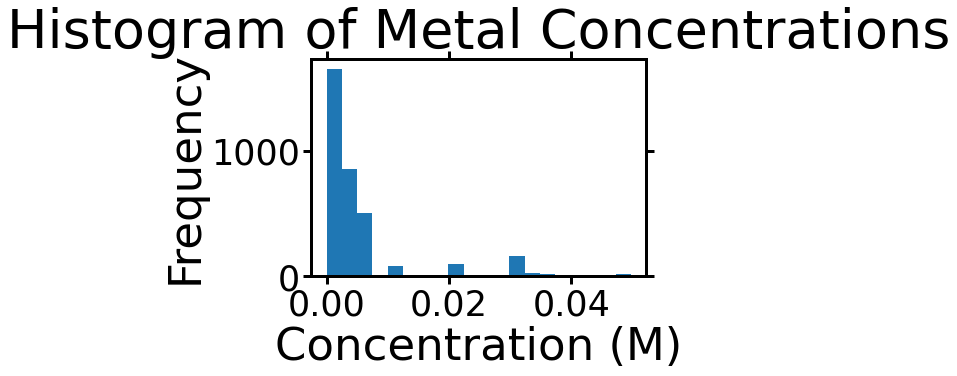

In [180]:

# Convert to numeric, coercing errors
df['Cion (M)'] = pd.to_numeric(df['Cion (M)'], errors='coerce')



# Optional: Filter out any unrealistic values (e.g., exceedingly high concentrations if necessary)
df = df[df['Cion (M)'] < 0.05]  # Adjust threshold based on data context

# Plot histogram
plt.hist(df['Cion (M)'], bins=20)
plt.xlabel("Concentration (M)")
plt.ylabel("Frequency")
plt.title("Histogram of Metal Concentrations")
plt.show()

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2527660685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CacidOrg (M)'] = pd.to_numeric(df['CacidOrg (M)'], errors='coerce')


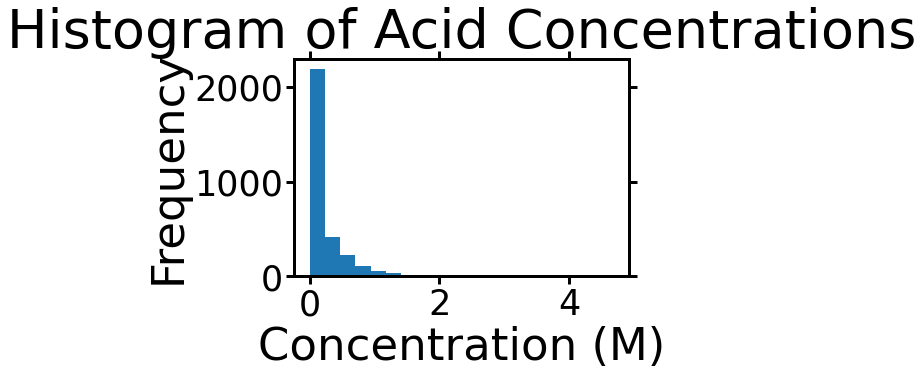

In [190]:

# Convert to numeric, coercing errors
df['CacidOrg (M)'] = pd.to_numeric(df['CacidOrg (M)'], errors='coerce')



# Optional: Filter out any unrealistic values (e.g., exceedingly high concentrations if necessary)
df = df[df['CacidOrg (M)'] < 5]  # Adjust threshold based on data context

# Plot histogram
plt.hist(df['CacidOrg (M)'], bins=20)
plt.xlabel("Concentration (M)")
plt.ylabel("Frequency")
plt.title("Histogram of Acid Concentrations")
plt.show()

In [191]:
df['AcidName'].unique()

array(['HNO3', 'Hcl'], dtype=object)

11990  records on df
2110 records in df1


/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWar

Number of usefull fittings:  0


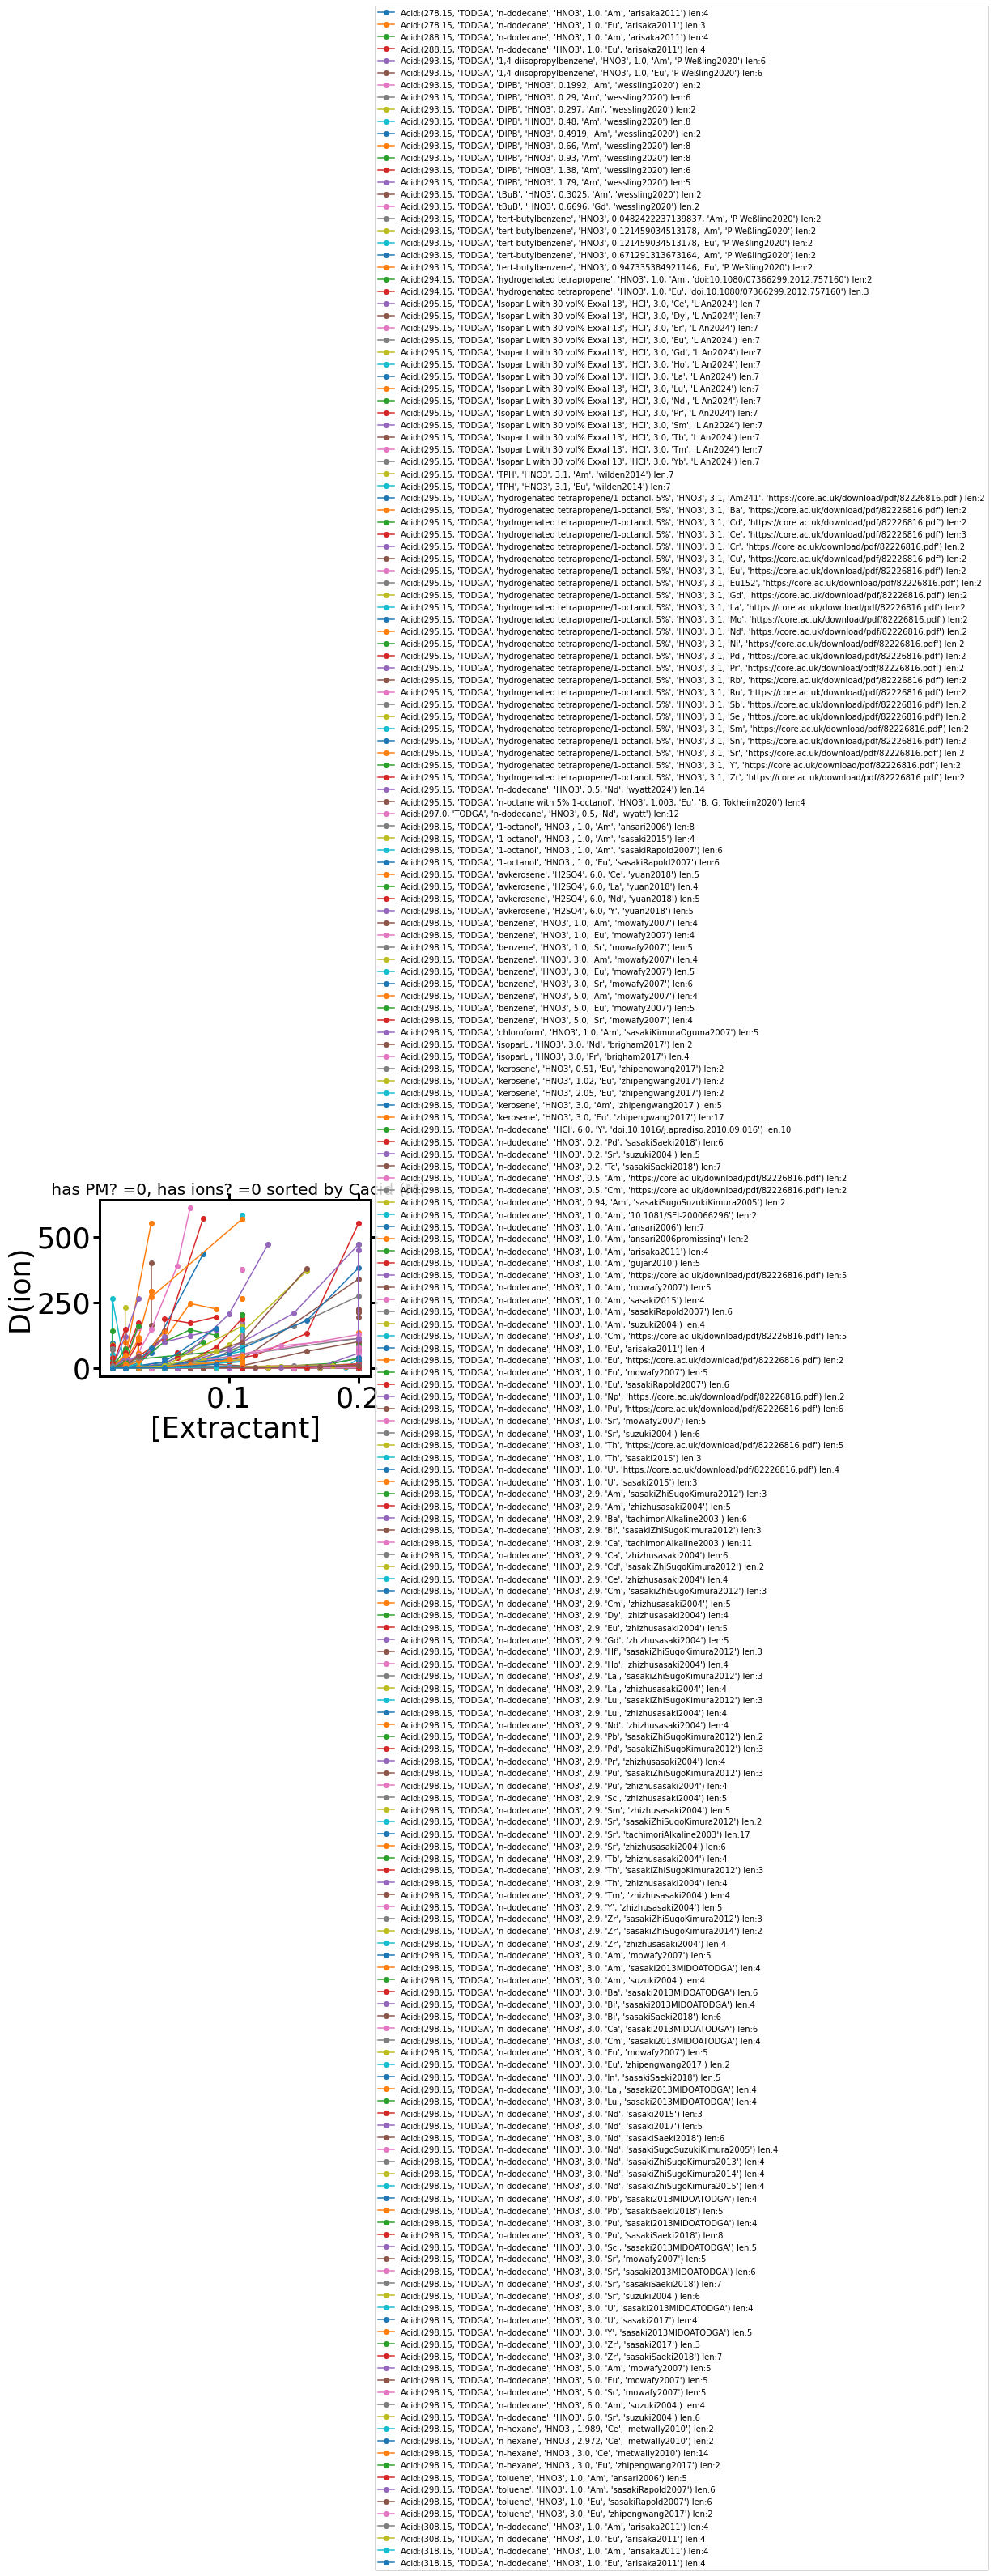

In [353]:
'''
This will fit lines throught the D values plots vs Extractants

What does the intersection means? critical ratio of

'''

group_data = True
# Define the custom function to remove oxidation state
def remove_oxidation_state(ion_name):
    # Ensure the input is a string
    if isinstance(ion_name, str):
        # Regular expression to match and capture the base element name
        match = re.match(r'(\w+)\((?:[IVXLCDM]+|[-+]?[1-9])\)', ion_name)
        if match:
            return match.group(1)
    return ion_name  # Return as-is if no match or not a string
solvent_mapping = {'ndodecane': 'n-dodecane', 'noctane':'n-octane', 'ndecane':'n-decane',
                 '1octane':'octane','nhexane':'n-hexane','nheptane':'n-heptane',
                 'noctanol':'n-octanol','1octanol':'1-octanol', 'ntetradecane':'n-tetradecane',
                   'n-Dodecane':'n-dodecane'
                }

# Replace the values in the 'solvent' and Phase modifier column using the dictionary
df['SolventName'].replace(solvent_mapping, inplace=True)
df['IonName'] = df['IonName'].apply(remove_oxidation_state)

print(len(df),' records on df')
df1 = df.loc[ (df['ExtractantName'] == 'TODGA')  # (df['AcidName'] == 'HNO3') &# (df['Cextractant (M)'] < 2) &
              #(df['ExtractantName'] == 'TEHDGA') &
              #(df['Cextractant (M)'] > 0.1) &
             # (df['ExtractantName'] == 'TODGA') &
              #(df['ExtractantName'] == 'TBP') &
            # & (df['Cacid (M)'] == 1) 
            & (df['has ions?'] ==1) & (df['has PM?'] ==0)
       #           & (df['IonName'].isin(['Am','Am(III)','aEu','aEu(III)']))
       #     & (df['IonName'].isin(['Am','Am(III)','aEu','aEu(III)']))
       #         & (df1['IonName'].isin(['Sr','Eu(III)']))
                #& ( df1['Third phase'] != 1)
       #      & ( df['SolventName'].isin( ['ndodecane','n-Dodecane','n-dodecane']))            
             & (df['D(ion)']>0) & (df['D(ion)'] < 800)
              #& (df['location2'] == 'Extraction of different actinides in the presence of 97 g/L of U(VI) in the aqueous phase')
              #& (df['logExtractant_AcidOrg'].isna()== False)
              & (df['Third phase'] != 1)            #care here, NaN thirdphase will be skipped  !!!!!
              #& (df['ref citation'] == 'yaita2004') #to
           #  & (df['Cacid (M)'].isin([1,3,5]))
           #  & (df['Temp (K)'].isin([298.15]))

].copy()

print(len(df1), 'records in df1')

#fig, axii = plt.subplots()
#df2 = df1[df1['Cextractant (M)'] < 0.1]
#axii.set_xlabel('[Extractant]')
#axii.set_ylabel('D ion')
#axii.scatter(x=df1['Cextractant (M)'], y=df1['D(ion)'] )
#plt.show()



#this is clustering of data
#binsAcid = [0.0,0.5,0.75,1.0,1.5,2.0,2.5,3.0,3.5,  4.0,4.5,5]
#binsAcid_upper = [ 0.01,0.5,1.0,1.0,1.5,2.0,2.5,3.0,3.5, 4,4.5,5]
#bin_indices = np.digitize(dfR['Cacid (M)'], binsAcid, right=False) - 1
#dfR['Cacid (M)'] = dfR['Cacid (M)'].round(3)


#binsAcid = np.linspace(0, 10, 11)  # 11 points will create 10 intervals
#print(binsAcid)
#binsAcid_upper = binsAcid[:-2]  # Upper bounds of the intervals
#print(binsAcid_upper)
#bin_indicesA = np.digitize(df1['Cacid (M)'], binsAcid, right=False) - 1
#bin_indicesA = np.clip(bin_indicesA, 0, len(binsAcid_upper) - 1)
#print(bin_indicesA)
#df1['Cacid (M)'] = np.ceil(df1['Cacid (M)']).astype(int)
#df1['Cacid (M)'] = df1['Cacid (M)'].round()




# cluster data, for extractants
binsExtractant = np.linspace(0, 0.2, 21)  # 11 points will create 10 intervals
binsExtractant_upper = binsExtractant[1:]  # Upper bounds of the intervals
bin_indicesE = np.digitize(df1['Cextractant (M)'], binsExtractant, right=False) - 1
bin_indicesE = np.clip(bin_indicesE, 0, len(binsExtractant_upper) - 1)

# Assign grouped data based on bin indices
if group_data:
    df1['Cextractant (M)'] = np.take(binsExtractant_upper, bin_indicesE)
    #df1['Cacid (M)'] = np.take(binsAcid_upper, bin_indicesA)




#WITH PHASE MODIFIER
#NO IONS
fig, axii = plt.subplots()

bins = [0,0.5,0.75,1.73,2,2.25,2.5,2.75,3,3.8,4.1,6]
#bins = [0,0.08,0.1,0.46,1.73,2,3,3.8,4.1,6]
k = -1
k2 = 0

#for g,d in df1.sort_values(by='SolventName').groupby([pd.cut(df['Cacid (M)'], bins=bins)]):pd.cut(df['Cacid (M)'], bins=bins)
#for g,d in df1.sort_values(by='SolventName').groupby([df['Cacid (M)'], df['ref citation']]):

#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['Cacid (M)']]):
#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([ df['ref citation'], df['Temp (K)'], df['Cacid (M)'],df['ExtractantName'], df['SolventName']]):

#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([  df['Temp (K)'], df['Cacid (M)']]):
#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([  df['Temp (K)'], pd.cut(df['Cacid (M)'], bins=bins)]):
#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([ df['Temp (K)'], df['Cacid (M)'],df['ExtractantName'], df['SolventName'],df['afterCMC calc']]):
#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([ df['Temp (K)'], df['Cacid (M)'],df['ExtractantName'], df['SolventName']]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['ref citation'], df['Cextractant (M)']]):


#this is functional one, care with Cion
#for g,d in df1.sort_values(by='Cextractant (M)').groupby([ df['Temp (K)'], df['ExtractantName'], 
#                                                       df['SolventName'], df['Cacid (M)'],
#                                                       df['IonName'], df['Cion (M)']
#                                                          ,df['ref citation']]):


for g,d in df1.sort_values(by='Cextractant (M)').groupby([ df1['Temp (K)'], df1['ExtractantName'], 
                                                       df1['SolventName'], df1['AcidName'],df1['Cacid (M)'],
                                                       df1['IonName']#, df1['Cion (M)']
                                                       ,df1['ref citation']]
                                                        ):
    k += 1
    if k < 231230 :# (k <2) and (k>0):

        #print('\nG is', g)
        #print(d.index.values)
        #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
        #print('')

        #do some fitting with the data
        x = d['Cextractant (M)'].values.reshape(-1,1)
        y = d['D(ion)'].values
        temperature = g[0]

        #print(x)
        #print(y)
        #print('temp:',temperature)

        if(len(x)>1):
            
            # Assign colors based on normalized temperatures using the chosen colormap
            color_map = plt.get_cmap('viridis')  # Choose a colormap for temperature values
            normalized_temps = (d['Cacid (M)']/df1['Cacid (M)'].max())
            colors = color_map(normalized_temps)
            
            axii.plot(d['Cextractant (M)'],d['D(ion)'], label=f"Acid:{g} len:{len(x)}", marker='o')
                      #,color = colors)

            


            model = LinearRegression().fit(x,y)
            dstoich,dkh = fitError(x,y)
            #polyfit = a[x]x**[deg]+....+adeg
            #a, er , _, _, _= np.polyfit(x,y,1,full=True)

    #else: print(k,' too big') #print(d.shape{[0],' too small')
print('Number of usefull fittings: ', k2)
axii.set_title(' has PM? =0, has ions? =0 sorted by Cacid (M)', fontsize='20')
axii.set_xlabel('[Extractant]', fontsize=35)
axii.set_ylabel('D(ion)', fontsize=35)
axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
plt.show()

#fig, axii = plt.subplots()
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

38  outliers removed after k 2  interations,  [10415, 11312, 11256, 11311, 11314, 11328, 11313, 11327, 11329, 6076, 6095, 9225, 9226, 8729, 8693, 808, 752, 467, 455, 3020, 1767, 3061, 1764, 3030, 3042, 3051, 911, 1760, 3012, 1773, 3534, 1080, 3576, 3585, 3584, 3565, 3527, 6524]
[Extractant]: 0.01  #points 203
[Extractant]: 0.02  #points 109
[Extractant]: 0.03  #points 88
[Extractant]: 0.04  #points 20
[Extractant]: 0.05  #points 83
[Extractant]: 0.06  #points 44
[Extractant]: 0.07  #points 25
[Extractant]: 0.08  #points 17
[Extractant]: 0.09  #points 22
[Extractant]: 0.1  #points 29
[Extractant]: 0.11  #points 645
[Extractant]: 0.12  #points 3
[Extractant]: 0.13  #points 6
[Extractant]: 0.14  #points 5
[Extractant]: 0.15  #points 14
[Extractant]: 0.16  #points 53
[Extractant]: 0.17  #points 6
[Extractant]: 0.18  #points 2
[Extractant]: 0.19  #points 2
[Extractant]: 0.2  #points 696


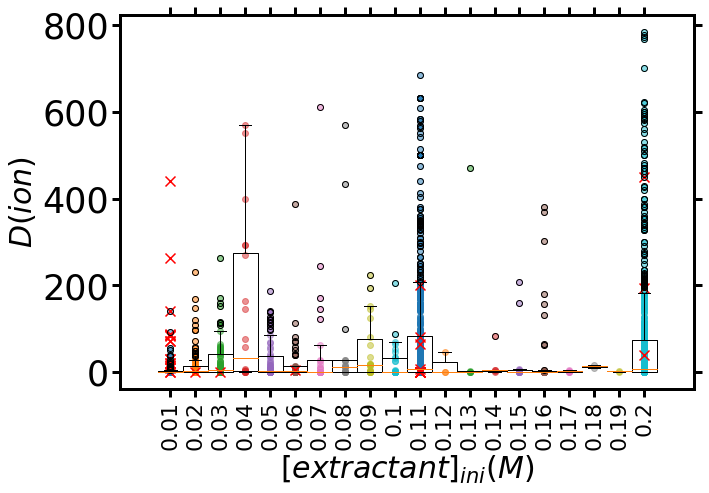

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/2114985538.py:32: RuntimeWar

Number of usefull fittings:  0


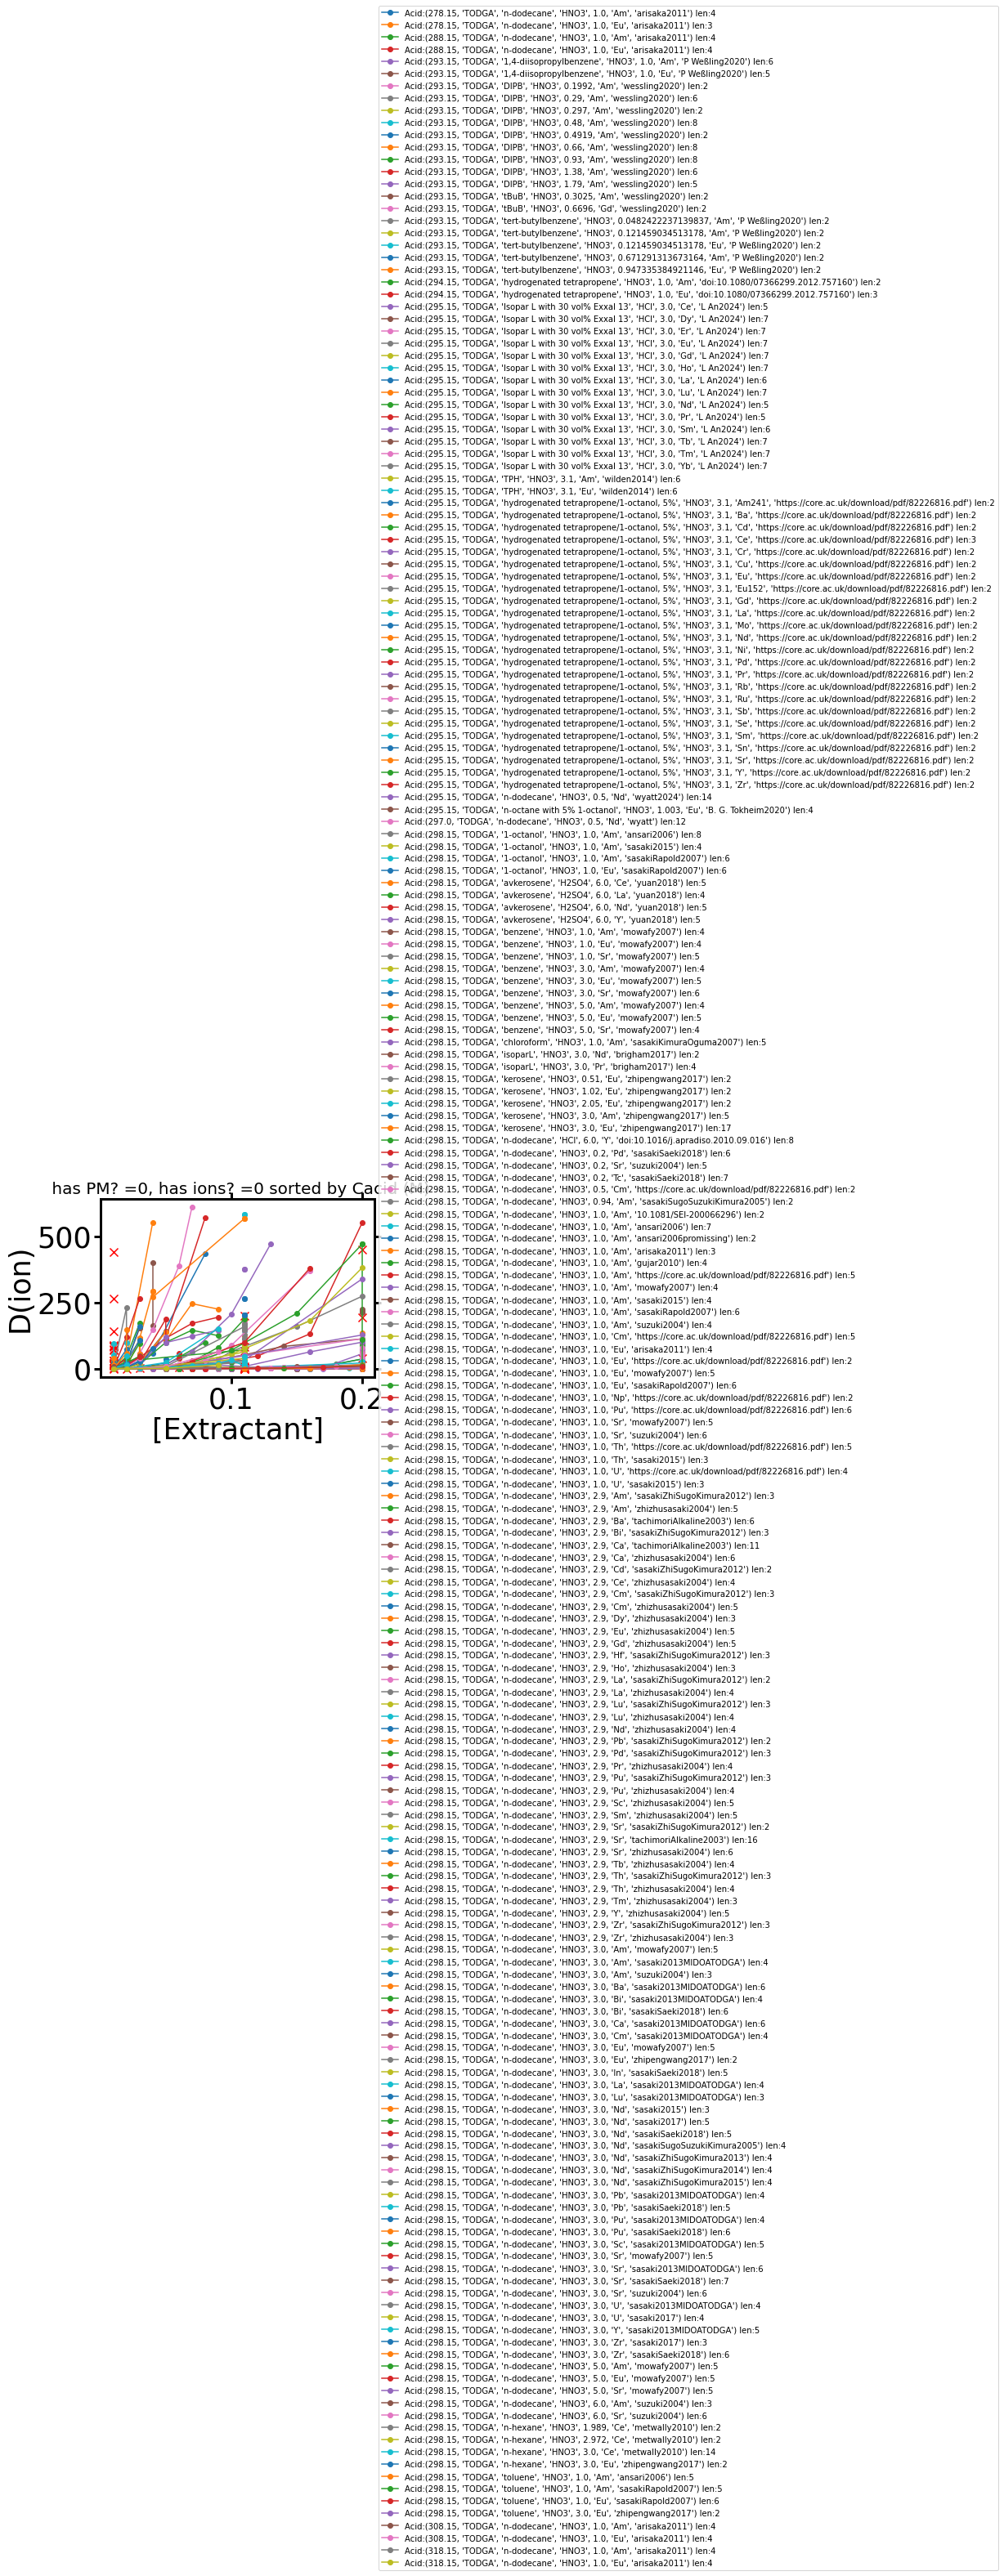

In [356]:
def find_outliers(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (1.5 * iqr)
    upper_bound = quartile_3 + (1.5 * iqr)
    
    #outlier_indices = [idx for idx in range(len(data)) if data[idx] < lower_bound or data[idx] > upper_bound]
    #outliers = [data[idx] for idx in outlier_indices]

    #outlier_indices = data[(data.iloc[:,0] < lower_bound) | (data.iloc[:,0] > upper_bound)].index
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    #indices = [x for x in data.index if da]
    
    # Get the outliers (rows) using the outlier indices
    #outliers = df.loc[outlier_indices].values
    
    return outliers,[lower_bound,upper_bound]


#dfR['Cacid (M)'] = dfR['Cacid (M)'].round(0)

#fig, axii = plt.subplots()

# Collect unique extractant values for x-axis limits
extractant_values = df1['Cextractant (M)'].unique()
x_min, x_max = -.01 , 1.1*extractant_values.max() 

dfred = df1.copy()
tempOutliers = 1
listOutlierse = []
k=0
while tempOutliers>0:
    k+= 1
    if k==2:
        break
    tempOutliers = 0

    indices_outliers = []
    
    #this groups the data with similar characteristics
    for g,d in dfred.sort_values(by='Cextractant (M)').groupby([ dfred['Temp (K)'], dfred['ExtractantName'], 
                                                       dfred['SolventName'], dfred['AcidName'],dfred['Cacid (M)'],
                                                       dfred['IonName']#, df1['Cion (M)']
                                                       ]):
        #fig, axii = plt.subplots()
        # print('Outliers for group',
        #       d[['Temp (K)','SolventName','ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)',
        #         'IonName','ref citation','Cion (M)']].values)
        
        

        #axii.boxplot( d['CacidOrg (M)'], positions=[d['Cextractant (M)'].iloc[0]], widths=0.02)#, patch_artist=True)
        #axii.scatter(d['Cextractant (M)'], d['D(ion)'], alpha=0.5)
        
        #define interval 
        # Step 1: Bin the 'Cextractant (M)' column into 10 intervals
        bins = 20
        d['Cextractant_bin'] = pd.cut(d['Cextractant (M)'], bins=bins)

        # Step 2: Get the midpoints of the bins for plotting
        bin_midpoints = d['Cextractant_bin'].apply(lambda x: x.mid if pd.notnull(x) else None)
        # Set xlim before plotting boxplot
        bin_edges = pd.cut(d['Cextractant (M)'], bins=10).cat.categories
        #axii.set_xlim(bin_edges[0].left, bin_edges[-1].right)

        # Step 3: Create the boxplot
        grouped = d.groupby('Cextractant_bin')

        for interval, group in grouped:
            if not group.empty:

                midpoint = group['Cextractant (M)'].mean()  # Calculate mean for position
                #print(midpoint)
                #axii.boxplot(group['D(ion)'], positions=[midpoint], widths=0.02)



                #axii.autoscale()
                outliers,lwupbounds = find_outliers(group['D(ion)']) #for y axis
                #print('outliers from nonlinear regression:',outliers, ' lenL',len(outliers))
                indices_outliers = group.loc[(group['D(ion)'] < lwupbounds[0]) | (d['D(ion)'] > lwupbounds[1])  ].index

                # Append only non-empty lists of indices
                if not indices_outliers.empty:
                    listOutlierse.extend(indices_outliers.tolist())


                #print('removing indices', indices_outliers, ' from ', g)
                tempOutliers += len(outliers)
                dfred = dfred.drop(indices_outliers)
        #plt.show()
print(len(listOutlierse),' outliers removed after k', k, ' interations, ', listOutlierse)
        
fig, axii = plt.subplots()
for g,d in dfred.sort_values(by='Cextractant (M)').groupby([ dfred['Cextractant (M)']]):
    axii.boxplot( d['D(ion)'], positions=[d['Cextractant (M)'].iloc[0]], widths=0.01)#, patch_artist=True)
    axii.scatter(d['Cextractant (M)'], d['D(ion)'], alpha=0.5)

   # plt.boxplot([df['A'], df['B'], df['C']],
   #         labels=df.columns,
   #         patch_artist=True,  # fill with color
   #         medianprops={'color': 'blue'},  # color of the median line
   #         boxprops={'color': 'black', 'facecolor': 'lightgray'},  # box properties
   #         whiskerprops={'color': 'black'},  # whisker properties
   #         capprops={'color': 'black'},  # cap properties
   #         flierprops={'color': 'red', 'markeredgecolor': 'red'})

    print('[Extractant]:',d['Cextractant (M)'].iloc[0], ' #points', len(d))

for item in listOutlierse:
    axii.scatter(df1.loc[item]['Cextractant (M)'], df1.loc[item]['D(ion)'], c='red', s=100, marker='x' ) #for x axis

# Set x-axis limits
axii.set_xlim(x_min, x_max)

# Add labels, title, and legend
axii.set_xlabel(r'$[extractant]_{ini} (M)$',fontsize='30')
axii.set_ylabel(r'$D(ion)$',fontsize='30')

axii.tick_params(axis='x', labelsize=22)
axii.tick_params(axis='x', rotation=90)

fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()
#name = 'boxplotExtractantTODGA'
#fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)




# replot 

#WITH PHASE MODIFIER
#NO IONS
fig, axii = plt.subplots()
k = -1
k2 = 0



for g,d in dfred.sort_values(by='Cextractant (M)').groupby([ dfred['Temp (K)'], dfred['ExtractantName'], 
                                                       dfred['SolventName'], dfred['AcidName'],dfred['Cacid (M)'],
                                                       dfred['IonName']#, df1['Cion (M)']
                                                       ,dfred['ref citation']]
                                                        ):
    k += 1
    if k < 231230 :# (k <2) and (k>0):

        #do some fitting with the data
        x = d['Cextractant (M)'].values.reshape(-1,1)
        y = d['D(ion)'].values
        temperature = g[0]


        if(len(x)>1):
            axii.plot(d['Cextractant (M)'],d['D(ion)'], label=f"Acid:{g} len:{len(x)}", marker='o')

            model = LinearRegression().fit(x,y)
            dstoich,dkh = fitError(x,y)


    #else: print(k,' too big') #print(d.shape[0],' too small')
print('Number of usefull fittings: ', k2)
axii.set_title(' has PM? =0, has ions? =0 sorted by Cacid (M)', fontsize='20')
axii.set_xlabel('[Extractant]', fontsize=35)
axii.set_ylabel('D(ion)', fontsize=35)
axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
for item in listOutlierse:
    axii.scatter(df1.loc[item]['Cextractant (M)'], df1.loc[item]['D(ion)'], c='red', s=100, marker='x' ) #for x axis


axii.plot()
plt.show()


Outliers for group [[298.15 'n-dodecane' 'TODGA' 0.01 'HNO3' 1.0 'Am' 'suzuki2004'
  '0.000000001']
 [298.15 'n-dodecane' 'TODGA' 0.01 'HNO3' 1.0 'Am' 'arisaka2011'
  '0.000000001']
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 1.0 'Am' 'arisaka2011'
  '0.000000001']
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 1.0 'Am' 'sasakiRapold2007'
  '0.00000000131']
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 1.0 'Am'
  'https://core.ac.uk/download/pdf/82226816.pdf' nan]
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 1.0 'Am' 'sasaki2015'
  '0.0000004']
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 1.0 'Am' 'ansari2006' nan]
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 1.0 'Am' 'sasakiRapold2007'
  '0.00000000131']
 [298.15 'n-dodecane' 'TODGA' 0.03 'HNO3' 1.0 'Am' 'suzuki2004'
  '0.000000001']
 [298.15 'n-dodecane' 'TODGA' 0.03 'HNO3' 1.0 'Am'
  'https://core.ac.uk/download/pdf/82226816.pdf' nan]
 [298.15 'n-dodecane' 'TODGA' 0.03 'HNO3' 1.0 'Am' 'mowafy2007' nan]
 [298.15 'n-dodecane' 'TODGA' 0.03 'HNO3' 1.0 'Am'

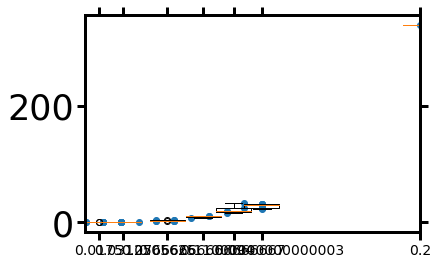

Outliers for group [[298.15 'n-dodecane' 'TODGA' 0.01 'HNO3' 3.0 'Am' 'sasaki2013MIDOATODGA'
  nan]
 [298.15 'n-dodecane' 'TODGA' 0.01 'HNO3' 3.0 'Am' 'sasaki2013MIDOATODGA'
  nan]
 [298.15 'n-dodecane' 'TODGA' 0.01 'HNO3' 3.0 'Am' 'suzuki2004'
  '0.000000001']
 [298.15 'n-dodecane' 'TODGA' 0.01 'HNO3' 3.0 'Am' 'suzuki2004'
  '0.000000001']
 [298.15 'n-dodecane' 'TODGA' 0.01 'HNO3' 3.0 'Am' 'suzuki2004'
  '0.000000001']
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 3.0 'Am' 'sasaki2013MIDOATODGA'
  nan]
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 3.0 'Am' 'sasaki2013MIDOATODGA'
  nan]
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 3.0 'Am' 'SA Ansari2017' nan]
 [298.15 'n-dodecane' 'TODGA' 0.02 'HNO3' 3.0 'Am' 'suzuki2004'
  '0.000000001']
 [298.15 'n-dodecane' 'TODGA' 0.04 'HNO3' 3.0 'Am' 'mowafy2007' nan]
 [298.15 'n-dodecane' 'TODGA' 0.06 'HNO3' 3.0 'Am' 'mowafy2007' nan]
 [298.15 'n-dodecane' 'TODGA' 0.1 'HNO3' 3.0 'Am' 'mowafy2007' nan]
 [298.15 'n-dodecane' 'TODGA' 0.11 'HNO3' 3.0 'Am'
  '1

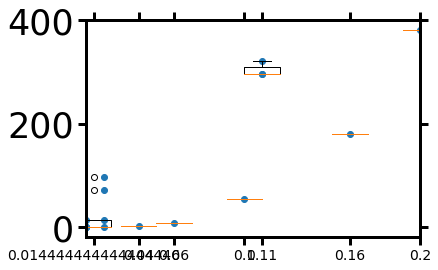

6  outliers removed after k 0  interations,  [808, 703, 446, 467, 1037, 3536]
Number of usefull fittings:  0


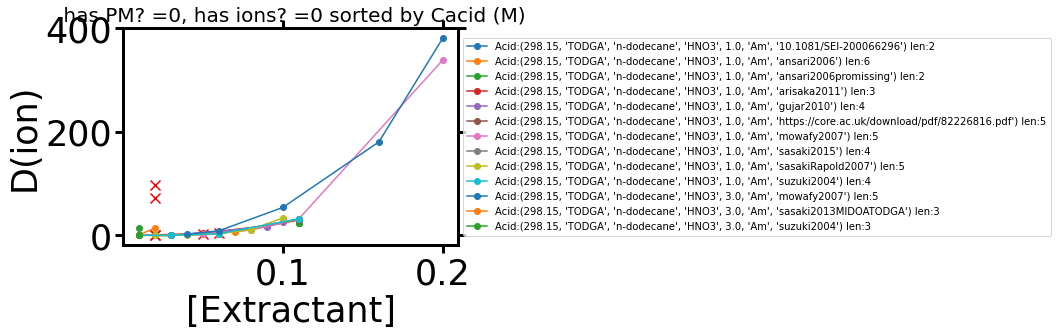

In [349]:
''' 
This is the improved version: It should group data accordingly, 
then separate data into small intervals of [extractant] and apply the 
box plot for each interval

loop of outlier removed...

'''



def find_outliers(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (1.5 * iqr)
    upper_bound = quartile_3 + (1.5 * iqr)
    
    #outlier_indices = [idx for idx in range(len(data)) if data[idx] < lower_bound or data[idx] > upper_bound]
    #outliers = [data[idx] for idx in outlier_indices]

    #outlier_indices = data[(data.iloc[:,0] < lower_bound) | (data.iloc[:,0] > upper_bound)].index
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    #indices = [x for x in data.index if da]
    
    # Get the outliers (rows) using the outlier indices
    #outliers = df.loc[outlier_indices].values
    
    return outliers,[lower_bound,upper_bound]


#dfR['Cacid (M)'] = dfR['Cacid (M)'].round(0)

#fig, axii = plt.subplots()

# Collect unique extractant values for x-axis limits
extractant_values = df1['Cextractant (M)'].unique()
x_min, x_max = -.01 , 1.1*extractant_values.max() 

dfred = df1.copy()
tempOutliers = 1
listOutlierse = []
k=0

   
tempOutliers = 0
indices_outliers = []

#this groups the data with similar characteristics
for g,d in dfred.sort_values(by='Cextractant (M)').groupby([ dfred['Temp (K)'], dfred['ExtractantName'], 
                                               dfred['SolventName'], dfred['AcidName'],dfred['Cacid (M)'],
                                               dfred['IonName']#, df1['Cion (M)']
                                               ]):
    
    #for each group create a plot 
    
    fig, axii = plt.subplots()
    axii.tick_params(axis='x', labelsize=14)  # Change the x-axis tick label size to 14

    
    print('Outliers for group',
          d[['Temp (K)','SolventName','ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)',
             'IonName','ref citation','Cion (M)']].values)

    
    #axii.boxplot(d['D(ion)'], positions=[d['Cextractant (M)'].iloc[0]], widths=0.02)#, patch_artist=True)
    axii.scatter(d['Cextractant (M)'], d['D(ion)'])

    #define interval 
    # Step 1: Bin the 'Cextractant (M)' column into 10 intervals
    bins = 10
    d['Cextractant_bin'] = pd.cut(d['Cextractant (M)'], bins=bins)

    # Step 2: Get the midpoints of the bins for plotting
    bin_midpoints = d['Cextractant_bin'].apply(lambda x: x.mid if pd.notnull(x) else None)
    # Set xlim before plotting boxplot
    bin_edges = pd.cut(d['Cextractant (M)'], bins=10).cat.categories
    axii.set_xlim(bin_edges[0].left, bin_edges[-1].right)
    
    # Step 3: Create the boxplot
    grouped = d.groupby('Cextractant_bin')

    for interval, group in grouped:
        if not group.empty:
            
            midpoint = group['Cextractant (M)'].mean()  # Calculate mean for position
            print(midpoint)
            axii.boxplot(group['D(ion)'], positions=[midpoint], widths=0.02)
            
            

            #axii.autoscale()
            outliers,lwupbounds = find_outliers(group['D(ion)']) #for y axis
            #print('outliers from nonlinear regression:',outliers, ' lenL',len(outliers))
            indices_outliers = group.loc[(group['D(ion)'] < lwupbounds[0]) | (d['D(ion)'] > lwupbounds[1])  ].index

            # Append only non-empty lists of indices
            if not indices_outliers.empty:
                listOutlierse.extend(indices_outliers.tolist())


            #print('removing indices', indices_outliers, ' from ', g)
            tempOutliers += len(outliers)
            dfred = dfred.drop(indices_outliers)
    plt.show()
print(len(listOutlierse),' outliers removed after k', k, ' interations, ', listOutlierse)
    
    
fig, axii = plt.subplots()
k = -1
k2 = 0



for g,d in dfred.sort_values(by='Cextractant (M)').groupby([ dfred['Temp (K)'], dfred['ExtractantName'], 
                                                       dfred['SolventName'], dfred['AcidName'],dfred['Cacid (M)'],
                                                       dfred['IonName']#, df1['Cion (M)']
                                                       ,dfred['ref citation']]
                                                        ):
    k += 1
    if k < 231230 :# (k <2) and (k>0):

        #do some fitting with the data
        x = d['Cextractant (M)'].values.reshape(-1,1)
        y = d['D(ion)'].values
        temperature = g[0]


        if(len(x)>1):
            axii.plot(d['Cextractant (M)'],d['D(ion)'], label=f"Acid:{g} len:{len(x)}", marker='o')

            model = LinearRegression().fit(x,y)
            dstoich,dkh = fitError(x,y)


    #else: print(k,' too big') #print(d.shape[0],' too small')
print('Number of usefull fittings: ', k2)
axii.set_title(' has PM? =0, has ions? =0 sorted by Cacid (M)', fontsize='20')
axii.set_xlabel('[Extractant]', fontsize=35)
axii.set_ylabel('D(ion)', fontsize=35)
axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
for item in listOutlierse:
    axii.scatter(df1.loc[item]['Cextractant (M)'], df1.loc[item]['D(ion)'], c='red', s=100, marker='x' ) #for x axis


axii.plot()
plt.show()



2110
1123
20
Int64Index([5883, 5910, 5911, 5884, 5887, 5912, 5888, 5885, 5915, 5889, 5916,
            5886, 5891, 5902, 5895, 5894, 5918, 8193, 5893, 5892],
           dtype='int64')
[['TODGA' 0.01 'HNO3' 1.0 '1-octanol' 'sasaki2015' 'Fig 3' nan
  '0.0000004']
 ['TODGA' 0.01 'HNO3' 1.0 '1-octanol' 'sasakiRapold2007' 'fig4b' nan
  '0.00000000131']
 ['TODGA' 0.01 'HNO3' 1.0 '1-octanol' 'sasakiRapold2007' 'fig4b' nan
  '0.00000000131']
 ['TODGA' 0.02 'HNO3' 1.0 '1-octanol' 'sasaki2015' 'Fig 3' nan
  '0.0000004']
 ['TODGA' 0.02 'HNO3' 1.0 '1-octanol' 'ansari2006' 'fig4' nan nan]
 ['TODGA' 0.02 'HNO3' 1.0 '1-octanol' 'sasakiRapold2007' 'fig4b' nan
  '0.00000000131']
 ['TODGA' 0.03 'HNO3' 1.0 '1-octanol' 'ansari2006' 'fig4' nan nan]
 ['TODGA' 0.03 'HNO3' 1.0 '1-octanol' 'sasaki2015' 'Fig 3' nan
  '0.0000004']
 ['TODGA' 0.04 'HNO3' 1.0 '1-octanol' 'sasakiRapold2007' 'fig4b' nan
  '0.00000000131']
 ['TODGA' 0.05 'HNO3' 1.0 '1-octanol' 'ansari2006' 'fig4' nan nan]
 ['TODGA' 0.06 'HNO3' 1.0 '1-

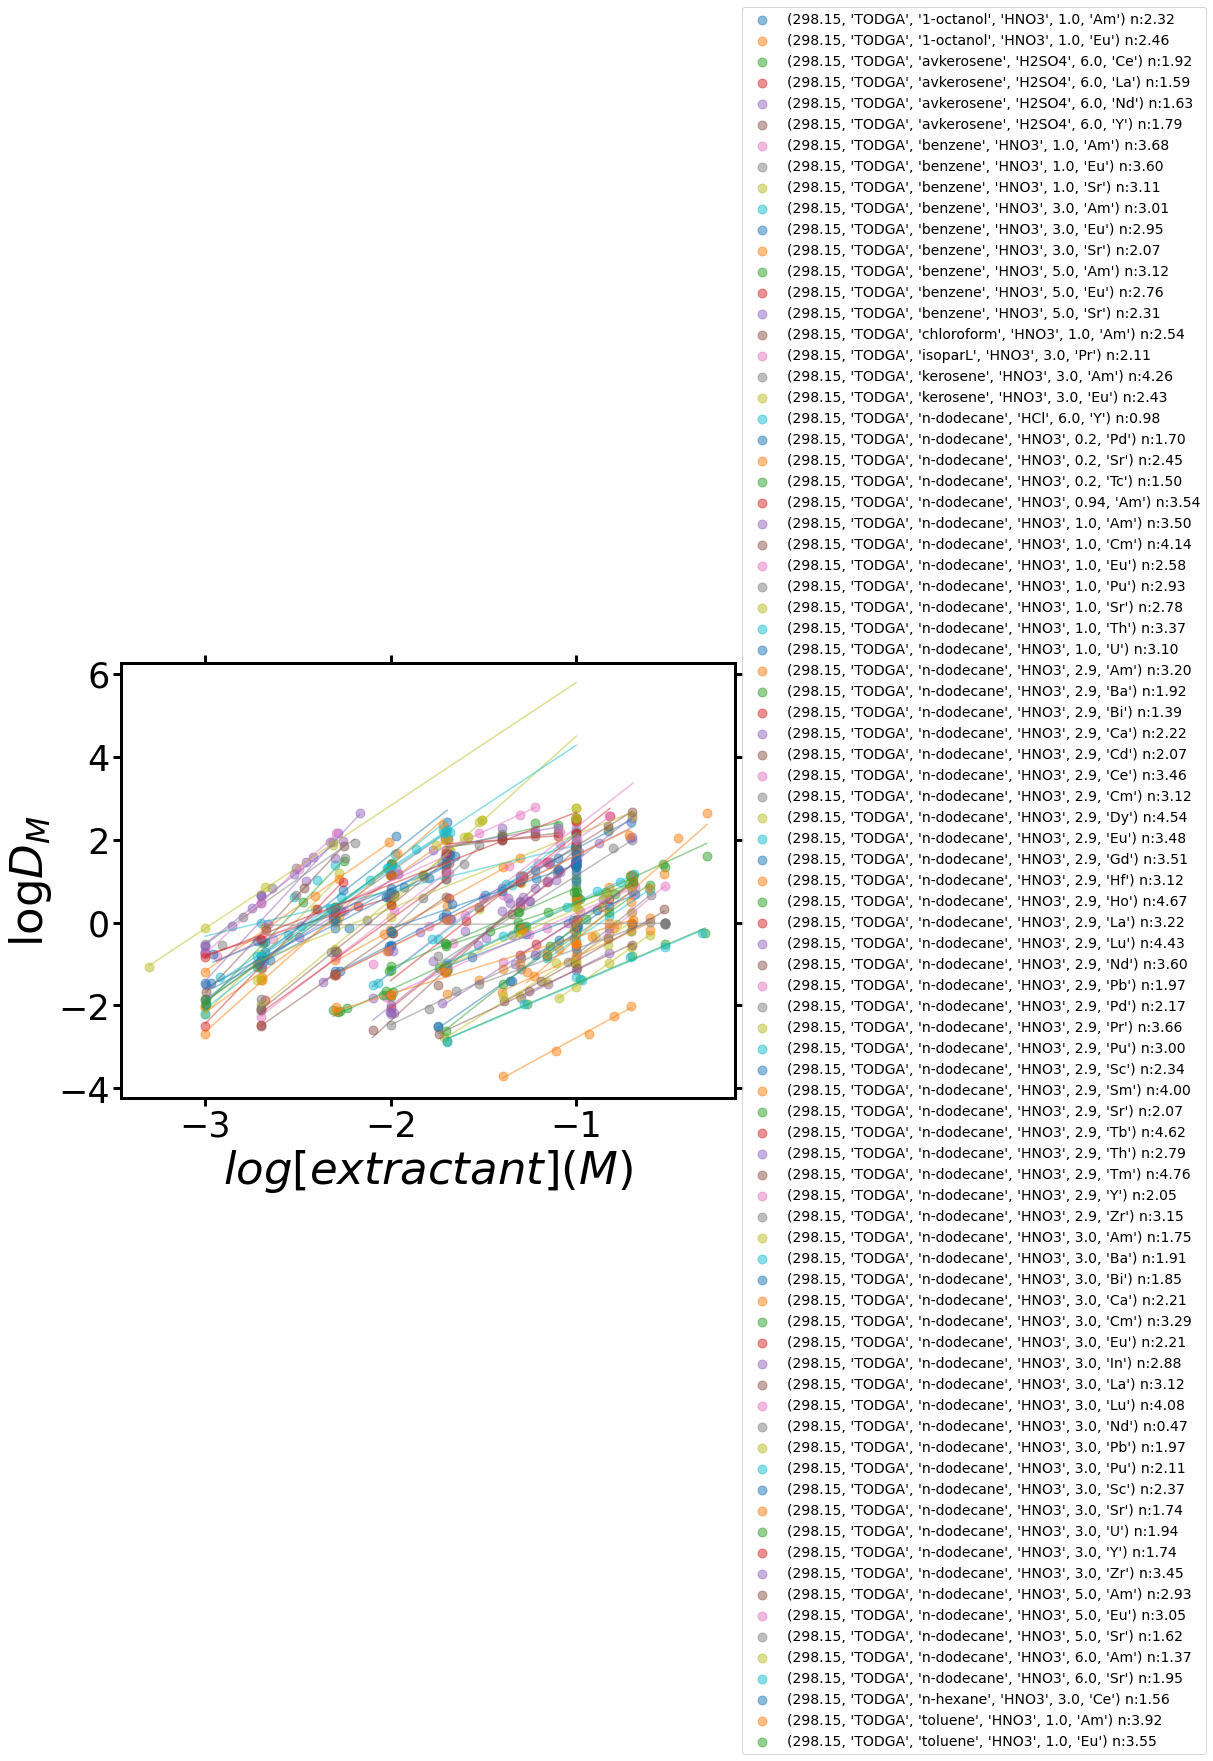

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_1203/1543094186.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


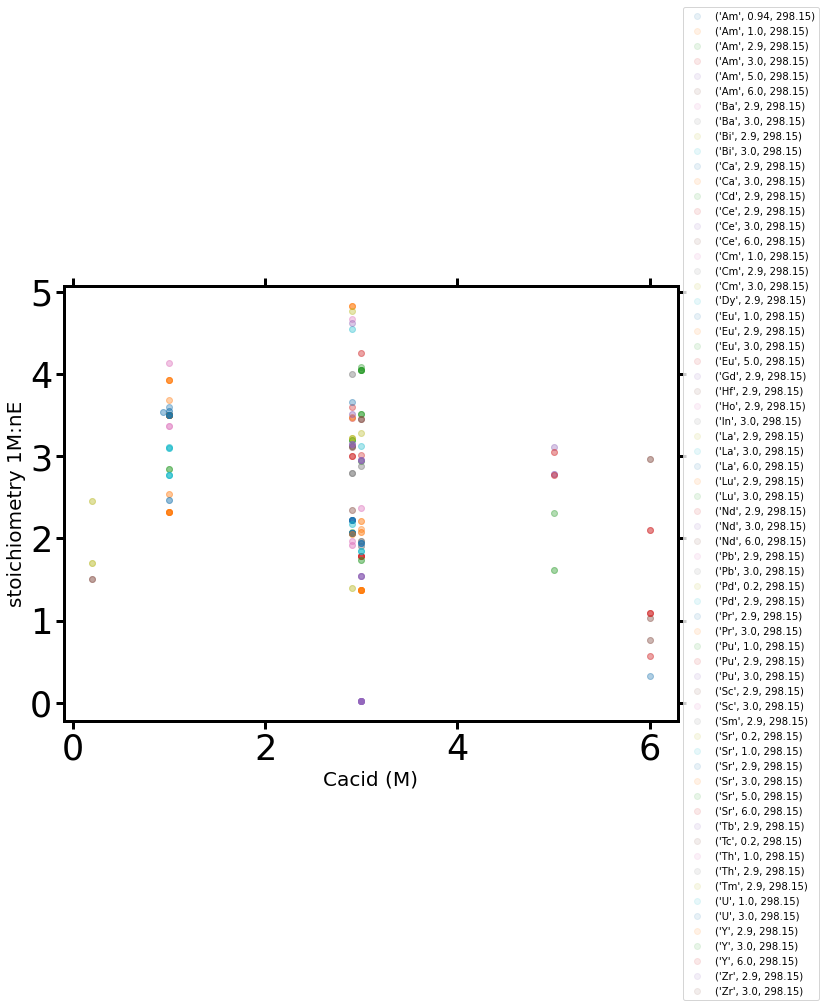

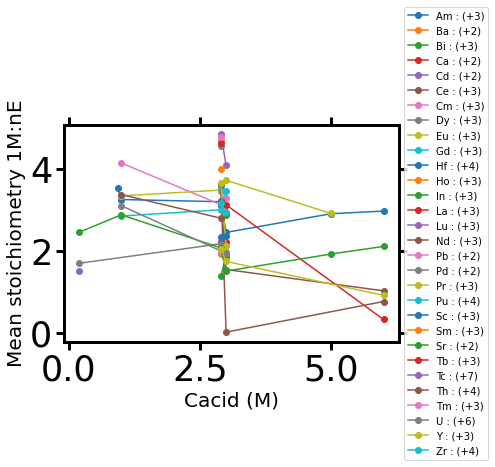

In [357]:
import re
''' here im doing log fitting'''
#
#
#       This is for the  sharma method, where HNO3 varies and Cextractant is fixed
#
#

#df1 is defined in block vefore

#plt.xlabel('log [Extractant] (M)')
#plt.ylabel('log D(ion)')
#plt.scatter(x=df1['logAcid'], y=df1['logDion'] )

# Define the custom function to remove oxidation state
def remove_oxidation_state(ion_name):
    # Ensure the input is a string
    if isinstance(ion_name, str):
        # Regular expression to match and capture the base element name
        match = re.match(r'(\w+)\((?:[IVXLCDM]+|[-+]?[1-9])\)', ion_name)
        if match:
            return match.group(1)
    return ion_name  # Return as-is if no match or not a string

dfred['IonName'] = dfred['IonName'].apply(remove_oxidation_state)


dfred = df1.loc[#(~df1['ExtractantName'].isin(['aTODGA','kTEHDGA']))
                 (df1['ExtractantName'].isin(['TODGA']))
                & (df1['has PM?'] == 0) 
               #& (df1['Cextractant (M)'] == 0.2)
               # & (df1['Cacid (M)'] >0.7)
               # & (df1['Cacid (M)'] <1.1)
       #         & (df1['IonName'].isin(['Cm','Pd','Pu','Th', 'U', 'Am','Eu','Sr']))
         
       #         & (df1['IonName'].isin(['Am','Am(III)','sNd','Eu(III)a']))
       #         & (df1['IonName'].isin(['aSr','Eu']))
                #& ( df1['Third phase'] != 1)
       #         & ( df1['SolventName'].isin( ['ndodecane','n-Dodecane','n-dodecane']))
       #          & ( df1['SolventName'].isin( ['benzene','TPH']))

                
       #         & ( df1['SolventName'] != 'hydrogenated tetrapropene/1-octanol, 5%')
       #         & ( df1['AcidName'] == 'HNO3')
                & (df1['Temp (K)'] == 298.15)
               # & (df1['ref citation'].isin(['sasakiZhiSugoKimura2012','zhizhusasaki2004','mowafy2007']))
       #         & (df1['ref citation'].isin(['sasakiZhiSugoKimura2012','zhizhusasaki2004','sasaki2013MIDOATODGA','suzuki2004']))
                #& (~df1['ref citation'].isin(['sasaki2013MIDOATODGA','suzuki2004','mowafy2007']))
             ].copy()

dfred['IonName'] = dfred['IonName'].apply(remove_oxidation_state)
dfred['coef'] = None
print(len(df1.index))
print(len(dfred.index))

#WITH PHASE MODIFIER
#NO IONS
fig, axii = plt.subplots()

bins = [0,0.5,0.75,1.73,2,2.25,2.5,2.75,3,3.8,4.1,6]
bins = [0.7]
#bins = [0,0.08,0.1,0.46,1.73,2,3,3.8,4.1,6]
k = -1
k2 =0


stoich = []
acid = []
cumulated = 0

#,dfred['PmName'],dfred['Cpm (M)'], ,dfred['Cion (M)'] dfred['Cextractant (M)'],
for g,d in dfred.sort_values(by=['logExtractant','Cacid (M)']).groupby([ dfred['Temp (K)'], dfred['ExtractantName'],
                                                    dfred['SolventName'],
                                                      dfred['AcidName'], 
                                                    dfred['Cacid (M)'],
                                                    dfred['IonName'],
                                                    #dfred['Cion (M)'],
                                                    #dfred['ref citation']
                                                                       ]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['ref citation'], df['Cextractant (M)'],df['afterCMC calc']]):
    k += 1

    
    
    #if (d['Temp (K)'].iloc[0] > 294.15): #and (d['Cextractant (M)'].iloc[0] == 2.24):
    if (k <10000) and (k>-10):
        
        #do some fitting with the data
        #x1=d['logAcid'].values
        ##x = d['logAcid'].values.reshape(-1,1)
        y = d['logDion'].values
        #y = d['D(ion)'].values
        
        
        #x1=d['Cextractant (M)'].values
        #x = d['Cextractant (M)'].values.reshape(-1,1)
        #x1=d['logExtractant'].values
        #x = d['logExtractant'].values.reshape(-1,1)
        x1=d['logExtractant'].values
        x = d['logExtractant'].values.reshape(-1,1)
   
        temperature = g[0]
        

        if(len(x)>2) : #this prints the dots & (d['Cacid (M)'].iloc[0]== 3)
            cumulated = cumulated +  len(d.index)
            print(len(y))     

            #print('G is', g)
            print(d.index)
            print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation','location of data','PmName','Cion (M)']].values)

            
            
            try:   
                ransac = linear_model.RANSACRegressor()
                ransac.fit(x,y)

                model = LinearRegression().fit(x,y)
                dstoich, dkh = fitError(x,y)
                print(g,' coef:',model.coef_, '  intercept:', model.intercept_, ' +/-', dstoich)
                
                if model.coef_ != 0 :
                    # Create scatter plot and capture the color
                    scatter = axii.scatter(x1, y, label=f"{g} n:{model.coef_[0]:.2f}", marker='o', s=80, alpha=0.5)

                    # Get the color used in scatter plot
                    scatter_color = scatter.get_edgecolor()[0]  # If you use a single colo

                    plt.plot(x, ransac.predict(x), alpha=0.5 , c=scatter_color )
                    #plt.plot(x, model.predict(x), alpha=0.5 , c=scatter_color )

                    #axii.plot(x1,y,label=f"Acid:{g}", alpha=1, c='black')
                    dfred.loc[d.index, 'coef'] = ransac.estimator_.coef_[0] #model.coef_[0]  # Assigning the first coefficient if multiple
                    stoich.append(ransac.estimator_.coef_[0])
                    #dfred.loc[d.index, 'coef'] = model.coef_[0]  # Assigning the first coefficient if multiple
                    #stoich.append(model.coef_)
                    
                    acid.append(g[4])
                    

            except:
                _ = 0
                #print('could not fitt a line')


    #else: print(k,' too big') #print(d.shape[0],' too small')

print('number of points ploted:',cumulated)
print('number of usefull fittings: ',k2)
axii.set_xlabel(r'$log[extractant] (M)$')
axii.set_ylabel(r'log$D_M$')
#axii.set_ylim(-1,20)
#axii.set_ylim(0,50)
#plt.xlim(-1,1)
#fig.set_size_inches(9.0, 8.0, forward=True)
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
#plt.show()

axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='14')

#axii.legend().set_visible(False)
fig.set_size_inches(11.0, 8.0, forward=True)
#fig.tight_layout()
plt.show()
#name = 'logDlogTODGA'#'logdDMDOHEMAA065'
#fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)



acidMeanList = []
coefMeanList = []
ionNameList = []
oxidationList = []
refList = []


dfcoef = dfred.loc[ ( dfred['coef'] > 0)  & (dfred['ExtractantName'] != 'aTODGA') & (dfred['IonName'] != 'aNd')].copy()

fig, axii = plt.subplots()

for g,d in dfcoef.sort_values(by=['Cacid (M)']).groupby(['IonName','Cacid (M)','Temp (K)']):
    
    if len(g)>-2:
        #axii.plot(dfcoef.sort_values(by=['Cacid (M)'])['Cacid (M)'], dfcoef.sort_values(by=['Cacid (M)'])['coef'])
        
        
        coefMean = np.mean(d['coef'].values)
        coefSpread = np.std(d['coef'].values)
        
        coefMeanList.append(coefMean)
        acidMeanList.append(d['Cacid (M)'].iloc[0])
        
        refList.append(d['ref citation'].iloc[0])
        ionNameList.append(d['IonName'].iloc[0])
        oxidationList.append(oxidation_states[d['IonName'].iloc[0]])

        #axii.errorbar(d['Cacid (M)'].iloc[0], coefMean, coefSpread, marker='^', capsize=5)
        
        axii.scatter(d['Cacid (M)'], d['coef'], label=f'{g}', alpha=0.1) 
        #axii.plot(d['Cacid (M)'], d['coef'], alpha=0.2, c='black', label=f"{g}") 

        x = d['Cacid (M)'].values.reshape(-1,1)
        y = d['coef'].values
        model = LinearRegression().fit(x,y)
        #print(d[['Cacid (M)','coef','SolventName','IonName', 'Cion (M)', 'ref citation']])
        
        #plt.plot(x, model.predict(x), alpha=0.5  )
    
              #,c = dfcoef['Cextractant (M)'], label=f"{dfcoef['ExtractantName']} {dfcoef['Cextractant (M)']}"
        #calculateCAC2linesCluster(d[['Cacid (M)','coef']].drop_duplicates().copy(),'noname',2.5,2.5)
        #calculateCAC2lines2(d[['Cacid (M)','coef']].drop_duplicates().copy(),'noname')
axii.set_xlabel(r'Cacid (M)', size=20)
axii.set_ylabel(r'stoichiometry 1M:nE', size=20)
#axii.set_ylim(2.65,3.85)
axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize=10)
fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()
#name = 'stoichlogDlogTODGA'#'stoichDMDOHEMAA0.65'
#fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)

# Create DataFrame from the mean values
mean_df = pd.DataFrame({
    'IonName': ionNameList,
    'Cacid (M)': acidMeanList,
    'coefMean': coefMeanList,
    'ref citation': refList,
    'Oxidation': oxidationList
})

fig, axii = plt.subplots()
for g,d in mean_df.groupby(['IonName']):
    axii.plot(d['Cacid (M)'],d['coefMean'], label=f"{g} : (+{oxidation_states[g]})", marker='o')
    #calculateCAC2lines(dfcoef[['Cacid (M)','coef', 'coef']].sort_values(by=['Cacid (M)']),g[0]
axii.set_xlabel(r'Cacid (M)', size=20)
axii.set_ylabel(r'Mean stoichiometry 1M:nE', size=20)
axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize=10)

plt.show()
#name = 'stoichlogDlogTODGACmPdPuThU'#'stoichDMDOHEMAA0.65'
#fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)



# Without outliers removal

11990
1100
D3DODGA
DEHAA
DEHBA
DEHPRA
DEHPVA
DEHiBA
DHOA
DOHyA
MIDOA
T2EHDGA
TBP
TDDGA
TDGA
TDdDGA
TEHDGA
THDGA
TODGA
number of points ploted: 276
number of usefull fittings:  0


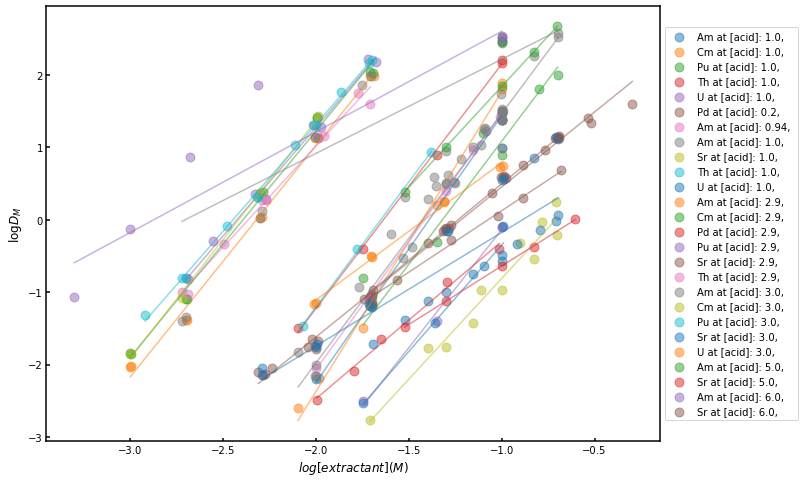

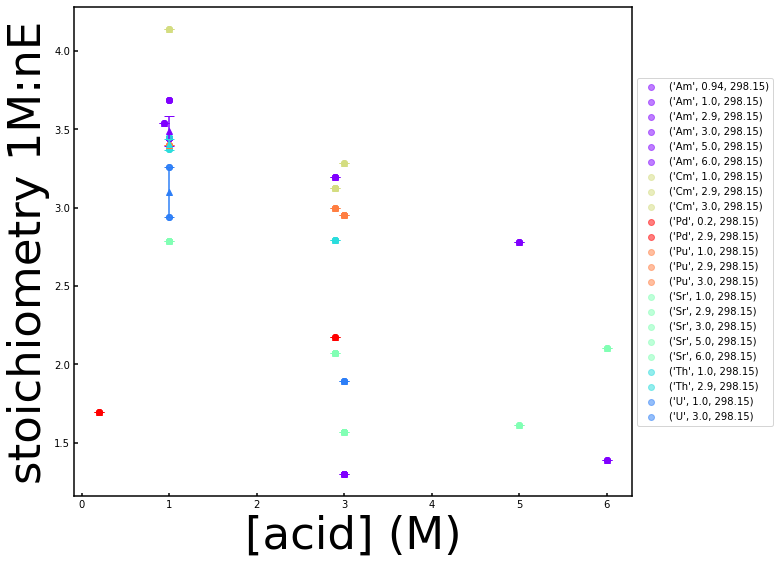

Listplot  {'TODGA'}


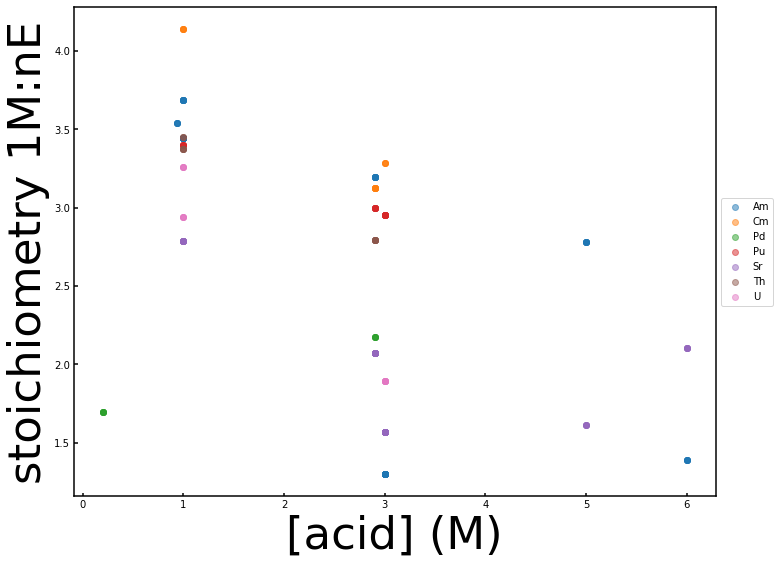

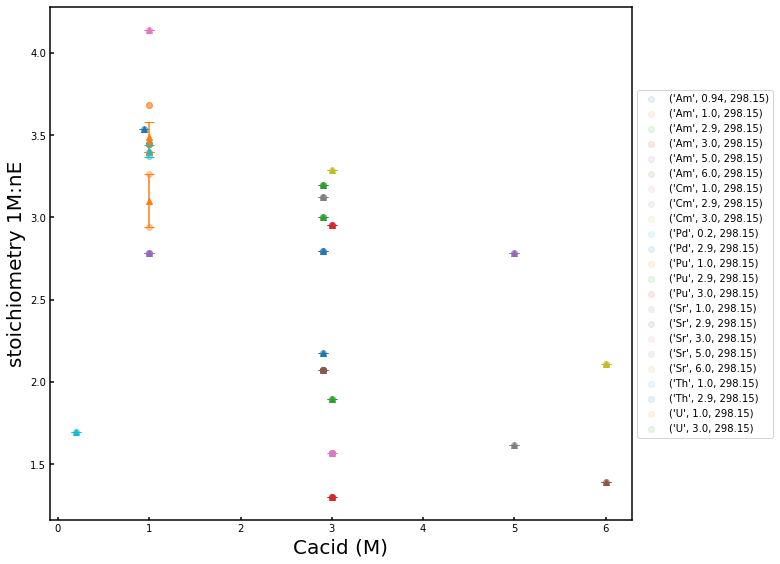

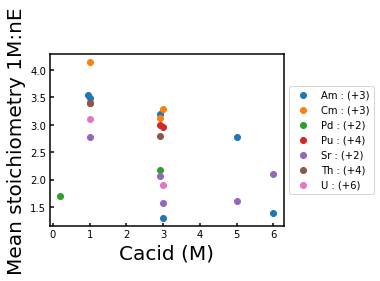

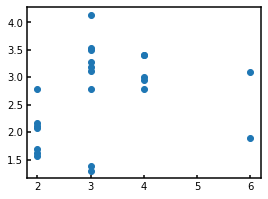

TPDGA
mTDDGA


In [21]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import re
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model

''' here im doing log fitting'''

#
#
#       This is for the  sharma method, where HNO3 varies and Cextractant is fixed
#
#

#df1 is defined in block vefore

#plt.xlabel('log [Extractant] (M)')
#plt.ylabel('log D(ion)')
#plt.scatter(x=df1['logAcid'], y=df1['logDion'] )

# Dictionary of lanthanides, actinides, Fe, and Y with their most stable oxidation states
oxidation_states = {
    # Lanthanides
    'La': +3, 'Ce': +3, 'Pr': +3, 'Nd': +3, 'Pm': +3, 'Sm': +3,
    'Eu': +3, 'Gd': +3, 'Tb': +3, 'Dy': +3, 'Ho': +3, 'Er': +3,
    'Tm': +3, 'Yb': +3, 'Lu': +3,

    # Actinides
    'Ac': +3, 'Th': +4, 'Pa': +5, 'U': +6, 'Np': +5, 'Pu': +4,
    'Am': +3, 'Cm': +3, 'Bk': +3, 'Cf': +3, 'Es': +3, 'Fm': +3,
    'Md': +2, 'No': +2, 'Lr': +3,

    # Additional elements
    'Ba': +2,'Ca': +2,'Sr':+2,'Pb':+2, 'Pd': +2,'Cd':+2,
    'Fe': +3,  # Iron commonly exhibits +3, though +2 is also stable
    'Y': +3,    # Yttrium, as in the lanthanides, commonly has +3
    'Sc': +3,'Bi': +3, 'In':+3,
    'Zr': +4, 'Hf':+4,  #oxidation state for hafnium (Hf) is +4
    'Tc': +7 #or +4
    
}

# Define the custom function to remove oxidation state
def remove_oxidation_state(ion_name):
    # Ensure the input is a string
    if isinstance(ion_name, str):
        # Regular expression to match and capture the base element name
        match = re.match(r'(\w+)\((?:[IVXLCDM]+|[-+]?[1-9])\)', ion_name)
        if match:
            return match.group(1)
    return ion_name  # Return as-is if no match or not a string


df1 = df.copy()
df1['IonName'] = df1['IonName'].apply(remove_oxidation_state)


dfred2all = df1.loc[(~df1['ExtractantName'].isin(['aTODGA','kTEHDGA']))
               # & (df1['ExtractantName'].isin(['aTODGA','DMDOHEMA']))
               # & (df1['has PM?'] == 0) 
               #& (df1['Cextractant (M)'] == 0.2)
               # & (df1['Cacid (M)'] >0.7)
               # & (df1['Cacid (M)'] <1.1)
                
       #         & (df1['IonName'].isin(['Am','Am(III)','Eua','Eu(III)a']))
       #         & (df1['IonName'].isin(['Am','Eu','Sr']))
                & (df1['IonName'].isin(['Cm','Pd','Pu','Th', 'U', 'Am','Eau','Sr']))
       #         & (df1['IonName'].isin(['Ba','Ca','Bi','La','Nd','Sc','Y','Lu','Zr']))

                #& ( df1['Third phase'] != 1)
                & ( df1['SolventName'].isin( ['ndodecane','n-Dodecane','n-dodecane']))
               #  & ( df1['SolventName'] == 'DIPB')

       #          & ( df1['SolventName'] == '1,4-diisopropylbenzene')
       #         & ( df1['AcidName'] == 'HNO3')
                & (df1['Temp (K)'].isin([298.15,298.5]) )
                # & (df1['ref citation'] == 'suzuki2004')
       #         & (df1['Cacid (M)'] == 3)
               ].copy()

dfred2all['coef'] = None
print(len(df1.index))
print(len(dfred2all.index))

plotList = []
validList = ['TODGA']
validlistUtah = ['DOHyA', 'TDDGA', 'DEHiBA', 'DMDOHEMA', 'TOA', 'DEHAA', 'DEHPRA',
                 'DEHBA', 'MIDOA', 'TEHDGA', 'HDEHDGA', 'D3DODGA', 'TDGA', 'DHOA',
                 'THDGA', 'Me2-TODGA', 'DHEHHA', 'DEHPVA','TODGA']
validListDGAthomas =  ['DHmorDGA', 'TDdDGA', 'HOAmBenDGA', 'DHD2DGA', 'DHpyrDGA', 
            'DMDODGA', 'DHpipDGA', 'L1e', 'DOpyrDGA', 'LL3', 'DOmorDGA', 'HOOxyBenDGA',
             'mTDDGA', 'TBEE-BisDGA', 'DBD1MHDGA', 'DOpipDGA', 'TBDGA', 'LL9', 'TODGA', 'HOEtBenDGA']

validListMalonamidelogan = [ 'MBDA', 'DEDoDA', 'D2EHiBA', 'DEHAA', 'MBHA', 'DHDA', 'D2EHBA', 'DBPVA', 'DEHiBA',
'D2EHOA', 'DB2EHA', 'DEHPRA', 'DHOA', 'DHEHHA', 'DEHPVA', 'MODA', 'DHHA', 'DEHBA', 'MBOA', 'DH2EHA',
'DBcHA', 'DBBA', 'MDDA', 'MOOA', 'MODoDA', 'MDDoDA', 'MDOA', 'D2EHAA', 'D2EHPA', 'D2EHPVA']


for gg, dfred2 in dfred2all.groupby(dfred2all['ExtractantName']):

    print(gg)
    #WITH PHASE MODIFIER
    #NO IONS
    if gg in validList:#DGAthomas:

        fig, axii = plt.subplots()

        bins = [0,0.5,0.75,1.73,2,2.25,2.5,2.75,3,3.8,4.1,6]
        bins = [0.7]
        #bins = [0,0.08,0.1,0.46,1.73,2,3,3.8,4.1,6]
        k = -1
        k2 =0


        stoich = []
        acid = []
        cumulated = 0

        #,dfred['PmName'],dfred['Cpm (M)'], ,dfred['Cion (M)'] dfred['Cextractant (M)'],
        for g,d in dfred2.sort_values(by=['IonName','logExtractant','Cacid (M)']).groupby([ dfred2['Temp (K)'], dfred2['ExtractantName'],
                                                            dfred2['SolventName'],
                                                              dfred2['AcidName'], 
                                                            dfred2['Cacid (M)'],dfred2['IonName'],
                                                            #dfred2['Cion (M)'],
                                                            #dfred2['ref citation']
                                                                                ]):
            
        #for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['ref citation'], df['Cextractant (M)'],df['afterCMC calc']]):


            #print('d is', d)
            k += 1



            #if (d['Temp (K)'].iloc[0] > 294.15): #and (d['Cextractant (M)'].iloc[0] == 2.24):
            if (k <10000) and (k>-10):
            #if g[1] =='TODGA':# 'geist2020':'yuan2018 yaita2004 wyatt2022 ravi2016 guoxin2010 cui2011 dongdongXu2018 xiujingpeng2017 zhipengwang2017
            #if g[-1] == 'geist2020':
            #if k2<20000:
               # print('k =',k)

                #printing
                #print('G is', g)

                #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
                #print('')

                #do some fitting with the data
                #x1=d['logAcid'].values
                ##x = d['logAcid'].values.reshape(-1,1)
                y = d['logDion'].values

                #y = d['D(ion)'].values


                #x1=d['Cextractant (M)'].values
                #x = d['Cextractant (M)'].values.reshape(-1,1)
                #x1=d['logExtractant'].values
                #x = d['logExtractant'].values.reshape(-1,1)
                x1=d['logExtractant'].values
                x = d['logExtractant'].values.reshape(-1,1)

                #y = d['D(ion)'].values

                temperature = g[0]


                if(len(x)>2): #this prints the dots
                    cumulated = cumulated +  len(d.index)
                    plotList.append(d['ExtractantName'].iloc[0])
                    #print(len(y))

                    #print('G is', g)
                    #print(d.index)
                    #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
                    #print('')
                    #ion_color = color_map[g[5]]  # Get color based on the first element (IonName) in group key `g`


                    try:                      
                        ransac = linear_model.RANSACRegressor()
                        ransac.fit(x,y)

                        #print('ransac succeful:',ransac.estimator_.coef_)
                        #inlier_mask = ransac.inlier_mask_
                        #outlier_mask = np.logical_not(inlier_mask)
                        #y_ransac = ransac.predict(x)

                        # Compare estimated coefficients
                        #print("Estimated coefficients (true, linear regression, RANSAC):")
                        #print(ransac.estimator_.coef_, ransac.estimator_.intercept_)

                        ##model = LinearRegression().fit(x,y)
                        ##stoich, dkh = fitError(x,y)
                        #print(g,' coef:',model.coef_, '  intercept:', model.intercept_, ' +/-', dstoich)

                        #if model.coef_ != 0 :
                        if ransac.estimator_.coef_ != 0 :
                            # Create scatter plot and capture the color
                            #scatter = axii.scatter(x1, y, label=f"{g} n:{model.coef_[0]:.2f}", marker='o', s=80, alpha=0.5)
                            scatter = axii.scatter(x1, y, label=f"{g[5]} at [acid]: {g[4]}, ",  #n:{ransac.estimator_.coef_[0]:.2f}", marker='o',
                                                   s=80, alpha=0.5)#, c=ion_color)


                            # Get the color used in scatter plot
                            scatter_color = scatter.get_edgecolor()[0]  # If you use a single colo


                            #plt.plot(x, model.predict(x), alpha=0.5 , c=scatter_color )
                            plt.plot(x, ransac.predict(x), alpha=0.5 , c=scatter_color )


                            #axii.plot(x1,y,label=f"Acid:{g}", alpha=1, c='black')
                            dfred2.loc[d.index, 'coef'] = ransac.estimator_.coef_[0] #model.coef_[0]  # Assigning the first coefficient if multiple
                            stoich.append(ransac.estimator_.coef_[0])
                            #stoich.append(model.coef_)
                            acid.append(g[4])
                    except:
                        _ = 0
                        #print('could not fitt a line')
                else:
                    continue


        print('number of points ploted:',cumulated)
        print('number of usefull fittings: ',k2)
        axii.set_xlabel(r'$log[extractant] (M)$')
        axii.set_ylabel(r'log$D_M$')
        #axii.set_title(f'{gg}')
        #axii.set_ylim(-1,20)
        #axii.set_ylim(0,50)
        #plt.xlim(-1,1)
        #fig.set_size_inches(9.0, 8.0, forward=True)
        #axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
        #plt.show()

        axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')

        #axii.legend().set_visible(False)
        fig.set_size_inches(11.0, 8.0, forward=True)
        #fig.tight_layout()
        plt.show()
        #name = gg+'logDlogExtractantCmPdPuThU'#'logdDMDOHEMAA065'
        #fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)



        #fig, axii = plt.subplots()
        #axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

        dfcoef = dfred2.loc[ ( dfred2['coef'] > 0)  &  ( dfred2['coef'] < 70)  & (dfred2['ExtractantName'] != 'aTODGA') & (dfred2['IonName'] != 'aNd')].copy()

        # Create a color map based on unique IonNames
        unique_ions = dfcoef['IonName'].unique()
        colors = cm.rainbow(np.linspace(0, 1, len(unique_ions)))
        color_map = dict(zip(unique_ions, colors))

        fig, axii = plt.subplots()

        # Group and plot data
        for g, d in dfcoef.sort_values(by=['Cacid (M)']).groupby(['IonName', 'Cacid (M)', 'Temp (K)']):

            if len(d) > 2:
                coefMean = np.mean(d['coef'].values)
                coefSpread = np.std(d['coef'].values)
                ion_color = color_map[g[0]]  # Get color based on the first element (IonName) in group key `g`

                # Plot with error bars
                axii.errorbar(d['Cacid (M)'].iloc[0], coefMean, coefSpread, marker='^', capsize=5, color=ion_color)

                # Scatter plot with color based on IonName
                axii.scatter(d['Cacid (M)'], d['coef'], label=f'{g}', alpha=0.5, color=ion_color)

                # Fit and plot linear regression model
                x = d['Cacid (M)'].values.reshape(-1,1)
                y = d['coef'].values
                model = LinearRegression().fit(x, y)
                axii.plot(x, model.predict(x), alpha=0.5, color=ion_color)
                #print(model.coef_, ' and ',model.intercept_)

        # Labels, legend, and layout
        axii.set_xlabel(r'[acid] (M)', size=45)
        axii.set_ylabel(r'stoichiometry 1M:nE', size=45)
        axii.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
        fig.set_size_inches(11.0, 8.0, forward=True)
        fig.tight_layout()
        plt.show()
        #name = gg+'stoichlogDlogExtractant'#'stoichDMDOHEMAA0.65'
        #fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)

        #plt.hist(stoich, bins=1, edgecolor='black')
        print('Listplot ',set(plotList))
        
        fig, axii = plt.subplots()

        # Group and plot data
        for g, d in dfcoef.sort_values(by=['Cacid (M)']).groupby(['IonName', 'Temp (K)']):

            if len(d) > 2:
                # Scatter plot with color based on IonName
                axii.scatter(d['Cacid (M)'], d['coef'], label=f'{g[0]}', alpha=0.5)

                # Fit and plot linear regression model
                x = d['Cacid (M)'].values.reshape(-1,1)
                y = d['coef'].values
                
              # calculateCAC2linesCluster(d[['Cacid (M)','coef']].drop_duplicates().copy(),'noname',2.45,2.45)

        # Labels, legend, and layout
        axii.set_xlabel(r'[acid] (M)', size=45)
        axii.set_ylabel(r'stoichiometry 1M:nE', size=45)
        axii.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
        fig.set_size_inches(11.0, 8.0, forward=True)
        fig.tight_layout()
        plt.show()
        name = gg+'stoichlogDlogExtractantTODGAAll'#'stoichDMDOHEMAA0.65'
        fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)


        acidMeanList = []
        coefMeanList = []
        ionNameList = []
        oxidationList = []
        refList = []
        
        dfcoef = dfred2.loc[ ( dfred2['coef'] > 0)  & (dfred2['ExtractantName'] != 'aTODGA') & (dfred2['IonName'] != 'aNd')].copy()
        fig, axii = plt.subplots()
        for g,d in dfcoef.sort_values(by=['Cacid (M)']).groupby(['IonName','Cacid (M)','Temp (K)']):

            if len(g)>-2:
                #axii.plot(dfcoef.sort_values(by=['Cacid (M)'])['Cacid (M)'], dfcoef.sort_values(by=['Cacid (M)'])['coef'])


                coefMean = np.mean(d['coef'].values)
                coefSpread = np.std(d['coef'].values)
                
                refList.append(d['ref citation'].iloc[0])
                ionNameList.append(d['IonName'].iloc[0])
                oxidationList.append(oxidation_states[d['IonName'].iloc[0]])
                coefMeanList.append(coefMean)
                acidMeanList.append(d['Cacid (M)'].iloc[0])

                axii.errorbar(d['Cacid (M)'].iloc[0], coefMean, coefSpread, marker='^', capsize=5)

                axii.scatter(d['Cacid (M)'], d['coef'], label=f'{g}', alpha=0.1) 
                #axii.plot(d['Cacid (M)'], d['coef'], alpha=0.2, c='black', label=f"{g}") 

                x = d['Cacid (M)'].values.reshape(-1,1)
                y = d['coef'].values
                model = LinearRegression().fit(x,y)
                #print(d[['Cacid (M)','coef','SolventName','IonName', 'Cion (M)', 'ref citation']])

                #plt.plot(x, model.predict(x), alpha=0.5  )

                      #,c = dfcoef['Cextractant (M)'], label=f"{dfcoef['ExtractantName']} {dfcoef['Cextractant (M)']}"
                #calculateCAC2linesCluster(d[['Cacid (M)','coef']].drop_duplicates().copy(),'noname',2.5,2.5)
                #calculateCAC2lines2(d[['Cacid (M)','coef']].drop_duplicates().copy(),'noname')
        axii.set_xlabel(r'Cacid (M)', size=20)
        axii.set_ylabel(r'stoichiometry 1M:nE', size=20)
        #axii.set_ylim(2.65,3.85)
        axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize=10)
        fig.set_size_inches(11.0, 8.0, forward=True)
        fig.tight_layout()
        plt.show()
        #name = 'stoichlogDlogTODGA'#'stoichDMDOHEMAA0.65'
        #fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)

        
        # Create DataFrame from the mean values
        mean_df = pd.DataFrame({
            'IonName': ionNameList,
            'Cacid (M)': acidMeanList,
            'coefMean': coefMeanList,
            'ref citation': refList,
            'Oxidation': oxidationList
        })
        
        fig, axii = plt.subplots()
        for g,d in mean_df.groupby(['IonName']):
            
            axii.scatter(d['Cacid (M)'],d['coefMean'], label=f"{g} : (+{oxidation_states[g]})", marker='o')
            #calculateCAC2lines(dfcoef[['Cacid (M)','coef', 'coef']].sort_values(by=['Cacid (M)']),g[0]
        axii.set_xlabel(r'Cacid (M)', size=20)
        axii.set_ylabel(r'Mean stoichiometry 1M:nE', size=20)
        axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize=10)

        plt.show()
        #name = 'stoichlogDlogTODGACmPdPuThU'#'stoichDMDOHEMAA0.65'
        #fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)
        
        fig, axii = plt.subplots()
        axii.scatter(mean_df.sort_values(by=['Oxidation'])['Oxidation'],mean_df.sort_values(by=['Oxidation'])['coefMean'])

        plt.show()


In [ ]:
''' individual ions'''


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Get the unique IonNames for individual plotting
unique_ions = dfcoef['IonName'].unique()

# Loop through each IonName and create a separate plot
for ion in unique_ions:
    # Filter data for the specific IonName
    df_ion = dfcoef[dfcoef['IonName'] == ion]

    # Create a new figure and axis for each IonName
    fig, axii = plt.subplots()

    # Group data by 'Cacid (M)' and 'Temp (K)'
    for g, d in df_ion.sort_values(by=['Cacid (M)']).groupby(['Temp (K)']):
        
        if len(d) > 2:
            # Calculate mean and standard deviation for coef
            coefMean = np.mean(d['coef'].values)
            coefSpread = np.std(d['coef'].values)

            # Plot the error bars and scatter points
            axii.errorbar(d['Cacid (M)'].iloc[0], coefMean, coefSpread, marker='^', capsize=5)
            axii.scatter(d['Cacid (M)'], d['coef'], alpha=0.5, label={g})

            # Fit and plot a linear regression model for the data
            x = d['Cacid (M)'].values.reshape(-1,1)
            y = d['coef'].values
            model = LinearRegression().fit(x, y)
            axii.plot(x, model.predict(x), alpha=0.5, color='black')

    # Set labels, title, and layout
    axii.set_xlabel(r'Cacid (M)', size=20)
    axii.set_ylabel(r'stoichiometry 1M:nE', size=20)
    axii.set_title(f'Ion: {ion}', size=18)
    axii.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

    fig.set_size_inches(11.0, 8.0, forward=True)
    fig.tight_layout()

    # Show each plot
    plt.show()


In [ ]:
#dfred2all[['Temp (K)','ExtractantName','Cextractant (M)','SolventName','AcidName','Cacid (M)','IonName']]
#dfred2all['Cextractant (M)'].unique()



In [ ]:
dfred2['ref citation'].unique()plotList

# This is for fixed [extractant] and varied [acid]

In [ ]:
'''
This will fit lines throught the D values plots vs Extractants

What does the intersection means? critical ratio of

'''


print(len(df),' records on df')
df1 = df.loc[ #(df['ExtractantName'] == 'TODGA') & # (df['AcidName'] == 'HNO3') &# (df['Cextractant (M)'] < 2) &
              #(df['ExtractantName'] == 'TEHDGA') &
              #(df['Cextractant (M)'] > 0.1) &
             # (df['ExtractantName'] == 'TODGA') &
              #(df['ExtractantName'] == 'TBP') &
              (df['Cacid (M)'] < 80) & (df['has ions?'] ==1) & (df['has PM?'] ==0)
              #& (df['SolventName'] == 'ndodecane')
              & (df['D(ion)']>0) & (df['D(ion)'] < 7000)
              #& (df['location2'] == 'Extraction of different actinides in the presence of 97 g/L of U(VI) in the aqueous phase')
              #& (df['logExtractant_AcidOrg'].isna()== False)
              & (df['Third phase'] != 1)            #care here, NaN thirdphase will be skipped  !!!!!
              #& (df['ref citation'] == 'yaita2004') #to
              #& (df['ref citation'] == 'deepika2010')
              #& (df['ref citation'] == 'campbell2017') #teh
              #& (df['ref citation'] == 'hall2021') #teh
              #& (df['ref citation'] == 'hanson2007')
].copy()

print(len(df1), 'records in df1')

fig, axii = plt.subplots()
#df2 = df1[df1['Cextractant (M)'] < 0.1]
axii.set_xlabel('[acid]')
axii.set_ylabel('D ion')
axii.scatter(x=df1['Cacid (M)'], y=df1['D(ion)'] )
plt.show()

#WITH PHASE MODIFIER
#NO IONS
fig, axii = plt.subplots()

bins = [0,0.5,0.75,1.73,2,2.25,2.5,2.75,3,3.8,4.1,6]
#bins = [0,0.08,0.1,0.46,1.73,2,3,3.8,4.1,6]
k = -1
k2 = 0

#for g,d in df1.sort_values(by='SolventName').groupby([pd.cut(df['Cacid (M)'], bins=bins)]):pd.cut(df['Cacid (M)'], bins=bins)
#for g,d in df1.sort_values(by='SolventName').groupby([df['Cacid (M)'], df['ref citation']]):

#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['Cacid (M)']]):
#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([ df['ref citation'], df['Temp (K)'], df['Cacid (M)'],df['ExtractantName'], df['SolventName']]):

#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([  df['Temp (K)'], df['Cacid (M)']]):
#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([  df['Temp (K)'], pd.cut(df['Cacid (M)'], bins=bins)]):
#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([ df['Temp (K)'], df['Cacid (M)'],df['ExtractantName'], df['SolventName'],df['afterCMC calc']]):
#for g,d in df1.sort_values(by='logExtractant_AcidOrg').groupby([ df['Temp (K)'], df['Cacid (M)'],df['ExtractantName'], df['SolventName']]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['ref citation'], df['Cextractant (M)']]):


#this is functional one, care with Cion
#for g,d in df1.sort_values(by='Cextractant (M)').groupby([ df['Temp (K)'], df['ExtractantName'], 
#                                                       df['SolventName'], df['Cacid (M)'],
#                                                       df['IonName'], df['Cion (M)']
#                                                          ,df['ref citation']]):


for g,d in df1.sort_values(by='Cacid (M)').groupby([ df['Temp (K)'], df['ExtractantName'], df['Cextractant (M)'],
                                                       df['SolventName'], df['AcidName'],
                                                       df['IonName']#, df['Cion (M)']
                                                       ,df['ref citation']]
                                                        ):
    k += 1
    if k < 231230 :# (k <2) and (k>0):

        #print('\nG is', g)
        #print(d.index.values)
        #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
        #print('')

        #do some fitting with the data
        x = d['Cacid (M)'].values.reshape(-1,1)
        y = d['D(ion)'].values
        temperature = g[0]

        #print(x)
        #print(y)
        #print('temp:',temperature)

        if(len(x)>1):
            axii.plot(d['Cacid (M)'],d['D(ion)'], label=f"Acid:{g} len:{len(x)}", marker='o')

            #d.plot(y='D(ion)',x='Cextractant (M)', kind='line',label=f"Acid:{g} len:{len(x)}",
            #   ax=axii,
            #  title=' has PM? =0, has ions? =0 sorted by Cacid (M)', marker='o'
            #   #,legend = None
            #   ).set_ylabel('logAcidOrg_aq')




            model = LinearRegression().fit(x,y)
            dstoich,dkh = fitError(x,y)
            #polyfit = a[x]x**[deg]+....+adeg
            #a, er , _, _, _= np.polyfit(x,y,1,full=True)

            #calculates the coeficients
            #kh = np.power(10,model.coef_)
            #stoichNHto1E = 1/model.coef_
            #DeltaG = - 8.3145*temperature*np.log(kh)/100
            #DeltaGerror = 8.3145*temperature*np.abs(1/kh)*dkh/100

            #print('line fitting')
            #print('coef:', model.coef_, ' and :',model.intercept_ )
            #print(' The values Kh:', kh ,'+/-',dkh,' intercept:', model.intercept_ )
            #print('Delta G: - RT ln Kh = ', DeltaG,'+/-', DeltaGerror, ' kJ/mol')
            #print('\n')

            #sanity check, only the ones that have proper amount of points -> good stoichiometry
            #caution this is model dependent
            #if ((stoichNHto1E) > 0.4) and ((stoichNHto1E) < 2.9):
            #    print(g)
            #    k2 += 1
                #df1.loc[d.index,'Kh'] = np.ones(len(d.index))*kh
                #df1.loc[d.index,'Kh error'] = np.ones(len(d.index))*dkh
                #df1.loc[d.index, 'stoichiometry 1E:nHNO3'] = np.ones(len(d.index))*stoichNHto1E
                #df1.loc[d.index, 'stoichiometry 1E:nHNO3 error'] = np.ones(len(d.index))*(np.abs(stoichNHto1E)*np.log(10)*dstoich)
                #df1.loc[d.index,'DeltaG (kJ/mol)'] = np.ones(len(d.index))*DeltaG
                #df1.loc[d.index,'DeltaG error (kJ/mol)'] = np.ones(len(d.index))*DeltaGerror

            #plt.plot(x, model.predict(x), c=(0.1,k/200,0.5))

    #else: print(k,' too big') #print(d.shape[0],' too small')
print('Number of usefull fittings: ', k2)
axii.set_title(' has PM? =0, has ions? =0 sorted by Cacid (M)', fontsize='20')
axii.set_xlabel('[acid]', fontsize=35)
axii.set_ylabel('D(ion)', fontsize=35)
axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
plt.show()

#fig, axii = plt.subplots()
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

In [ ]:

''' here im doing log fitting'''
#
#
#       This is for the  sharma method, where HNO3 varies and Cextractant is fixed
#
#

#df1 is defined in block vefore

#plt.xlabel('log [Extractant] (M)')
#plt.ylabel('log D(ion)')
#plt.scatter(x=df1['logAcid'], y=df1['logDion'] )

dfred = df1.loc[(df1['ExtractantName'].isin(['TODGA', 'TEHDGAa','TBPa'])) 
               # & (df1['has PM?'] == 0) 
               # & (df1['Cextractant (M)'].isin([0.1,0.2]))
               # & (df1['Cacid (M)'] <1.1)
               # & (df1['IonName'].isin(['Am','Am(III)']))
                #& ( df1['Third phase'] != 1)
              #  & (df1['SolventName'].isin( ['ndodecane','n-Dodecane','n-dodecane']))
                & ( df1['SolventName'] != 'hydrogenated tetrapropene/1-octanol, 5%')
                & ( df1['AcidName'] == 'HNO3')
               # & ( df1['logAcidOrgAcid'].isna() == True)
               ].copy()


print(len(df1.index))
print(len(dfred.index))

#WITH PHASE MODIFIER
#NO IONS
fig, axii = plt.subplots()

bins = [0,0.5,0.75,1.73,2,2.25,2.5,2.75,3,3.8,4.1,6]
bins = [0.7]
#bins = [0,0.08,0.1,0.46,1.73,2,3,3.8,4.1,6]
k = -1
k2 =0


stoich = []
acid = []
cumulated = 0

#,dfred['PmName'],dfred['Cpm (M)'], ,dfred['Cion (M)'] dfred['Cextractant (M)'],
for g,d in dfred.sort_values(by=['logAcid','Cacid (M)']).groupby([ dfred['Temp (K)'], dfred['ExtractantName'],
                                                                  dfred['Cextractant (M)'],
                                                    dfred['SolventName'],
                                                      dfred['AcidName'], 
                                                    dfred['IonName'],
                                                    #dfred['Cion (M)'],
                                                    dfred['ref citation']
                                                                 ]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['ref citation'], df['Cextractant (M)'],df['afterCMC calc']]):



    k += 1

    
    
    #if (d['Temp (K)'].iloc[0] > 294.15): #and (d['Cextractant (M)'].iloc[0] == 2.24):
    if (k <60000) and (k>-10):
    #if g[1] =='TODGA':# 'geist2020':'yuan2018 yaita2004 wyatt2022 ravi2016 guoxin2010 cui2011 dongdongXu2018 xiujingpeng2017 zhipengwang2017
    #if g[-1] == 'geist2020':
    #if k2<20000:
       # print('k =',k)

        #printing
        #print('G is', g)
        
        #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
        #print('')
        
        #do some fitting with the data
        y = d['logDion'].values
        
        #y = d['D(ion)'].values
                
        
        xvariable = '(NO3)-' 
        #xvariable = 'Cacid (M)'
        #xvariable = 'logAcid'#'Cacid (M)' 'logAcid'

        
        x1= d[xvariable].values
        x = d[xvariable].values.reshape(-1,1)
             
   
        temperature = g[0]
        

        if(len(x)>3): #this prints the dots
            cumulated = cumulated +  len(d.index)
            print(len(y))
    
            #axii.axvline(x = 0.74, color = 'blue', alpha=0.015)
            #axii.axvline(x = 1.64, color = 'green', alpha=0.015)


            #print('G is', g)
            #print(d.index)
            #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
            #print('')
            
            
            try:   
                model = LinearRegression().fit(x,y)
                dstoich, dkh = fitError(x,y)
                
                if model.coef_ > 0:
                    # Create scatter plot and capture the color
                    scatter = axii.scatter(x1, y, label=f"{g}{len(d)}", marker='o', s=80, alpha=0.8)

                    # Get the color used in scatter plot
                    scatter_color = scatter.get_edgecolor()[0]  # If you use a single colo


                    print(g,' coef:',model.coef_, '  intercept:', model.intercept_, ' +/-', dstoich)
                    #plt.plot(x, model.predict(x), alpha=0.5 , c=scatter_color )

                    axii.plot(x1,y,label=f"Acid:{g}", alpha=0.2, c='black')
                    
                    #calculateCAC2lines2(d[['logDion','Cacid (M)', 'Cacid (M)']].sort_values(by=['acid']),g[0])



                    stoich.append(model.coef_)
                    acid.append(g[2])
            except:
                _ = 0
                #print('could not fitt a line')


print('number of points ploted:',cumulated)
print('number of usefull fittings: ',k2)
axii.set_xlabel(r'$'+xvariable+'(M)$')
axii.set_ylabel(r'log$D_M$')
#axii.set_ylim(-1,20)
#axii.set_ylim(0,50)
#plt.xlim(-1,1)
#fig.set_size_inches(9.0, 8.0, forward=True)
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
#plt.show()

axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='14')
fig.set_size_inches(13.0, 8.0, forward=True)
#fig.tight_layout()
plt.show()

#fig, axii = plt.subplots()
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

fig, axii = plt.subplots()
axii.scatter(acid, stoich)

# Create a DataFrame
dacidn = pd.DataFrame({'acid': acid, 'n': stoich})
dacidn = dacidn.astype({'acid': 'float', 'n': 'float'})

#calculateCAC2lines(dacidn[['acid','n', 'n']].sort_values(by=['acid']),g[0])
axii.set_xlabel(r'acid')
axii.set_ylabel(r'stoich')
plt.show()

#plt.hist(stoich, bins=5, edgecolor='black')


In [ ]:
fig, axii = plt.subplots()
axii.scatter(df1['Cacid (M)'],df1['(NO3)-'] / df1['Cacid (M)']) # df1['(NO3)-'])
#axii.set_xlim(0, 6)
#axii.set_ylim(0, 6)
# Create a DataFrame
#dacidn = pd.DataFrame({'acid': acid, 'n': stoich})
#dacidn = dacidn.astype({'acid': 'float', 'n': 'float'})

#calculateCAC2lines(dacidn[['acid','n', 'n']].sort_values(by=['acid']),g[0])
axii.set_xlabel(r'acid')
axii.set_ylabel(r'(NO3)-')
plt.show()


In [ ]:
dfred['ref citation'].unique()

In [ ]:
#df.loc[df['ExtractantName'] == 'DEHDODGA'][['ExtractantName','Cextractant (M)','AcidName','Cacid (M)','SolventName','Temp (K)','ref citation','logAcidOrg_aq','logExtractant_AcidOrg']]

In [ ]:

''' here im doing log fitting'''
#
#
#       This is for the  sharma method, where HNO3 varies and Cextractant is fixed
#
#

#df1 is defined in block vefore

#plt.xlabel('log [Extractant] (M)')
#plt.ylabel('log D(ion)')
#plt.scatter(x=df1['logAcid'], y=df1['logDion'] )

dfred = df1.loc[(df1['ExtractantName'] == 'TODGA') 
                & (df1['has PM?'] == 1) 
              # & (df1['Cextractant (M)'] == 0.2)
              #  & (df1['D(ion)'] < 300)
                
                #& (~df1['ref citation'].isin(['sasaki2015'])) for todga 0.1
                #& (df1['ref citation'] == 'wyatt2022')
                #& (df1['PmName'] == '1octanol')
                #& (df1['Cpm (M)'] != 0.1)
               ].copy()

#fig, axii = plt.subplots()
#plt.xlabel('Cacid (M)')
#plt.ylabel('Dion')
#plt.scatter(x=df1['Cacid (M)'], y=df1['D(ion)'] )
#plt.show()

print(len(df1.index))
#WITH PHASE MODIFIER
#NO IONS
fig, axii = plt.subplots()

bins = [0,0.5,0.75,1.73,2,2.25,2.5,2.75,3,3.8,4.1,6]
bins = [0.7]
#bins = [0,0.08,0.1,0.46,1.73,2,3,3.8,4.1,6]
k = -1
k2 =0


# Define your color mapping
ion_colors = {
    'Nd': 'tab:blue',
    'Am': 'tab:green',
    'Eu': 'tab:orange',
    'Fe': 'tab:red',
    'U': 'tab:purple',
    'Nd(III)': 'tab:blue',
    'Am(III)': 'tab:green',
    'Eu(III)': 'tab:orange',
    'Pu(III)': 'tab:red',
    'U(IV)': 'tab:purple',
    # Add more ions and colors as needed
}

#,dfred['PmName'],dfred['Cpm (M)'], ,dfred['Cion (M)']
for g,d in dfred.sort_values(by='Cacid (M)').groupby([ dfred['Temp (K)'], dfred['ExtractantName'], dfred['Cextractant (M)'], 
                                                      dfred['SolventName'],
                                                      dfred['AcidName'],dfred['IonName'],dfred['PmName'],dfred['Cpm (M)'], dfred['ref citation']]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['ref citation'], df['Cextractant (M)'],df['afterCMC calc']]):
#for g,d in dfred.sort_values(by='Cacid (M)').groupby([ dfred['Temp (K)'], dfred['ExtractantName'], dfred['Cextractant (M)']
#                                                     ,dfred['IonName']]):


    k += 1

    if (k <10000) and (k>-10):

        #do some fitting with the data
        #x1=d['logAcid'].values
        ##x = d['logAcid'].values.reshape(-1,1)
        y = d['logDion'].values
        
        y = d['D(ion)'].values
        
        
        x1=d['Cacid (M)'].values
        x = d['Cacid (M)'].values.reshape(-1,1)
        

        #y = d['D(ion)'].values

        
        
        temperature = g[0]
        colorion = ion_colors.get(g[5], 'black')

        if(len(x1)>1): #this prints the dots

            
            axii.plot(x1,y, alpha=0.05, c='black')
            axii.scatter(x1,y, marker='o',label=f"{g}{g[5]}",  s=100)#, #color=colorion)
            #axii.axvline(x = 0.74, color = 'blue', alpha=0.015)
            #axii.axvline(x = 2.00, color = 'green', alpha=0.05)


          

print('number of usefull fittings: ',k2)
axii.set_xlabel('[acid] (M)')
axii.set_ylabel(r'$D_M$')
#axii.set_ylim(0,200)
#axii.set_ylim(0,50)
#plt.xlim(-1,1)
#fig.set_size_inches(9.0, 8.0, forward=True)
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
#plt.show()

axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='12')
#axii.legend().set_visible(False)
fig.set_size_inches(18.0, 8.0, forward=True)
fig.tight_layout()
plt.show()
#name = 'DionTBP'
#fig.savefig('./PDFimages/digitizer/'+name+'.pdf', dpi=300)



In [ ]:
#f2 = df1.loc[df1['ExtractantName'] == 'TODGA']
#plt.scatter(df2['Cextractant (M)'], df2['critAcid'])
#plt.scatter(df1['IonName'], df1['critAcid'])
fig, axii = plt.subplots()

df2 = df1.loc[df1['ExtractantName'].isin(['TODGA','TEHDGA'])] #,'TBDGA'

for g,d in df2.groupby([df2['ExtractantName'],df2['Temp (K)']]):
    #print(g)
    plt.scatter(x=d['Cextractant (M)'], y=d['critAcid'], label=f" Acid:{g}", alpha=0.2)
    #d.plot(x='Cextractant (M)',y='critAcid', kind='line',label=f" Acid:{g}", #alpha=0.1,
    #   ax=axii,
    #  title=' has PM? =0, has ions? =1 sorted by Cextractant (M)', marker='o'
       #,legend = None
    #   )

    plt.plot()

plt.xlabel('CExtractant *')
plt.ylabel('Cacid *')
#plt.xlim(0,10)
axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')

In [ ]:
import seaborn as sns


#allInputs =['Cacid (M)','XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener','ABC Index', 'Temp (K)']
allInputs =['Cacid (M)', 'Temp (K)']
o1 = ['critAcid']#['DeltaG (kJ/mol)']
dfCorr = df1[allInputs+o1]


#sns.pairplot(dfCorr, x_vars=i1+allInputs, y_vars=o1, height=5, aspect=1, kind='scatter')
sns.pairplot(dfCorr,  kind='scatter')
plt.show()
plt.gcf().set_size_inches(10,10)
sns.heatmap(dfCorr.corr(), cmap='YlGnBu', annot = True)
plt.show()   #where is XlogP?

In [ ]:

''' here im doing log fitting'''
#
#
#       This is for the  sharma method, where HNO3 varies and Cextractant is fixed
#
#

#df1 is defined in block vefore

#plt.xlabel('log [Extractant] (M)')
#plt.ylabel('log D(ion)')
#plt.scatter(x=df1['logAcid'], y=df1['logDion'] )


plt.xlabel('Cacid (M)')
plt.ylabel('Dion')
plt.scatter(x=df1['Cacid (M)'], y=df1['D(ion)'] )
plt.show()

print(len(df1.index))
#WITH PHASE MODIFIER
#NO IONS
fig, axii = plt.subplots()

bins = [0,0.5,0.75,1.73,2,2.25,2.5,2.75,3,3.8,4.1,6]
bins = [0.7]
#bins = [0,0.08,0.1,0.46,1.73,2,3,3.8,4.1,6]
k = -1
k2 =0
#for g,d in df1.sort_values(by='SolventName').groupby([pd.cut(df['Cacid (M)'], bins=bins)]):pd.cut(df['Cacid (M)'], bins=bins)
#for g,d in df1.sort_values(by='SolventName').groupby([df['Cacid (M)'], df['ref citation']]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['ref citation'], df['Temp (K)'], df['Cextractant (M)']]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['ref citation'], df['Temp (K)'], df['ExtractantName']]):


for g,d in df1.sort_values(by='Cacid (M)').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['Cextractant (M)'],df['IonName'],df['ref citation']]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['ref citation'], df['Cextractant (M)'],df['afterCMC calc']]):



    k += 1

    
    
    #if (d['Temp (K)'].iloc[0] > 294.15): #and (d['Cextractant (M)'].iloc[0] == 2.24):
    if (k <10000) and (k>-10):
    #if g[1] =='TODGA':# 'geist2020':'yuan2018 yaita2004 wyatt2022 ravi2016 guoxin2010 cui2011 dongdongXu2018 xiujingpeng2017 zhipengwang2017
    #if g[-1] == 'geist2020':
    #if k2<20000:
       # print('k =',k)

        #printing
        #print('G is', g)
        #print(d.index)
        #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
        #print('')
        
        #do some fitting with the data
        #x1=d['logAcid'].values
        ##x = d['logAcid'].values.reshape(-1,1)
        y = d['logDion'].values
        
        
        x1=d['Cacid (M)'].values
        x = d['Cacid (M)'].values.reshape(-1,1)
        

        #y = d['D(ion)'].values

        
        
        temperature = g[0]
        

        if(len(x1)>2): #this prints the dots
           # d.plot(y='logDion',x='logAcid', kind='line',label=f"Acid:{g}",
           #ax=axii,
          #title=' has PM? =0, has ions? =1 sorted by Cextractant (M)', marker='o'
           #,legend = None
           #).set_ylabel('D(ion)')
            
            axii.plot(x1,y,label=f"Acid:{g}", alpha=0.03, c='black')
            axii.scatter(x1,y, marker='o')


            #print('G is', g)
            #print(d.index)
            #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
            #print('')

            #model = LinearRegression().fit(x,y)
            #dstoich, dkh = fitError(x,y)

            #kh = np.power(10,model.intercept_)
            #stoichNHto1E = 1*model.coef_
            #DeltaG = -8.3145*temperature*np.log(kh)/100
            #DeltaGerror = 8.3145*temperature*np.abs(1/kh)*dkh/100

            print('line fitting')
            print(' coef:',model.coef_, '  intercept:', model.intercept_, ' +/-', dstoich)
            #print(' The values Kh:',kh ,'+/-',dkh,'   from intercept:', model.intercept_ )
            #print('Delta G: - RT ln Kh = ', DeltaG, '+/-', DeltaGerror,' kJ/mol')
            print('\n')

            #if(dstoich<0.001):
            #    k2+= 1


            #sanity check, only the ones that have proper amount of points -> good stoichiometry
            #if (stoichNHto1E > 0.5) and (stoichNHto1E < 2.9):

            #plt.plot(x, model.predict(x), c=(0.1,k/200,0.5)) #d.iloc[d.index]['afterCMC calc']
            #calculateCAC(d,g[0])
            #calculateCACpoly(d[['logAcidOrgAcid','logAcidOrg_aqExtractant']],g[0])
            #calculateCAC2lines(d[['logAcid','logDion','Cion (M)']],g[0])
           # plt.plot()

    #else: print(k,' too big') #print(d.shape[0],' too small')

print('number of usefull fittings: ',k2)
axii.set_xlabel('[acid] (M)')
axii.set_ylabel('log D')
#axii.set_ylim(0,200)
#axii.set_ylim(0,50)
#plt.xlim(-1,1)
#fig.set_size_inches(9.0, 8.0, forward=True)
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
#plt.show()

axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
fig.set_size_inches(13.0, 8.0, forward=True)
#fig.tight_layout()
plt.show()

#fig, axii = plt.subplots()
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

In [ ]:
for c in df1.columns:
    print(c)

In [ ]:

''' here im doing log fitting'''
#
#
#       This is for the  sharma method, where HNO3 varies and Cextractant is fixed
#
#

#df1 is defined in block vefore

#plt.xlabel('log [Extractant] (M)')
#plt.ylabel('log D(ion)')
#plt.scatter(x=df1['logAcid'], y=df1['logDion'] )

dfred = df1.loc[(df1['ExtractantName'] == 'TEHDGA') 
                #& (df1['has PM?'] == 0) 
               #& (df1['Cextractant (M)'] == 0.2)
               ].copy()

fig, axii = plt.subplots()
plt.xlabel('Cacid (M)')
plt.ylabel('Dion')
plt.scatter(x=df1['Cacid (M)'], y=df1['D(ion)'] )
plt.show()

print(len(df1.index))
#WITH PHASE MODIFIER
#NO IONS
fig, axii = plt.subplots()

bins = [0,0.5,0.75,1.73,2,2.25,2.5,2.75,3,3.8,4.1,6]
bins = [0.7]
#bins = [0,0.08,0.1,0.46,1.73,2,3,3.8,4.1,6]
k = -1
k2 =0
#for g,d in df1.sort_values(by='SolventName').groupby([pd.cut(df['Cacid (M)'], bins=bins)]):pd.cut(df['Cacid (M)'], bins=bins)
#for g,d in df1.sort_values(by='SolventName').groupby([df['Cacid (M)'], df['ref citation']]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['ref citation'], df['Temp (K)'], df['Cextractant (M)']]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['ref citation'], df['Temp (K)'], df['ExtractantName']]):

#,dfred['PmName'],dfred['Cpm (M)'], ,dfred['Cion (M)']
for g,d in dfred.sort_values(by='Cacid (M)').groupby([ dfred['Temp (K)'], dfred['ExtractantName'], dfred['Cextractant (M)'], dfred['SolventName'],
                                                      dfred['AcidName'],dfred['IonName'],dfred['ref citation']]):
#for g,d in df1.sort_values(by='logAcidOrgAcid').groupby([ df['Temp (K)'], df['ExtractantName'], df['SolventName'], df['ref citation'], df['Cextractant (M)'],df['afterCMC calc']]):



    k += 1

    
    
    #if (d['Temp (K)'].iloc[0] > 294.15): #and (d['Cextractant (M)'].iloc[0] == 2.24):
    if (k <10000) and (k>-10):
    #if g[1] =='TODGA':# 'geist2020':'yuan2018 yaita2004 wyatt2022 ravi2016 guoxin2010 cui2011 dongdongXu2018 xiujingpeng2017 zhipengwang2017
    #if g[-1] == 'geist2020':
    #if k2<20000:
       # print('k =',k)

        #printing
        #print('G is', g)
        #print(d.index)
        #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
        #print('')
        
        #do some fitting with the data
        #x1=d['logAcid'].values
        ##x = d['logAcid'].values.reshape(-1,1)
        y = d['logDion'].values
        
        y = d['D(ion)'].values
        
        
        x1=d['Cacid (M)'].values
        x = d['Cacid (M)'].values.reshape(-1,1)
        

        #y = d['D(ion)'].values

        
        
        temperature = g[0]
        

        if(len(x1)>1): #this prints the dots
           # d.plot(y='logDion',x='logAcid', kind='line',label=f"Acid:{g}",
           #ax=axii,
          #title=' has PM? =0, has ions? =1 sorted by Cextractant (M)', marker='o'
           #,legend = None
           #).set_ylabel('D(ion)')
            
            axii.plot(x1,y,label=f"Acid:{g}", alpha=0.03, c='black')
            axii.scatter(x1,y, marker='o', s=80)
            #axii.axvline(x = 0.74, color = 'blue', alpha=0.015)
            axii.axvline(x = 1.64, color = 'green', alpha=0.015)


            #print('G is', g)
            #print(d.index)
            #print(d[['ExtractantName', 'Cextractant (M)','AcidName','Cacid (M)','SolventName','ref citation']].values)
            #print('')

            #model = LinearRegression().fit(x,y)
            #dstoich, dkh = fitError(x,y)

            #kh = np.power(10,model.intercept_)
            #stoichNHto1E = 1*model.coef_
            #DeltaG = -8.3145*temperature*np.log(kh)/100
            #DeltaGerror = 8.3145*temperature*np.abs(1/kh)*dkh/100

            #print('line fitting')
            #print(' coef:',model.coef_, '  intercept:', model.intercept_, ' +/-', dstoich)
            #print(' The values Kh:',kh ,'+/-',dkh,'   from intercept:', model.intercept_ )
            #print('Delta G: - RT ln Kh = ', DeltaG, '+/-', DeltaGerror,' kJ/mol')
            #print('\n')

            #if(dstoich<0.001):
            #    k2+= 1


            #sanity check, only the ones that have proper amount of points -> good stoichiometry
            #if (stoichNHto1E > 0.5) and (stoichNHto1E < 2.9):

            #plt.plot(x, model.predict(x), c=(0.1,k/200,0.5)) #d.iloc[d.index]['afterCMC calc']
            #calculateCAC(d,g[0])
            #calculateCACpoly(d[['logAcidOrgAcid','logAcidOrg_aqExtractant']],g[0])
            #calculateCAC2lines(d[['logAcid','logDion','Cion (M)']],g[0])
           # plt.plot()

    #else: print(k,' too big') #print(d.shape[0],' too small')

print('number of usefull fittings: ',k2)
axii.set_xlabel('[acid] (M)')
axii.set_ylabel(r'$D_M$')
#axii.set_ylim(0,200)
#axii.set_ylim(0,50)
#plt.xlim(-1,1)
#fig.set_size_inches(9.0, 8.0, forward=True)
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
#plt.show()

axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
fig.set_size_inches(13.0, 8.0, forward=True)
#fig.tight_layout()
plt.show()

#fig, axii = plt.subplots()
#axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

In [ ]:
ionic_radii_angstroms = {
    "Lanthanides": [
        {"name": "La", "charge": 3, "radius (Å)": 1.032},
        {"name": "Ce", "charge": 3, "radius (Å)": 1.02},
        {"name": "Pr", "charge": 3, "radius (Å)": 0.99},
        {"name": "Nd", "charge": 3, "radius (Å)": 0.983},
        {"name": "Pm", "charge": 3, "radius (Å)": 0.97},
        {"name": "Sm", "charge": 3, "radius (Å)": 0.958},
        {"name": "Eu", "charge": 3, "radius (Å)": 0.947},
        {"name": "Gd", "charge": 3, "radius (Å)": 0.938},
        {"name": "Tb", "charge": 3, "radius (Å)": 0.923},
        {"name": "Dy", "charge": 3, "radius (Å)": 0.912},
        {"name": "Ho", "charge": 3, "radius (Å)": 0.901},
        {"name": "Er", "charge": 3, "radius (Å)": 0.89},
        {"name": "Tm", "charge": 3, "radius (Å)": 0.88},
        {"name": "Yb", "charge": 3, "radius (Å)": 0.868},
        {"name": "Lu", "charge": 3, "radius (Å)": 0.85}
    ],
    "Actinides": [
        {"name": "Th", "charge": 4, "radius (Å)": 0.94},
        {"name": "U", "charge": 4, "radius (Å)": 0.89},
        {"name": "U", "charge": 6, "radius (Å)": 0.80},
        {"name": "Pu", "charge": 3, "radius (Å)": 1.0},
        {"name": "Pu", "charge": 4, "radius (Å)": 0.86},
        {"name": "Pu", "charge": 6, "radius (Å)": 0.76},
        {"name": "Am", "charge": 3, "radius (Å)": 0.98},
        {"name": "Cm", "charge": 3, "radius (Å)": 0.97}
    ]
}


___
# Data analysis
#### looking for correlation between the fields
#### how good is the topological descriptor ? (how good it correlates?)
#### How would good/bad correlations translate to predictability/accuracy in ML algorithms?
---

# Defining the fields for the Multi-linear Regression

In [ ]:
allInputs = [ 'Cextractant (M)',
       #'Nextractantmol', #'ExtractantMonomer (%)', 'intensity','intensityOverSize',
        #'Rg',
        'Cacid (M)',
        #'Cion (M)',
       #'Cpm (M)',
       'Temp (K)', 'Molecular Weight', 'XlogP',
        'H bond donor count', 'H bond acceptor count',
       'Charge', 'Covalent Unit count', 'TPSA', 'Wiener', 'Branching Index',
       'Polarity Index', 'Heterogeneity Index','ABC Index' #]
       #,'Molecular Weight_PM', 'XlogP_PM'
       #,'Rotatable bond count_PM', 'H bond donor count_PM', 'H bond acceptor count_PM'
       #,'Charge_PM', 'Covalent Unit count_PM', 'TPSA_PM', 'Wiener_PM', 'Branching Index_PM'
       #,'Polarity Index_PM', 'Heterogeneity Index_PM', 'ABC Index_PM']
       ,'Molecular Weight_S', 'XlogP_S'
       ,'Rotatable bond count_S', 'H bond donor count_S', 'H bond acceptor count_S'
       ,'Charge_S', 'Covalent Unit count_S', 'TPSA_S', 'Wiener_S', 'Branching Index_S'
       ,'Polarity Index_S', 'Heterogeneity Index_S', 'ABC Index_S'#]
       ,'Molecular Weight_acid', 'XlogP_acid'
       ,'Rotatable bond count_acid', 'H bond donor count_acid', 'H bond acceptor count_acid'
       ,'Charge_acid', 'Covalent Unit count_acid', 'TPSA_acid', 'Wiener_acid', 'Branching Index_acid'
       ,'Polarity Index_acid', 'Heterogeneity Index_acid'
       , 'R1','R2','R3','R4','R5','R6','R7','R8']


allInputs = [ 'Cextractant (M)',
       #'Nextractantmol', #'ExtractantMonomer (%)', 'intensity','intensityOverSize',
        #'Rg',
        'Cacid (M)',
        #'Cion (M)',
       #'Cpm (M)',
       'Temp (K)', #'Molecular Weight', 'XlogP',
        'H bond donor count', 'H bond acceptor count',
       'Wiener', 'Branching Index',
       'Polarity Index', 'Heterogeneity Index','ABC Index' #]
       ,'Molecular Weight_S', 'XlogP_S'
       , 'H bond donor count_S', 'H bond acceptor count_S'
       , 'Wiener_S', 'Branching Index_S'
       ,'Polarity Index_S', 'Heterogeneity Index_S', 'ABC Index_S'#]
       ,'Molecular Weight_acid', 'XlogP_acid'
       , 'H bond donor count_acid', 'H bond acceptor count_acid'
       , 'Wiener_acid', 'Branching Index_acid'
       ,'Polarity Index_acid', 'Heterogeneity Index_acid'
       #, 'R1','R2','R3','R4','R5','R6','R7','R8'
             , 'logExtractant', 'logAcid']

#allInputs = ['Wiener','Polarity Index','R6','logExtractant', 'logAcid', 'Temp (K)']

#allInputs =[ 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener','ABC Index', 'Temp (K)', 'HBsum', 'R1','R2','R3','R4','R5','R6','R7','R8']#,
#            'XlogP_PM', 'Polarity Index_PM', 'Branching Index_PM', 'Heterogeneity Index_PM', 'Wiener_PM']

#fields that are going to be the input
#there are pre-set to test, use inputFields, yfield to set the desired calculation
#i1 = ['Cextractant (M)','Cacid (M)', 'Temp (K)']
#i1 = ['Cextractant (M)','Cacid (M)']
#i1 = ['Cextractant (M)', 'Cacid (M)']
#i1 = ['Molecular Weight', 'XlogP']
i1 = ['logExtractant', 'logAcid']
#i1 = ['logExtractant']
i3 = ['Cextractant (M)','Cacid (M)', 'XlogP', 'Polarity Index']
i4 = ['Cextractant (M)','Cacid (M)', 'Cpm (M)']
i5 = ['Cextractant (M)','Cacid (M)', 'Cpm (M)','Cion (M)']
i6 = ['Cextractant (M)','Cacid (M)', 'Cion (M)']
i7 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index']
i8 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index','Wiener']
i9 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index','Wiener', 'Heterogeneity Index']
i10 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index', 'Heterogeneity Index']
i11 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index']
i12 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index', 'Temp (K)']
i13 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index', 'Temp (K)','Cpm (M)']
i14 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index','Cpm (M)']
i15 = ['Cextractant (M)', 'intensity', 'Cacid (M)','Molecular Weight', 'XlogP',
       'Rotatable bond count', 'H bond donor count', 'H bond acceptor count',
       'Charge', 'Covalent Unit count', 'TPSA', 'Wiener', 'Branching Index',
       'Polarity Index', 'Heterogeneity Index']

#o1 = ['CacidOrg (M)']
#o1 = ['Dacid (calc)']
#o1 = ['logDacid']
#o1 = ['logAcidOrg']
o1=['logDion']
#o1 = ['D(ion)']
o2 = ['CionOrg (M)']
o3 = ['D(acid)']
o4 = ['D(ion)']
o5 = ['Rg']
o6 = ['ExtractantMonomer (%)']
o7 = ['AverageAggregateSize (A)']
#o1 = ['Kh']
#o1 = ['stoichiometry 1E:nHNO3']
#o1 = ['DeltaG (kJ/mol)']

# need to probe which field has linear dependence with CacidOrg

from Auroras notes we have:
+ fields must be linear

from Leo:
+ input Fields should be linearly independent

In [ ]:
#kind of everything
df1 = df.loc[#(~df['ExtractantName'].isin(['TBP', 'DOHyA','TEHDGA']))
                  #&(df['AcidName']== 'HNO3')
                    (df['has ions?'] == 1)
                  & (df['has PM?'] == 0)
                  #& (df['Cacid (M)'] < 7)
                  & (df['CacidOrg (M)'].isna() == False)
                  #&(~df['ref citation'].isin( ['ganguly2011']))
                  #&(~df['ref citation'].isin( ['nave2004']))
                  ]



#acid TODGA + HNO3
df1=df.loc[(df['ExtractantName'].isin(['TODGA'])) #, 'DHOA' #,'DMDOHEMA', 'THDGA','TDDGA', 'DOHyA'])) #THDGA
                &  (df['AcidName']== 'HNO3')
                  &  (df['has ions?'] == 0)
                  & (df['has PM?'] == 0)
                  #& (df['Cacid (M)'] < 7)
                 # & (df['CacidOrg (M)'].isna() == False)
                 # &(~df['ref citation'].isin( ['ganguly2011']))
                 # &(~df['ref citation'].isin( ['nave2004']))
        ]

#acid and Extractant bench
df1 = df.loc[(~df['ExtractantName'].isin(['TBP', 'DOHyA']))
                  #&(df['AcidName']== 'HNO3')
                  &  (df['has ions?'] == 0)
                  & (df['has PM?'] == 0)
                  & (df['Cacid (M)'] < 7)
                  & (df['Cextractant (M)'] < 0.27)
                  & (df['logAcidOrg'].isna() == False)
                  #& (df['CalculatedD'].isna() == False)
                  #&(~df['ref citation'].isin( ['hall2021']))
                  #&(~df['ref citation'].isin( ['nave2004']))
                  ]

#predicting metal D values
df1 = df.loc[(~df['ExtractantName'].isin(['aTBP', 'aDOHyA']))
                  #&(df['AcidName']== 'HNO3')
                  &  (df['has ions?'] == 1)
                  & (df['has PM?'] == 0)
                  & (df['Cacid (M)'] < 7)
                  & (df['Cextractant (M)'] < 0.27)
                  #& (df['logAcidOrg'].isna() == False)
                  #& (df['CalculatedD'].isna() == False)
                  #&(~df['ref citation'].isin( ['hall2021']))
                  #&(~df['ref citation'].isin( ['nave2004']))
                  ]


#df1 = df

In [ ]:
fieldTemp = i1+o1#, 'CalculatedD']
for f in fieldTemp:
       sns.boxplot(x=df1[f])
       plt.show()
       sns.displot(df1[f], bins=20, kde=False)
       plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
#df[['Cextractant (M)']].describe()
#print(df['Cextractant (M)'].quantile(0.08))
#df_winsored = winsorize(df['Cextractant (M)'],(0.0,0.02))
#sns.boxplot(x = df_winsored)

In [ ]:
#df.loc[ (df['has PM?'] == 0) | (df['has PM?'].isna())][['has PM?','Cpm (M)', 'ref citation']]

#newDf = df1.set_index('Name1')
#          .drop(df2['Name2'], errors='ignore')
#           .reset_index(drop=False)

In [ ]:
#df.loc[(df['Cpm (M)'].isna() == True) | (df['Cpm (M)'] == 0)][['has PM?','Cpm (M)','ref citation']]


In [ ]:
#df.loc[(df['has ions?'] == 0) | (df['has ions?'].isna())]

In [ ]:
#df.loc[(df['Cion (M)'].isna()) | (df['Cion (M)']==0)]

In [ ]:
import seaborn as sns

#allInputs=['R1','R2','R3','R4','R5','R6','R7','R8']
#allInputs2 =['logAcid','logExtractant','XlogP',  'Temp (K)'] 
allInputs2  = ['logAcid','logExtractant','Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener','ABC Index']
#allInputs= [ 'HBsum', 'R1','R2','R3','R4','R5','R6','R7','R8']
#i1 = ['CacidOrg (M)']
#dfCorr = df1[i1+o1+allInputs]
o1 = ['D(ion)']#['DeltaG (kJ/mol)']
o1 = ['logDion']#['DeltaG (kJ/mol)']
dfCorr = df1[allInputs2+o1]


#sns.pairplot(dfCorr, x_vars=i1+allInputs, y_vars=o1, height=5, aspect=1, kind='scatter')
sns.pairplot(dfCorr,  kind='scatter')
plt.show()
plt.gcf().set_size_inches(20,20)
sns.heatmap(dfCorr.corr(), cmap='YlGnBu', annot = True)
plt.show()   #where is XlogP?

In [ ]:
df.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


coefHistory = []
MAETestHistory = []
MAETrainHistory = []
RMSETestHistory = []
R2testsetHistory = []
R2trainHistory = []
fieldsHistory = []
lenYhistory = []

data = []

import time
start = time.time()
from itertools import combinations
nskiped = 0
ninputs = 4

for setPartition in range(0,10):
       print(setPartition)
       tn = -1
       for ele in combinations(allInputs, ninputs):
              #print(list(ele))
              tn +=1
              inputFields = list(ele)
              #inputFields = list(ele)
              #print(inputFields)
              yfield = o1

              #df1=df

              #print('*** Using input/output:',inputFields+yfield)
              dfValidFields = df1[inputFields+yfield].copy()

              #Cleaning the null and NaN fields
              feature = dfValidFields[inputFields+yfield].copy()
              feature = feature.dropna()
              feature = feature.drop_duplicates()
              #feature = feature.reset_index(drop=True)  ## this line is important, otherwise the indexes will be wierd
              #feature
              if(feature.size <1):
                     print('Low feature size')
                     nskiped += 1
                     continue

              #define the category values
              yfield = yfield[0]
              y = feature[yfield] #.values
              #print(y)

              feature = feature.drop(yfield, axis=1)
              feature_list = list(feature.columns)
              #feature_list
              X2 = feature #.values
              #X2

              min_max_scaler = MinMaxScaler()
              X = min_max_scaler.fit_transform(X2)

              #from sklearn.preprocessing import normalize
              #X = normalize(X2,norm="l2", axis=0)

              #split the data into train and test data sets...

              X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, feature.index, test_size=0.3, random_state=setPartition)  #test size is 30%

              #apply the multilinear model to predic


              mlr = LinearRegression()
              mlr.fit(X_train,y_train)

              #see the fitted coeficients
              #print("Intercept: ", mlr.intercept_)
              #print("Coefficients:",mlr.coef_)

              print('TestsetNumber:', tn)
              expression = ''
              for i,names in enumerate(feature_list):
                  #print(names)
                  #print(mlr.coef_[0][i])
                  expression += '\n +'+f"{mlr.coef_[i]:.6f}"+'* \033[96m'+names+'\033[00m'

              print('\n',yfield, ' = ', mlr.intercept_, expression)

              #prediction
              ypred = mlr.predict(X_test)
              ypredtrain = mlr.predict(X_train)


              #Model Evaluation test set
              meanAbErr = metrics.mean_absolute_error(y_test, ypred)
              meanSqErr = metrics.mean_squared_error(y_test, ypred)
              rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, ypred))
              R2testset = metrics.r2_score(y_test, ypred)


              #print(np.power(10,y_test), np.power(10,ypred))
              try:
                R2testset10 = metrics.r2_score(np.power(10,y_test), np.power(10,ypred))
              except:
                  print('skiped line for',tn,' ', inputFields)
                  continue

              #R2testset = 2*(0.8*metrics.r2_score(y_test, ypred)+ 0.2*len(y)/(1000*0.7))
              #print('R squared: ', R2testset) #how many points fall on the prediction line
              #print('Mean Absolute Error:', meanAbErr) # <yreal - ypred>
              #print('Mean Square Error:', meanSqErr) #< (yreal-ypred)^2 >
              #print('Root Mean Square Error:', rootMeanSqErr)
              #print('Accuracy score:', metrics.accuracy_score(y_test, ypred))



              #Model Evaluation train set
              meanAbErrTrain = metrics.mean_absolute_error(y_train, ypredtrain )
              meanSqErrTrain = metrics.mean_squared_error(y_train, ypredtrain)
              rootMeanSqErrTrain = np.sqrt(metrics.mean_squared_error(y_train, ypredtrain))
              R2train = metrics.r2_score(y_train, ypredtrain)
              try:
                R2train10 = metrics.r2_score(np.power(10,y_train), np.power(10,ypredtrain))
              except:
                  print('Train skiped line for ',tn,' ', inputFields)
                  continue

              #R2train = 0.8+metrics.r2_score(y_train, ypredtrain) + 0.2*len(y)/(1000*0.7)
              #print('R squared: ', R2train) #how many points fall on the prediction line
              #print('Mean Absolute Error:', meanAbErr) # <yreal - ypred>
              #print('Mean Square Error:', meanSqErr) #< (yreal-ypred)^2 >
              #print('Root Mean Square Error:', rootMeanSqErr)

              #if (meanAbErr <0.07):
              if (R2testset> 0.0) and (R2train>0.0):
                     R2testsetHistory.append(R2testset)
                     R2trainHistory.append(R2train)
                     #R2testsetHistory.append(meanAbErr)
                     #R2trainHistory.append(meanAbErrTrain)
                     fieldsHistory.append(inputFields)
                     lenYhistory.append(len(y))
                     coefHistory.append(np.concatenate(([mlr.intercept_], mlr.coef_)))
                     MAETestHistory.append(meanAbErr)
                     MAETrainHistory.append(meanAbErrTrain)
                     RMSETestHistory.append(rootMeanSqErr)

                     data.append( [setPartition,tn,lenYhistory[-1], *fieldsHistory[-1], *coefHistory[-1], R2testsetHistory[-1], MAETestHistory[-1],RMSETestHistory[-1] , R2trainHistory[-1],MAETrainHistory[-1], R2testset10, R2train10])
              #print(data)
              #dfResults = pd.concat([dfResults,pd.DataFrame(data=[setPartition,tn,lenYhistory[-1], fieldsHistory[-1], coefHistory[-1], R2testsetHistory[-1], MAETestHistory[-1]])])
              #if(R2testset>0.897):

              #if (tn == 8):
              #     break
print('Elapsed time:', time.time() - start)

In [ ]:
#print(data)

#-1
#dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','A','B','Rsquared','MAE','RMSE','Rsquared(train)','MAEtrain','R2testset10','R2train10'])

#0
dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','A','B','C','Rsquared','MAE','RMSE','Rsquared(train)','MAEtrain','R2testset10','R2train10'])

#1
#dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','field3','A','B','C','D','Rsquared','MAE','RMSE', 'Rsquared(train)','MAEtrain','R2testset10','R2train10'])
#2
#dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','field3','field4','A','B','C','D','E','Rsquared','MAE','RMSE', 'Rsquared(train)','MAEtrain','R2testset10','R2train10'])
#3
#dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','field3','field4','field5','A','B','C','D','E','F','Rsquared','MAE','RMSE', 'Rsquared(train)','MAEtrain','R2testset10','R2train10'])
#4
#dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','field3','field4','field5','field6','A','B','C','D','E','F','G','Rsquared','MAE','RMSE', 'Rsquared(train)','MAEtrain','R2testset10','R2train10'])
print(len(inputFields))
dfResults['Rsquared-adj'] = R2adj(dfResults['Rsquared'], dfResults['Number of points'], len(inputFields))  #last parameter is the number of fields
dfResults

In [ ]:
fig, axii = plt.subplots()
axii.set_xlabel('Fields combination used')
for g,d in dfResults.groupby(['testsetName']):
       d.sort_values(by='setSeparation').plot(x='setSeparation', y='Rsquared',  kind='line',
               #ylim=(0,1), xlim=(0,4),
               label='combination '+str(g), ax=axii, legend=None,
               title='Rsquared vs  Different train/test set ', marker='o').set_ylabel('Rsquared ('+str(dfResults['Rsquared'].mean())[0:4]+')')
plt.show()

fig, axii = plt.subplots()
axii.set_xlabel('Fields combination used')
for g,d in dfResults.groupby(['testsetName']):
       d.sort_values(by='setSeparation').plot(x='setSeparation', y='MAE',  kind='line',
               #ylim=(0,1), xlim=(0,4),
               label='combination '+str(g), ax=axii,legend=None,
               title='MAE vs  Different train/test set ', marker='o').set_ylabel('MAE')
plt.show()



#fig, axii = plt.subplots()
#axii.set_xlabel('Fields combination used')
#for g,d in dfResults.groupby(['setSeparation']):
#       d.sort_values(by='testsetName').plot(x='testsetName', y='Rsquared',  kind='line',
#               #ylim=(0,1), xlim=(0,9),
#               label='train set used:'+str(g), ax=axii,
#               title='Rsquared combination', marker='o').set_ylabel('Rsquared')
#plt.show()

In [ ]:
ax = dfResults[dfResults['testsetName']==5].plot(x='setSeparation', y='Rsquared', kind='line', marker='o')
ax.set(xlabel='train set', ylabel='Rsquared', title='Cacidorg = A + B*Cextractant + C*Cacid + D*LogP')

In [ ]:
dfResults.loc[dfResults['testsetName'] == 4][['Rsquared-adj']].hist()
print(dfResults.loc[dfResults['testsetName'] == 4][['Rsquared-adj']].std())
dfResults.loc[dfResults['testsetName'] == 4][['MAE']].hist()

In [ ]:
dfmean = dfResults.groupby(by='testsetName').mean()
#print(dfmean.columns)
#print(dfResults.groupby(by='testsetName').mean().iloc[1])
#dfmean[[ 'Number of points', 'A', 'B', 'C', 'D', 'Rsquared', 'MAE', 'RMSE']]


#nunique = len(dfResults['field3'].unique())*len(dfResults['field4'].unique()) #len(dfResults['field3'].unique())
#print(nunique, nunique-nskiped)
dfmean['Field3']= ''#fieldsHistory[0:13]#['XlopP','Polarity Index','Branching Index', 'Heterogeneity Index','Wiener','Temp (K)']
dfmean['R2 diff'] =np.abs(dfmean['Rsquared']-dfmean['Rsquared(train)'])
dfmean['Rsquared-adj - std'] = dfResults.groupby(by='testsetName').std()['Rsquared-adj']
dfmean[['Field3','Number of points', 'Rsquared', 'MAE', 'RMSE', 'Rsquared(train)','MAEtrain','R2 diff', 'Rsquared-adj','Rsquared-adj - std','R2testset10','R2train10' ]]

#dfmean[[ 'Number of points', 'A', 'B', 'C', 'D','E', 'Rsquared','MAE', 'RMSE']]
#print(fieldsHistory)

In [ ]:
#dfResults.groupby(by='testsetName').std()[['Number of points', 'Rsquared', 'MAE', 'RMSE', 'Rsquared(train)','MAEtrain', 'Rsquared-adj']]
''' Mean importance of fields'''
#dfmean[['Field3','A','B','C', 'Rsquared', 'MAE', 'R2 diff', 'Rsquared-adj','Rsquared-adj - std', 'Number of points' ]]
dfmean[['Field3','A','B','C','D', 'Rsquared', 'MAE', 'R2 diff', 'Rsquared-adj','Rsquared-adj - std', 'Number of points' ]]
#dfmean[['Field3','A','B','C','D','E', 'Rsquared', 'MAE', 'R2 diff', 'Rsquared-adj','Rsquared-adj - std','R2testset10', 'Number of points' ]]
#dfmean[['Field3','A','B','C','D','E','F', 'Rsquared', 'MAE', 'R2 diff', 'Rsquared-adj','Rsquared-adj - std', 'Number of points' ]]


In [ ]:

plt.scatter(range(0,len(R2testsetHistory)),R2testsetHistory, lenYhistory, label='Test set R2')
plt.title('TestSet convergence')
plt.ylabel('R2 values')
plt.xlabel('Combination index')
#plt.show()
plt.scatter(range(0,len(R2trainHistory)),R2trainHistory, lenYhistory,  label='Train set R2')
plt.title('Set convergence')
plt.legend()
plt.show()

plt.scatter(range(0,len(MAETestHistory)),MAETestHistory, lenYhistory, label='Test set MAE')
plt.title('TestSet convergence')
plt.ylabel('MAE values')
plt.xlabel('Combination index')
#plt.show()
#plt.scatter(range(0,len(MAETrainHistory)),MAETrainHistory, lenYhistory,  label='Train set MAE')
#plt.title('TrainSet convergence')
plt.legend()
plt.show()

for i,field in enumerate(fieldsHistory):
       print(i,' : ', 'Set length=',lenYhistory[i],' : ',field)

In [ ]:
#See how the predicted Y values compare to the predicted Y values (x axis is ordered by the row index)
import matplotlib.cm as cm
#l = df1.loc[indices_train]['ExtractantName']
#colors = pd.Series(l).astype('category').cat.codes.values

#colors = 10*df1.loc[indices_train]['Cacid (M)']

plt.scatter(y_train, ypredtrain, label=' Prediction R2:'+f'{metrics.r2_score(y_train, ypredtrain):.3f}' ) #, c=colors)
plt.plot(y_train, y_train)
#plt.plot(ypredtrain, label='Pred')
plt.xlabel(yfield)
plt.ylabel(yfield)
plt.title("Train set prediction ("+ f"{100*len(y_train)/(len(y_test)+len(y_train)):.1f}"+'% of '+str(len(y))+' points)' )
plt.legend()
plt.show()

#l = df1.loc[indices_test]['ExtractantName']
#colors = pd.Series(l).astype('category').cat.codes.values
#See how the predicted Y values compare to the predicted Y values (x axis is ordered by the row index)
plt.scatter(y_test, ypred, label='test set prediction R²:'+f'{metrics.r2_score(y_test, ypred):.3f}' )#, c=colors)
plt.plot(y_test, y_test)
plt.xlabel(yfield)
plt.ylabel(yfield)
plt.title("Test set prediction ("+ f"{len(y_test):.2f}"+' of '+str(len(y))+' points)' )
#plt.text(1.1,0.4, 'MAE:'+f'{meanAbErr:.3f}', fontsize=12)
#plt.text(1.1,0.5, 'R²:'+f'{metrics.r2_score(y_test, ypred):.3f}', fontsize=12)
plt.legend()
plt.show()

In [ ]:
df1['ypred'] = ypred

In [ ]:
plt.title('Cacid vs Cextractant train set ('+str(len(X_train))+')')
plt.scatter(X_train[:,1], X_train[:,0], color='blue', alpha=0.5, label='Train')
plt.scatter(X_test[:, 1], X_test[:, 0], color ='red', alpha=0.5, label='Test')
plt.legend()

In [ ]:
#checking the residuals of the fitting
#checking homoscedaicety
plt.ylabel('Residuals testset')
plt.xlabel('ypred test')
plt.scatter(ypred,ypred-y_test)
plt.plot(0)
plt.show()

#this should follow a gaussian distribution, more points are closer to zero, and errors decay away from zero
plt.hist(ypred-y_test)
plt.show()

#checking the residuals of the fitting
#checking homoscedaicety
plt.ylabel('Residuals train')
plt.xlabel('ypred train')
plt.scatter(ypredtrain,ypredtrain-y_train)
plt.plot(0)
plt.show()

#this should follow a gaussian distribution, more points are closer to zero, and errors decay away from zero
plt.hist(ypred-y_test)
plt.show()


 i3, o1 R2 = 85, for 10% test
 i5, o1 R2 train = 0.94 for 60% train
 i6, o5 (Rg), R2 98/86 good but not many points...
 i11, o1 lots of diversity, 70%

In [ ]:
plt.plot(ypred, marker='o')
plt.plot(y_test, marker='x')
plt.show()
plt.plot(np.power(10,ypred), marker='o')
plt.plot(np.power(10,y_test), marker='x')
plt.show()


In [ ]:
#print(ypred)

#y_test10 = np.power(10,y_test)
#ypred10 = np.power(10, ypred)
#y_train10 = np.power(10,y_train)
#ypredtrain10 = np.power(10,ypredtrain)

plt.scatter(y_test10,ypred10, color='blue', label='testset from log' , alpha=0.6)
plt.scatter(y_test,ypred, color='red', label='testset from base 10', alpha=0.6)
plt.plot(y_test10,y_test10)
plt.legend()
plt.show()
plt.scatter(y_train10,ypredtrain10, color='blue', label='trainset from log', alpha=0.6)
plt.scatter(y_train,ypredtrain, color='red', label='trainset from base 10',alpha=0.6)
plt.plot(y_train10,y_train10)
plt.legend()
plt.show()

plt.scatter(y_train10,ypredtrain10, color='blue', label='trainset from log', alpha=0.6)
plt.scatter(y_test10,ypred10, color='red', label='trainset from base 10',alpha=0.6)
plt.plot(y_train10,y_train10)
plt.legend()
plt.show()


#Model Evaluation test set
meanAbErr = metrics.mean_absolute_error(y_test10, ypred10)
meanSqErr = metrics.mean_squared_error(y_test10, ypred10)
#rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, ypred))
R2testset = metrics.r2_score(y_test10, ypred10)
#R2testset = 2*(0.8*metrics.r2_score(y_test, ypred)+ 0.2*len(y)/(1000*0.7))
print('R squared: ', R2testset) #how many points fall on the prediction line
print('Mean Absolute Error:', meanAbErr) # <yreal - ypred>
print('Mean Square Error:', meanSqErr) #< (yreal-ypred)^2 >
#print('Root Mean Square Error:', rootMeanSqErr)
#print('Accuracy score:', metrics.accuracy_score(y_test, ypred))



#Model Evaluation train set
meanAbErrTrain = metrics.mean_absolute_error(y_train10, ypredtrain10 )
meanSqErrTrain = metrics.mean_squared_error(y_train10, ypredtrain10)
rootMeanSqErrTrain = np.sqrt(metrics.mean_squared_error(y_train10, ypredtrain10))
R2train = metrics.r2_score(y_train10, ypredtrain10)
print('R squared: ', R2train) #how many points fall on the prediction line
print('Mean Absolute Error:', meanAbErrTrain) # <yreal - ypred>
print('Mean Square Error:', meanSqErrTrain) #< (yreal-ypred)^2 >

In [ ]:
#print(ypred)

y_test10 = np.power(10,y_test)
ypred10 = np.power(10, ypred)
y_train10 = np.power(10,y_train)
ypredtrain10 = np.power(10,ypredtrain)
yfield = 'AcidOrg10'

#See how the predicted Y values compare to the predicted Y values (x axis is ordered by the row index)
plt.scatter(y_train10, ypredtrain10, label='Prediction R2:'+f'{metrics.r2_score(y_train10, ypredtrain10):.3f}' )
plt.plot(y_train10, y_train10)
#plt.plot(ypredtrain, label='Pred')
plt.xlabel(yfield)
plt.ylabel(yfield)
plt.title("Train set prediction ("+ f"{100*len(y_train10)/(len(y_test10)+len(y_train10)):.1f}"+'% of '+str(len(y))+' points)' )
plt.legend()
plt.show()

#See how the predicted Y values compare to the predicted Y values (x axis is ordered by the row index)
plt.scatter(y_test10, ypred10, label='test set prediction R²:'+f'{metrics.r2_score(y_test10, ypred10):.3f}')
plt.plot(y_test10, y_test10)
plt.xlabel(yfield)
plt.ylabel(yfield)
plt.title("Test set prediction ("+ f"{len(y_test10):.2f}"+' of '+str(len(y))+' points)' )
#plt.text(1.1,0.4, 'MAE:'+f'{meanAbErr:.3f}', fontsize=12)
#plt.text(1.1,0.5, 'R²:'+f'{metrics.r2_score(y_test, ypred):.3f}', fontsize=12)
plt.legend()
plt.show()

#Model Evaluation test set
meanAbErr = metrics.mean_absolute_error(y_test10, ypred10)
meanSqErr = metrics.mean_squared_error(y_test10, ypred10)
#rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, ypred))
R2testset = metrics.r2_score(y_test10, ypred10)
#R2testset = 2*(0.8*metrics.r2_score(y_test, ypred)+ 0.2*len(y)/(1000*0.7))
print('R squared test: ', R2testset) #how many points fall on the prediction line
print('Mean Absolute Error:', meanAbErr) # <yreal - ypred>
print('Mean Square Error:', meanSqErr) #< (yreal-ypred)^2 >
#print('Root Mean Square Error:', rootMeanSqErr)
#print('Accuracy score:', metrics.accuracy_score(y_test, ypred))



#Model Evaluation train set
meanAbErrTrain = metrics.mean_absolute_error(y_train10, ypredtrain10 )
meanSqErrTrain = metrics.mean_squared_error(y_train10, ypredtrain10)
rootMeanSqErrTrain = np.sqrt(metrics.mean_squared_error(y_train10, ypredtrain10))
R2train = metrics.r2_score(y_train10, ypredtrain10)
print('R squared train: ', R2train) #how many points fall on the prediction line
print('Mean Absolute Error:', meanAbErrTrain) # <yreal - ypred>
print('Mean Square Error:', meanSqErrTrain) #< (yreal-ypred)^2 >

In [ ]:

#dfYerror = pd.DataFrame(np.column_stack([X_test, y_test, ypred]), columns=['logExtractant','logAcid', 'another', 'logAcidOrg','logAcidOrg pred'])
dfYerror = pd.DataFrame(np.column_stack([X_train, y_train, ypredtrain]), columns=['logExtractant','logAcid', 'another', 'logAcidOrg','logAcidOrg pred'])
#calculate log of some fields..


def Acid10(row):
    HNO3ini = row['logAcid']
    #if (HNO3ini>0) :
    return np.power(10,HNO3ini)

def AcidOrg10(row):
    HNO3org = row['logAcidOrg']
    #if (HNO3org>0) :
    return np.power(10,HNO3org)

def AcidOrg10pred(row):
    HNO3org = row['logAcidOrg pred']
    #if (HNO3org>0) :
    return np.power(10,HNO3org)

##Calculates the D values if the Extraction is known...
def Extractant10(row):
    Extractantini = row['logExtractant']
    #if (Extractantini > 0) :
    return np.power(10,Extractantini)

dfYerror['Acid10'] = dfYerror.apply(Acid10, axis=1)
dfYerror['AcidOrg10'] = dfYerror.apply(AcidOrg10, axis=1)
dfYerror['AcidOrg10pred'] = dfYerror.apply(AcidOrg10pred, axis=1)
dfYerror['Extractant10'] = dfYerror.apply(Extractant10, axis=1)
dfYerror

In [ ]:
dfYerror.plot(x='AcidOrg10',y='AcidOrg10pred', marker='o',kind='scatter')

In [ ]:
y_train = dfYerror['AcidOrg10'].values
ypredtrain = dfYerror['AcidOrg10pred'].values

y_test #= dfYerror['AcidOrg10'].values
ypred #= dfYerror['AcidOrg10pred'].values

yfield = 'AcidOrg'

#See how the predicted Y values compare to the predicted Y values (x axis is ordered by the row index)
plt.scatter(y_train, ypredtrain, label='Prediction R2:'+f'{metrics.r2_score(y_train, ypredtrain):.3f}' )
plt.plot(y_train, y_train)
#plt.plot(ypredtrain, label='Pred')
plt.xlabel(yfield)
plt.ylabel(yfield)
plt.title("Train set prediction ("+ f"{100*len(y_train)/(len(y_test)+len(y_train)):.1f}"+'% of '+str(len(y))+' points)' )
plt.legend()
plt.show()

#See how the predicted Y values compare to the predicted Y values (x axis is ordered by the row index)
plt.scatter(y_test, ypred, label='test set prediction R²:'+f'{metrics.r2_score(y_test, ypred):.3f}')
plt.plot(y_test, y_test)
plt.xlabel(yfield)
plt.ylabel(yfield)
plt.title("Test set prediction ("+ f"{len(y_test):.2f}"+' of '+str(len(y))+' points)' )
#plt.text(1.1,0.4, 'MAE:'+f'{meanAbErr:.3f}', fontsize=12)
#plt.text(1.1,0.5, 'R²:'+f'{metrics.r2_score(y_test, ypred):.3f}', fontsize=12)
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Data in list format (DGA Type, Concentration (M), D(Am), fixed values)
data = [
    ['TPDGA', 0.01, 0.02, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TPDGA', 0.03, 0.06, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TPDGA', 0.1, 0.2, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TPDGA', 0.3, 0.7, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TPDGA', 1.0, 2.0, 1, 'ndodecane', 1, 'HNO3', 0.94],
    
    ['TBDGA', 0.01, 0.01, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TBDGA', 0.03, 0.05, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TBDGA', 0.1, 0.1, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TBDGA', 0.3, 0.3, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TBDGA', 1.0, 0.9, 1, 'ndodecane', 1, 'HNO3', 0.94],
    
    ['TADGA', 0.01, 0.015, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TADGA', 0.03, 0.05, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TADGA', 0.1, 0.15, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TADGA', 0.3, 0.5, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TADGA', 1.0, 1.2, 1, 'ndodecane', 1, 'HNO3', 0.94],
    
    ['THDGA', 0.01, 0.008, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['THDGA', 0.03, 0.04, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['THDGA', 0.1, 0.1, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['THDGA', 0.3, 0.25, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['THDGA', 1.0, 0.7, 1, 'ndodecane', 1, 'HNO3', 0.94],
    
    ['TODGA', 0.01, 0.02, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TODGA', 0.03, 0.08, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TODGA', 0.1, 0.3, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TODGA', 0.3, 0.9, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TODGA', 1.0, 2.5, 1, 'ndodecane', 1, 'HNO3', 0.94],
    
    ['TDdDGA', 0.01, 0.005, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TDdDGA', 0.03, 0.02, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TDdDGA', 0.1, 0.07, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TDdDGA', 0.3, 0.2, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TDdDGA', 1.0, 0.6, 1, 'ndodecane', 1, 'HNO3', 0.94],
    
    ['DMPDGA', 0.01, 0.01, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['DMPDGA', 0.03, 0.03, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['DMPDGA', 0.1, 0.08, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['DMPDGA', 0.3, 0.2, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['DMPDGA', 1.0, 0.5, 1, 'ndodecane', 1, 'HNO3', 0.94],
    
    ['TPhDGA', 0.01, 0.003, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TPhDGA', 0.03, 0.01, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TPhDGA', 0.1, 0.03, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TPhDGA', 0.3, 0.1, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TPhDGA', 1.0, 0.3, 1, 'ndodecane', 1, 'HNO3', 0.94],
    
    ['TEHDGA', 0.01, 0.002, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TEHDGA', 0.03, 0.01, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TEHDGA', 0.1, 0.02, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TEHDGA', 0.3, 0.05, 1, 'ndodecane', 1, 'HNO3', 0.94],
    ['TEHDGA', 1.0, 0.1, 1, 'ndodecane', 1, 'HNO3', 0.94],
]


# Define column names
columns = ['DGA Type', 'Concentration (M)', 'D(Am)', 'Value1', 'Solvent', 'Value2', 'Aqueous Phase', 'Factor']

# Create the DataFrame
dftodelete = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(dftodelete)

for g,d in dftodelete.groupby(['DGA Type']):
    plt.plot(d['Concentration (M)'], d['D(Am)'])

plt.show()